In [155]:
# %load notebook_setup.py
#Use %load notebook_setup.py to load these commands at the top of your
#ipython notebook.  Includes running the std_libraries.py file. 

%load_ext autoreload
%autoreload 2
%run std_libraries.py

# %matplotlib 
# plt.ioff()
%matplotlib inline
#%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = othera
base directory is C:\Users\BMH_work\github\yeast_esr_expression_analysis
Importing yeast_esr_exp and setting base_dir and data_processing_dir


## Table of contents

[Load and Normalize LFC Data](#LFC_load_norm)

[Map regev data onto a given set of gois](#depka_LFC)

[DEpka LFC conservation](#LFC_plots)

[Load and Normalize Raw Expression Data](#raw_exp_load_norm)

[Check correlation between Tsankov data data and PKA inhibition data](#correlation_check_raw)

[DEpka comparison: expression data](#depka_exp)

[DEpka Expression conservation](#exp_plots)

[DEstress venn diagrams](#destress_venn)

# Phylogeny of expression for regev data and GOIs


In [309]:
# # Needed to add these other species to the pre-made .csvs
# spec_list = ['Calb', 'Ylip', 'Sjap', 'Spom']
# yeast_esr_exp.make_data_tables(spec_list)

In [63]:
# #Only have to do this once - afterwards can load data from csv

# platform_prefixes = {'Klac': '10499', 'Scer': '9294',
#         'Cgla':'10497', 'Ncas' : '10501', 
#         'Sbay' : '10505', 'Smik': '10502', 
#         'Lwal': '10500', 'Spar': '10496', 
#         'Lklu': '10503', 'Dhan': '15298', 
#         'Vpol': '15297', 'Calb': '10498', 
#         'Ylip': '10495', 'Sjap': '15299',
#         'Spom': '15300' }

# spec_list = ['Scer', 'Klac',  'Cgla', 'Ncas', 'Sbay', 'Suva', 'Smik', 'Lwal', 'Spar', 'Lklu', 'Dhan', 'Vpol', 'Calb',  'Sjap', 'Spom']
# for spec in spec_list: #platform_prefixes.keys(): 
#     yeast_esr_exp.combine_growth_stress_datasets(spec)

C:\Users\BMH_work\github\expression_broad_data\expression_data\regev_data\GSE36253_Growth\Scer_growth.csv growth microarray dataset loaded
C:\Users\BMH_work\github\expression_broad_data\expression_data\regev_data\GSE38478_Stress\Scer_stress.csv stress microarray dataset loaded
Scer has some duplicate spots
combined dataset saved as C:\Users\BMH_work\github\expression_broad_data\expression_data\regev_data\Scer_growth_stress.csv


In [ ]:
#Only have to do this once - writes YGOB lookup table
#yeast_esr_exp.write_YGOB_orth_lookup_table('Scer', 'Vpol', 'ortholog_files_YGOB/YGOB_Pillars_bmh.txt')

In [5]:
#Order that we view the species (minus S.Cer)
# Is this needed? 
spec_order_post_WGH = ['Spar','Smik', 'Sbay','Suva','Cgla', 'Ncas','Vpol']
spec_order_pre_WGH = ['Klac','Lwal','Lklu', 'Calb', 'Ylip','Sjap','Spom']  #removed Dhan from analysis - no way to map orthologs.  Possible that micrarray labels are wrong - can't find them in ncbi


## Load and normalize Regev lab LFC data

<a id='LFC_load_norm'></a>

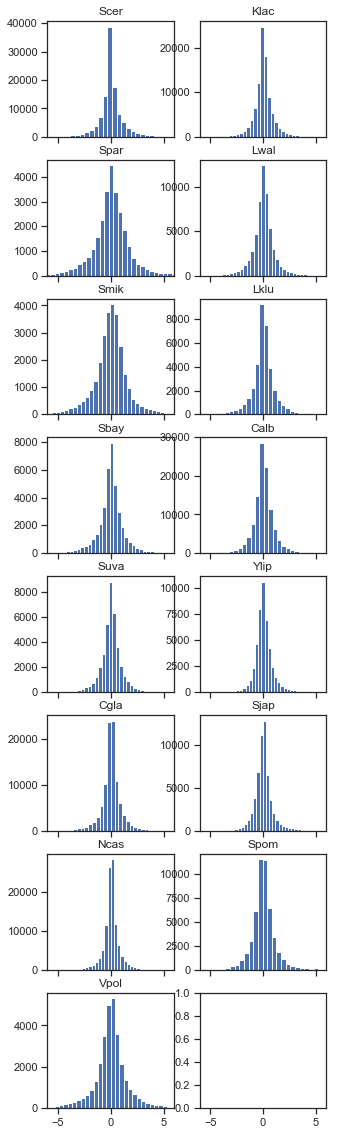

In [7]:
#Look at histogram of all regev data - do I need to do some kind of normalization? 

#Only need to do this once - output is saved as .csv

fig, axarr = plt.subplots(8,2, sharex = True, figsize = (5,20))

spec_sets = {'Post WGH' : ['Scer'] + spec_order_post_WGH, 
             'Pre WGH' : spec_order_pre_WGH} 

jj = 0
mean_std = {}
for spec_set_name, spec_set in spec_sets.items(): 
    for kk, spec in enumerate(spec_set): 
        ax = axarr[kk,jj]
        fname_array_data = os.path.normpath(data_processing_dir + 'regev_data/' + spec + '_growth_stress.csv')  
        spec_data = pd.read_csv(fname_array_data, index_col=0)
        conditions = spec_data.columns
        all_data_spec = []
        for condition in conditions: 
            all_data_spec = all_data_spec + list(spec_data[condition].dropna())
        ax.hist(all_data_spec, bins=50)
        ax.set_title(spec)
        ax.set_xlim([-6,6])
        mean_std[spec] = {'mean': np.mean(all_data_spec), 'std': np.std(all_data_spec)}
        spec_data_norm = (spec_data - mean_std[spec]['mean'])/(mean_std[spec]['std'])
        #  could use this to change name systematically but didn't end up needing to 
        # Changed the ortholog file instead. 
#         if spec=='Lwal':
#             spec_data_norm['orf_name_corrected'] = ['Kwal_' + Lwal_genename.split('Kwal')[1] for Lwal_genename in spec_data_norm.index]
#             spec_data_norm.reset_index(inplace=True)
#             spec_data_norm.drop(columns='orf_name', inplace=True)
#             spec_data_norm.rename(columns={'orf_name_corrected':'orf_name'}, inplace=True)
#             spec_data_norm.set_index('orf_name', inplace=True)
        fname_array_data_norm = os.path.normpath(data_processing_dir + 'regev_data/' + spec + '_growth_stress_norm.csv')
        spec_data_norm.to_csv(fname_array_data_norm)
        
    jj = jj+1
    



In [71]:
##Changing Lwal data_norm indexes back
# spec = 'Lwal'
# fname_array_data_norm = os.path.normpath(data_processing_dir + 'regev_data/' + spec + '_growth_stress_norm.csv')  
# spec_data_norm = pd.read_csv(fname_array_data_norm, index_col=0)
# #spec_data_norm['orf_name_corrected'] = ['Kwal_' + Lwal_genename.split('Kwal')[1] for Lwal_genename in spec_data_norm.index]
# spec_data_norm['orf_name_corrected'] = ['Kwal' + Lwal_genename.split('Kwal_')[1] for Lwal_genename in spec_data_norm.index]
# spec_data_norm.reset_index(inplace=True)
# spec_data_norm.drop(columns='orf_name', inplace=True)
# spec_data_norm.rename(columns={'orf_name_corrected':'orf_name'}, inplace=True)
# spec_data_norm.set_index('orf_name', inplace=True)

# spec_data_norm.to_csv(fname_array_data_norm)


### Map regev data onto a given set of gois

<a id='depka_LFC'></a>

### Build and save expression_data_df_sorted

In [7]:
#Load GOI ohnolog data

#fname = data_processing_dir + os.sep + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/gois_20181205.pkl')

#with open(fname, 'rb') as file:
#    [ohnologs_goi,ohnologs_expression_sorted,goi_criteria] = pickle.load(file)

ohnologs_dePKA = pd.read_csv(data_processing_dir + os.path.normpath("kl_sc_PKA_as_m24_r1g1_20181017/20200617_ohnologs_dePKA.csv"), index_col=0)
# ohnologs_goi.set_index('Ancestor', inplace=True)
ohnologs_expression_sorted = pd.read_csv(data_processing_dir + os.path.normpath("kl_sc_PKA_as_m24_r1g1_20181017/20200607_ohnologs_expression_sorted.csv"), index_col=0)
# ohnologs_expression_sorted.set_index('Ancestor', inplace=True)

ohnologs_goi = ohnologs_dePKA.rename(columns={'sc_genename_' + level: 'genename_'+level for level in ['low','high']})


In [10]:
#Load regev data using goi list .

seed_spec = 'Scer'
sort_column = 'log2FoldChange'

#Order that we view the species (minus S.Cer)
spec_order_post_WGH = ['Spar','Smik', 'Sbay','Suva','Cgla', 'Ncas','Vpol']
spec_order_pre_WGH = ['Klac','Lwal','Lklu','Calb', 'Ylip','Sjap','Spom']

ohnologs_goi_array, spec_conditions = yeast_esr_exp.load_regev_data_gois(ohnologs_goi, sort_column, seed_spec, spec_order_post_WGH, spec_order_pre_WGH)

#Add SC_common_name_high, low and high_low columns to an ohnologs_file
#SC_common_name lookup function requires genename_low/high columns
orth_dir = data_processing_dir + 'orthologs_regev' + os.sep
for level in ['low', 'high']: 
    ohnologs_goi_array['genename_' + level] = ohnologs_goi_array[seed_spec + '_genename_' + level]
ohnologs_goi_array = yeast_esr_exp.SC_common_name_columns_ohnologs(ohnologs_goi_array, seed_spec, orth_dir)


Mismatch between goi index and expression data index Scer : YBR056W-A DS/LOG
Mismatch between goi index and expression data index Scer : YBR056W-A LAG/LOG
Mismatch between goi index and expression data index Scer : YBR056W-A LL/LOG
Mismatch between goi index and expression data index Scer : YBR056W-A PLAT/LOG
Mismatch between goi index and expression data index Scer : YBR056W-A PS/LOG
Mismatch between goi index and expression data index Scer : YBR056W-A NaCl_005
Mismatch between goi index and expression data index Scer : YBR056W-A NaCl_015
Mismatch between goi index and expression data index Scer : YBR056W-A NaCl_030
Mismatch between goi index and expression data index Scer : YBR056W-A NaCl_060
Mismatch between goi index and expression data index Scer : YBR056W-A heat shock_005
Mismatch between goi index and expression data index Scer : YBR056W-A heat shock_015
Mismatch between goi index and expression data index Scer : YBR056W-A heat shock_030
Mismatch between goi index and expression

YBR056W-A not present in orthogroup file for Suva
YHR174W has NONE listed in ortholog file for Suva
YCR075W-A has NONE listed in ortholog file for Suva
YDR034W-B has NONE listed in ortholog file for Suva
YGR243W has NONE listed in ortholog file for Suva
YDR342C has NONE listed in ortholog file for Suva
YLR174W has NONE listed in ortholog file for Suva
YIL113W has NONE listed in ortholog file for Suva
YOR186W has NONE listed in ortholog file for Suva
YPL240C has NONE listed in ortholog file for Suva
YIR016W has NONE listed in ortholog file for Suva
YMR120C has NONE listed in ortholog file for Cgla
YBR056W-A not present in orthogroup file for Cgla
Mismatch between ortholog file and expression data index Cgla : CAGL0D02640g DS/LOG
Mismatch between ortholog file and expression data index Cgla : CAGL0D02640g ELL/LOG
Mismatch between ortholog file and expression data index Cgla : CAGL0D02640g LAG/LOG
Mismatch between ortholog file and expression data index Cgla : CAGL0D02640g LL/LOG
Mismatch

YLR371W not present in orthogroup file for Ncas
YLR043C not present in orthogroup file for Ncas
YHR108W not present in orthogroup file for Ncas
YLR297W not present in orthogroup file for Ncas
YFL048C not present in orthogroup file for Ncas
YNR001C not present in orthogroup file for Ncas
YDR034W-B not present in orthogroup file for Ncas
YGR256W not present in orthogroup file for Ncas
YNL093W not present in orthogroup file for Ncas
YNL055C not present in orthogroup file for Ncas
YIL113W not present in orthogroup file for Ncas
YLR031W not present in orthogroup file for Ncas
YKL091C not present in orthogroup file for Ncas
YDR490C not present in orthogroup file for Ncas
YDL021W not present in orthogroup file for Ncas
YLR346C not present in orthogroup file for Ncas
YJL045W not present in orthogroup file for Ncas
YHR097C not present in orthogroup file for Ncas
YOR186W not present in orthogroup file for Ncas
YPL230W not present in orthogroup file for Ncas
YPL240C not present in orthogroup file

either YBR056W-A or YDR034W-Bis not in index for ortholog table in Lklu
YDR034W-B is in index for lookup table
YDR034W-B did have an ortholog in Lklu
YDR034W-B has NONE listed in ortholog file for Lklu
YJL110C has NONE listed in ortholog file for Lklu
YOL024W has NONE listed in ortholog file for Lklu
YOL091W has NONE listed in ortholog file for Lklu
YGR035C has NONE listed in ortholog file for Lklu
YGR239C has NONE listed in ortholog file for Lklu
YGR169C-A has NONE listed in ortholog file for Lklu
YLR297W has NONE listed in ortholog file for Lklu
YMR182C has NONE listed in ortholog file for Lklu
YCR075W-A has NONE listed in ortholog file for Lklu
YER158C has NONE listed in ortholog file for Lklu
either YBR056W-A or YDR034W-Bis not in index for ortholog table in Calb
YDR034W-B is in index for lookup table
YDR034W-B did have an ortholog in Calb
YDR034W-B has NONE listed in ortholog file for Calb
YLR413W has NONE listed in ortholog file for Calb
YHR092C has NONE listed in ortholog file f

Mismatch between ortholog file and expression data index Sjap : SJAG05198 DS/LOG
Mismatch between ortholog file and expression data index Sjap : SJAG05198 LAG/LOG
Mismatch between ortholog file and expression data index Sjap : SJAG05198 LL/LOG
Mismatch between ortholog file and expression data index Sjap : SJAG05198 LPS/LOG
Mismatch between ortholog file and expression data index Sjap : SJAG05198 PLAT/LOG
Mismatch between ortholog file and expression data index Sjap : SJAG05198 PS/LOG
Mismatch between ortholog file and expression data index Sjap : SJAG05198 heat shock_005
Mismatch between ortholog file and expression data index Sjap : SJAG05198 heat shock_015
Mismatch between ortholog file and expression data index Sjap : SJAG05198 heat shock_030
Mismatch between ortholog file and expression data index Sjap : SJAG05198 heat shock_045
Mismatch between ortholog file and expression data index Sjap : SJAG05198 heat shock_060
YDR475C has NONE listed in ortholog file for Sjap
YOR028C has NON

In [11]:
list(ohnologs_goi_array['SC_common_name_high'])

['PRY1',
 'HEF3',
 'CIT1',
 'CYC7',
 'ADE16',
 'YDR034W-B',
 'TKL2',
 'FAT3',
 'GND2',
 'MPC3',
 'HXT7',
 'GSP2',
 'GDH3',
 'URA10',
 'GRX1',
 'ALP1',
 'TPK1',
 'PIR3',
 'DAL80',
 'YSC84',
 'IGD1',
 'CMK1',
 'IDP2',
 'ATO2',
 'YEF1',
 'MNN4',
 'ADY3',
 'MDG1',
 'YPT53',
 'POR1',
 'SDP1',
 'COX5B',
 'NDE2',
 'YLR031W',
 'MYO3',
 'PGM2',
 'YKL091C',
 'STB2',
 'PKH1',
 'RTC2',
 'YSW1',
 'GPD1',
 'GPM2',
 'OSH2',
 'YDR018C',
 'RFS1',
 'PST1',
 'UBC5',
 'NCE102',
 'VPS62',
 'SIP2',
 'PHM8',
 'SAP4',
 'VMR1',
 'PEX30',
 'CIS1',
 'NQM1',
 'ATG33',
 'ROM1',
 'ENO1',
 'SOL4',
 'PEX18',
 'TRX2',
 'LSO1',
 'YJL045W',
 'LAM4',
 'HXT5',
 'YHR097C',
 'TRR2',
 'GGA1',
 'GCY1',
 'BAG7',
 'YOR019W',
 'YAP6',
 'VHS3',
 'YOR062C',
 'PRB1',
 'GAC1',
 'YOR186W',
 'SDS24',
 'TOS8',
 'USV1',
 'HSP82',
 'SOL1',
 'EGO4',
 'KIN82',
 'PYK2',
 'FUN19',
 'SNC1',
 'FRT2',
 'PSK1',
 'YIR016W',
 'RGI1',
 'STF1',
 'SNF3',
 'SHC1',
 'UBP9',
 'AVT6',
 'SCS22',
 'YPR172W',
 'EMP46',
 'LAM5',
 'AFR1',
 'CRF1',
 'RTN2',
 '

Text(0.5, 0.98, 'EGO2 EGO4')

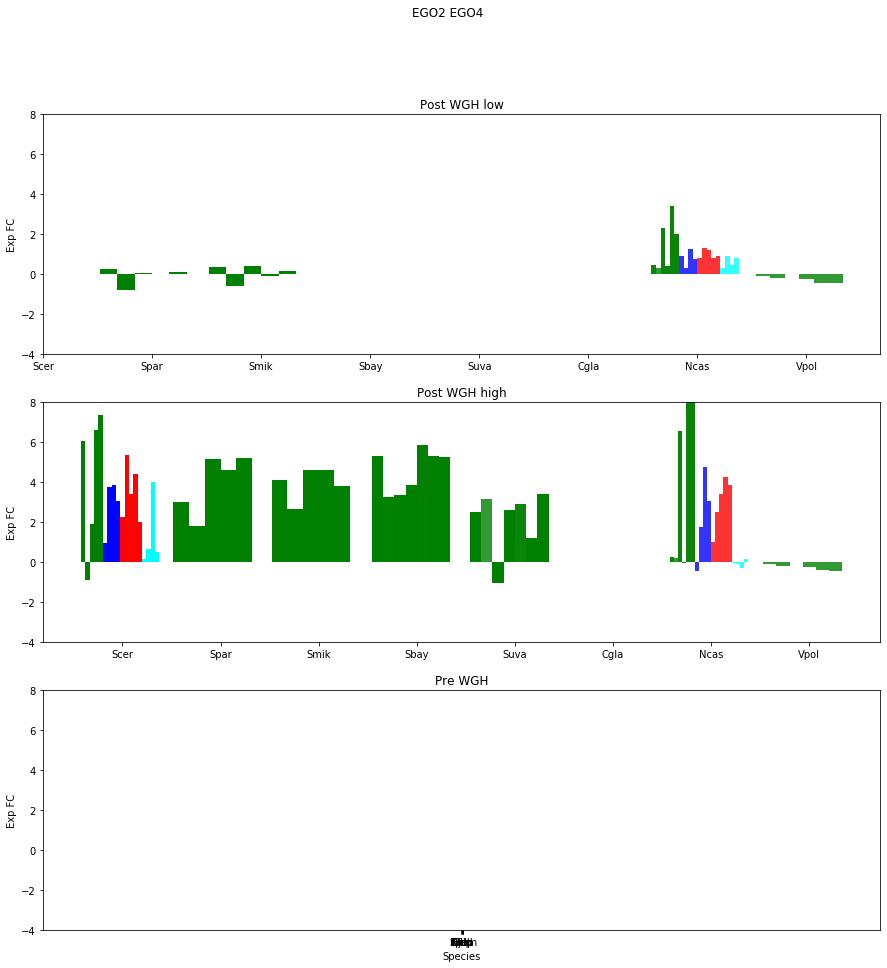

In [12]:
#For a given high_gene, plot expression across all conditions for all its orthologs

### replot but restrict to 

#Plot it in three subplots - high, low, pre_wgh

high_gene = 'EGO4' #'YPT53'  #GND2 #GPM2
row = ohnologs_goi_array[ohnologs_goi_array['SC_common_name_high']==high_gene]

fig, axarr = plt.subplots(3,1, figsize = (15,15))
spec_frac = 0.8  #fraction of distance between 1 and the next number a species takes up
opacity = 0.8

# spec_order_post_WGH = ['Spar','Sbay','Smik','Suva', 'Cgla', 'Ncas','Vpol']
# spec_order_pre_WGH = ['Klac','Lwal','Lklu','Dhan', 'Calb', 'Ylip','Sjap','Spom']

spec_sets = {'Post WGH low' : ['Scer'] + spec_order_post_WGH, 
             'Post WGH high' : ['Scer'] + spec_order_post_WGH, 
             'Pre WGH' : spec_order_pre_WGH} 


levels = {'Post WGH low': 'low', 
          'Post WGH high': 'high', 
          'Pre WGH' : ''}

for kk, spec_set_name in enumerate(spec_sets.keys()):
    
    ax = axarr[kk]
    level = levels[spec_set_name]
    spec_set = spec_sets[spec_set_name]
    
    if level == '': 
        level_sep = ''
    else: 
        level_sep = '_'

    #Build dicts to store data from all possible conditions that we want to consider

    #all_conds = list(set(list(chain.from_iterable([list(conditions) for spec, conditions in spec_conditions.items()]))))

    #this puts it in a better order
    all_conds = ['LAG/LOG','LL/LOG','ELL/LOG','DS/LOG','EPS/LOG','PS/LOG','LPS/LOG','PLAT/LOG',
     'NaCl_005',
     'NaCl_015',
     'NaCl_030',
     'NaCl_060', 
     'heat shock_005',
     'heat shock_015',
     'heat shock_030',
     'heat shock_045',
     'heat shock_060',
     'hydrogen peroxide_005',
     'hydrogen peroxide_015',
     'hydrogen peroxide_030',
     'hydrogen peroxide_060']

    #Build colordict to separate conditions
    colors = {}
    for condition in all_conds: 
        if ("/" in condition):
            colors[condition] = 'green'
        elif('heat shock' in condition):
            colors[condition] = 'red'
        elif('NaCl' in condition): 
            colors[condition] = 'blue'
        elif('hydrogen peroxide' in condition): 
            colors[condition] = 'cyan'

    index = {condition : [] for condition in all_conds} 
    bar_width = {condition : [] for condition in all_conds}
    data = {condition : [] for condition in all_conds}   


    for spec_ind, spec in enumerate(spec_set): 
        #If S.Cer always only one orth.  
        if spec== 'Scer': 
            N_orth = 1
        else: 
            N_orth = row[spec + '_N' + level_sep + level].iloc[0]

        conditions = spec_conditions[spec]
        N_cond = len(conditions)

        if N_orth==0:
            dw = spec_frac/N_cond
        else: 
            dw = spec_frac/(N_cond*N_orth)

        for condition_ind, condition in enumerate(conditions): 
            #append data for each condition to the set of bars to be plotted

            if N_orth ==0:
                index[condition].append(spec_ind + dw*condition_ind)
                bar_width[condition].append(dw)
                data[condition].append(np.nan)
            else: 
                for jj in range(0,N_orth): 
                    index[condition].append(spec_ind + dw*condition_ind + jj*dw/N_cond)
                    bar_width[condition].append(dw/N_orth)
                    data[condition].append(row[spec + '_' + condition + level_sep + level].values[0][jj])


            rects_pre_WGH = ax.bar(index[condition], np.array(data[condition]), bar_width[condition],
                             alpha=opacity,
                             color=colors[condition],
                             label=condition) 
                             #bottom = bottom)

    if kk==2: 
        ax.set_xlabel('Species')
    ax.set_ylabel('Exp FC')
    ax.set_ylim(-4,8)
    ax.set_title(spec_set_name)
    ax.set_xticks(np.arange(len(spec_set))+spec_frac/2.0)
    ax.set_xticklabels(spec_set)

fig.suptitle(row['SC_common_name_low'].values[0] + ' ' +  row['SC_common_name_high'].values[0])



In [13]:
#Go through each of my GOIs and replace lists with single value for each item. 
#This is mainly to combine any values for genes that had a small scale duplication. 

# spec_order_post_WGH = ['Spar','Sbay','Smik','Suva', 'Cgla', 'Ncas','Vpol']
# spec_order_pre_WGH = ['Klac','Lwal','Lklu', 'Calb', 'Ylip','Sjap','Spom']

spec_sets = {'Post WGH low' : ['Scer'] + spec_order_post_WGH, 
             'Post WGH high' : ['Scer'] + spec_order_post_WGH, 
             'Pre WGH' : spec_order_pre_WGH} 

expression_data_df = yeast_esr_exp.regev_ohnolog_expression_data_SSD_combine(ohnologs_goi_array,  spec_sets, spec_conditions, combine_method = 'mean')


In [14]:
expression_data_df

,Scer_DS/LOG_low,Scer_LAG/LOG_low,Scer_LL/LOG_low,Scer_PLAT/LOG_low,Scer_PS/LOG_low,Scer_NaCl_005_low,Scer_NaCl_015_low,Scer_NaCl_030_low,Scer_NaCl_060_low,Scer_heat shock_005_low,...,Spom_DS/LOG,Spom_ELL/LOG,Spom_LAG/LOG,Spom_LL/LOG,Spom_PLAT/LOG,Spom_PS/LOG,Spom_heat shock_005,Spom_heat shock_015,Spom_heat shock_030,Spom_heat shock_060
PRY1_PRY2,-0.701797,-0.688190,-0.157376,-1.099568,-1.633749,-0.033459,-0.750439,0.142326,0.929163,-0.276969,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HEF3_YEF3,-1.097543,0.977927,-0.132332,-2.738380,-4.503385,-0.359436,-0.419535,-0.737525,-0.576142,-0.144154,...,-1.442941,-1.161557,0.282374,-1.582501,-1.197131,-1.364997,-1.209409,-1.445826,-1.177600,-0.712864
CIT1_CIT2,0.253825,1.589396,-0.014506,5.419031,1.554584,-0.050891,0.295293,0.040527,0.029164,1.150890,...,3.325292,1.501565,-1.154993,3.109500,3.689549,3.637722,0.260587,0.889814,0.265158,-0.758531
CYC7_CYC1,1.294435,-1.186582,0.604370,1.662653,1.545158,-0.361054,-0.355985,0.499594,0.970035,-0.003500,...,2.322280,0.595206,-2.358371,2.059319,2.640547,2.481901,0.029934,0.126582,-0.213533,-0.870908
ADE16_ADE17,5.568393,-0.182525,2.702899,1.750545,3.602381,0.082867,0.911534,1.326193,2.968811,-0.101926,...,-1.072956,-0.351073,0.068926,-1.121773,-1.005769,-1.029176,-0.554000,-1.311866,-1.223703,-0.758950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VHS1_SKS1,0.059061,2.009984,0.233548,0.880744,-0.337765,-0.196140,-0.930108,-0.453836,0.376005,0.562360,...,0.331701,-0.256622,-0.357279,0.020773,0.849932,0.481695,-0.240405,0.330621,-0.749497,-0.492195
SSE2_SSE1,-1.016315,-0.182392,-0.412567,-3.602257,-3.495460,-0.046197,0.005402,-0.218751,-0.724463,0.299946,...,0.171618,0.379951,-0.908327,0.512514,-0.782286,-0.094254,0.907881,1.741810,1.563255,1.199728
HER1_GIP3,-0.277191,1.929139,-0.019957,-0.747897,-0.610601,0.231043,0.775980,0.289255,0.019156,0.165483,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HES1_KES1,-0.617773,-0.813436,-0.224728,-1.405508,-1.555966,-0.223441,-0.437757,-0.264465,-0.207111,-0.055216,...,-0.095343,-0.004567,-0.225780,-0.147039,-0.004841,-0.124729,-0.064591,-0.086108,0.036368,-0.019859


In [15]:
# Organize species conditions by a given vector of all possible conditions

spec_order_post_WGH = ['Spar','Sbay','Smik','Suva', 'Cgla', 'Ncas','Vpol']
spec_order_pre_WGH = ['Klac','Lwal','Lklu', 'Calb', 'Ylip','Sjap','Spom']

spec_sets = {'Post WGH low' : ['Scer'] + spec_order_post_WGH, 
             'Post WGH high' : ['Scer'] + spec_order_post_WGH, 
             'Pre WGH' : spec_order_pre_WGH} 


#filter out a row if it has Ndrop or more missing orthologs
inds_to_drop = []
Ndrop = 130
for ind, row in enumerate(expression_data_df.values):
    if sum(np.isnan(row)) >= Ndrop:
        inds_to_drop.append(ind)
        
rows_to_drop = expression_data_df.index[inds_to_drop]
print('Dropped the following Paralog Pairs because there were more than ' + str(Ndrop) + ' orthologs missing.')
print(rows_to_drop)
expression_data_df_row_filter = expression_data_df.drop(index=rows_to_drop)

#Sort dataset by how long high expression for a PKA estimate column (PKAest) is retained in the high paralog in post WGH high gene
#Sort out rows by whether the averaged "PKAest" or PKA estimate columns are above a threshold.  
#Sort by the species farthes from original species first (so top row will be most conserved)

columns_to_combine = {'PS/LOG', 'PLAT/LOG', 'DS/LOG', 'heat shock_30', 'heat shock_45'}

#threshold for induction using the average of the combined columns that make up the PKA inhibition estimate.  
#All data is normalized already
induced_thresh = 2.5

expression_data_df_sorted = yeast_esr_exp.sort_conservaton_by_col_avg(expression_data_df_row_filter, spec_sets['Post WGH high'], columns_to_combine, induced_thresh )

#Sort conditions by defined order
all_conds = ['LAG/LOG','LL/LOG','ELL/LOG','DS/LOG','EPS/LOG','PS/LOG','LPS/LOG','PLAT/LOG',
     'NaCl_005',
     'NaCl_015',
     'NaCl_030',
     'NaCl_060', 
     'heat shock_005',
     'heat shock_015',
     'heat shock_030',
     'heat shock_045',
     'heat shock_060',
     'hydrogen peroxide_005',
     'hydrogen peroxide_015',
     'hydrogen peroxide_030',
     'hydrogen peroxide_060']

new_col_order = yeast_esr_exp.sort_regev_stress_conditions(all_conds, spec_sets, expression_data_df)

#add back in the new column order and drop out the extra columns that were added
expression_data_df_sorted = expression_data_df_sorted.loc[:,new_col_order]


Dropped the following Paralog Pairs because there were more than 130 orthologs missing.
Index(['YDR034W-B_YBR056W-A', 'CIS1_YGR035C', 'YOR186W_YLR297W', 'EGO4_EGO2'], dtype='object')


In [16]:
expression_data_df_sorted

,Scer_LAG/LOG_high,Scer_LL/LOG_high,Scer_DS/LOG_high,Scer_PS/LOG_high,Scer_PLAT/LOG_high,Scer_NaCl_005_high,Scer_NaCl_015_high,Scer_NaCl_030_high,Scer_NaCl_060_high,Scer_heat shock_005_high,...,Spom_LAG/LOG,Spom_LL/LOG,Spom_ELL/LOG,Spom_DS/LOG,Spom_PS/LOG,Spom_PLAT/LOG,Spom_heat shock_005,Spom_heat shock_015,Spom_heat shock_030,Spom_heat shock_060
RGI1_RGI2,-1.615538,3.633453,6.168934,6.955282,5.894559,1.519567,3.493808,2.843892,2.179521,3.287207,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IGD1_YOL024W,0.142225,2.274935,4.438389,5.529008,5.396253,2.719046,3.695770,2.624077,2.273447,3.145866,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IDP2_IDP3,1.137757,-0.334594,0.642766,5.232349,6.288557,0.174608,0.540886,0.687736,0.447804,0.888050,...,-0.343824,0.069243,0.127752,-0.074949,-0.087838,-0.176500,-0.055718,0.026974,0.129601,-0.050229
PGM2_PGM1,-1.327403,2.764061,4.837507,4.837038,2.974626,2.105290,3.646307,3.738275,2.901226,2.898749,...,-1.222808,1.868022,0.823594,1.834939,1.813976,1.641174,0.225916,0.587346,0.715425,0.421450
FUN19_YOR338W,0.644461,0.516929,1.889907,3.020375,2.472236,0.886233,2.895274,1.289819,0.935132,0.994707,...,0.227639,-1.056614,-0.555745,-1.061222,-0.970228,-0.976973,-0.630311,-1.199820,-1.139128,-0.519054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YPR172W_YLR456W,-1.738971,0.542081,1.117864,1.982694,1.642430,0.145922,1.008368,1.206361,0.818995,0.296490,...,-0.326230,0.347571,0.254735,0.188218,-0.012168,-0.056238,0.243996,0.516968,0.689095,0.456660
LAM5_LAM6,-1.908623,0.491564,1.243404,2.178801,1.675013,0.020303,1.124677,1.447797,0.894630,0.502449,...,-0.578199,0.144770,0.116152,0.027497,-0.050688,0.049273,0.132448,0.670489,0.429658,0.070488
CRF1_IFH1,2.293956,-0.242919,0.341205,1.907393,2.200316,0.248746,1.955774,1.178686,1.022257,1.155438,...,0.697034,-0.529039,-0.461466,-0.383741,-0.262398,-0.153063,-1.097583,-0.770451,-0.316267,-0.536943
HER1_GIP3,-0.281709,0.899284,1.695990,2.145645,1.881291,0.035601,1.023119,1.317272,0.881309,0.592922,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Load expression_data_df_sorted for heatmap, boxplots
<a id='LFC_plots'></a>

In [4]:
# #Save expression data
# expression_data_df_sorted.to_csv(os.path.normpath(data_processing_dir + 'regev_data/20200620_expression_data_sorted.csv'))

#Load expression_data_df_sorted 
expression_data_df_sorted = pd.read_csv(os.path.normpath(data_processing_dir + 'regev_data/20200620_expression_data_sorted.csv'),index_col=0)

#This species order applies for heatmaps and conservation images. 
spec_order_post_WGH = ['Spar','Sbay','Smik','Suva', 'Cgla', 'Ncas','Vpol']
spec_order_pre_WGH = ['Klac','Lwal','Lklu', 'Calb', 'Ylip','Sjap','Spom']

spec_sets = {'Post WGH low' : ['Scer'] + spec_order_post_WGH, 
             'Post WGH high' : ['Scer'] + spec_order_post_WGH, 
             'Pre WGH' : spec_order_pre_WGH} 

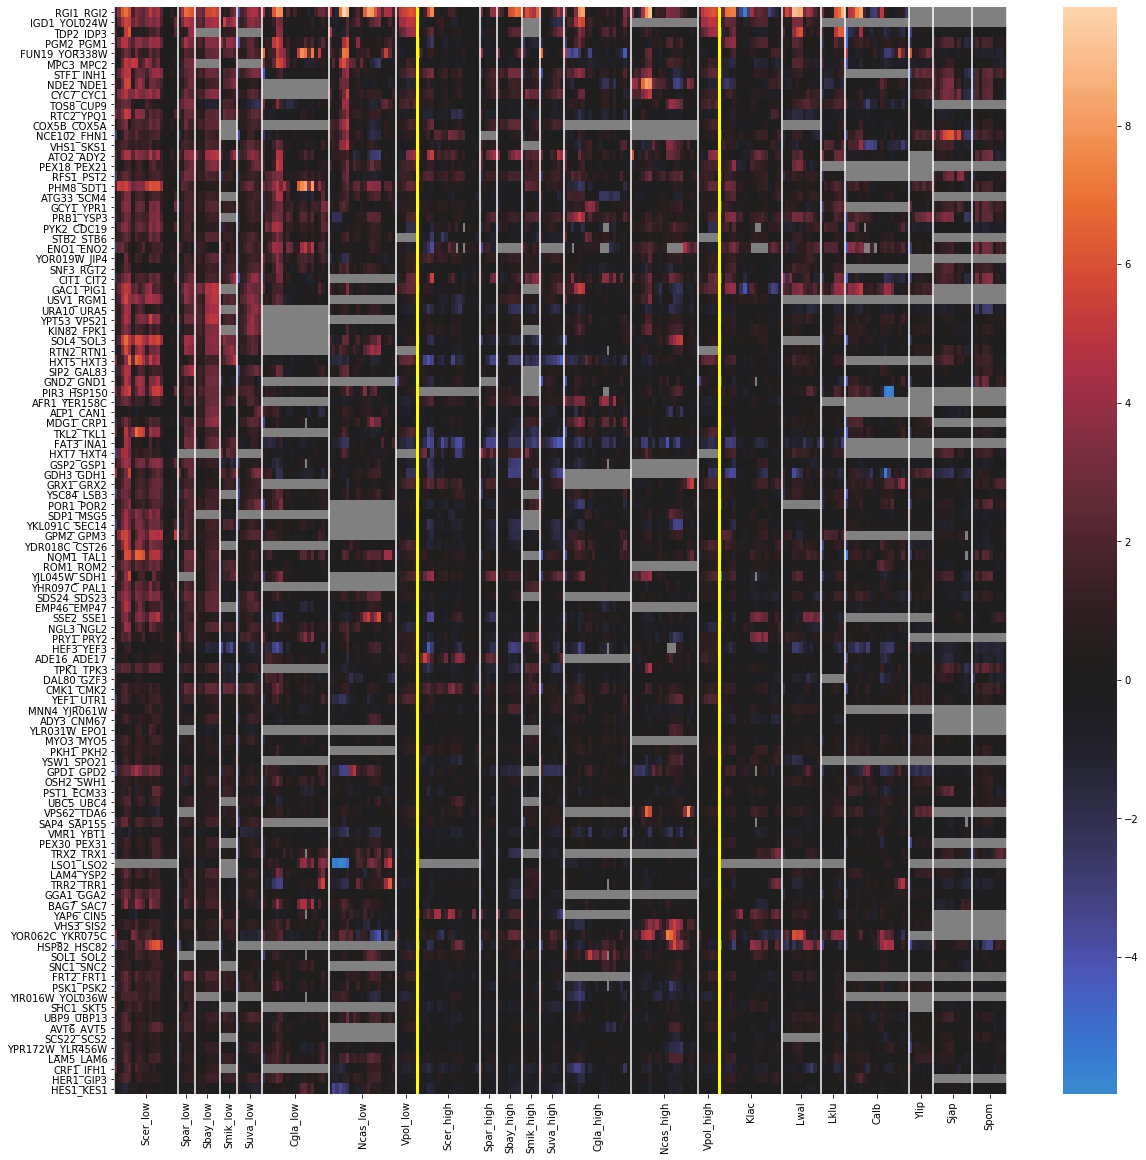

In [3]:
#heatmap after filtering and sorting - all conditions

fig_hmap_exp, ax_hmap_exp = plt.subplots(figsize=(20,20))

# levels = {'Post WGH low': 'low', 
#           'Post WGH high': 'high', 
#           'Pre WGH' : ''}


#Make labels for each species, and separate out pre/post WGH and post WGH high/low with yellow lines
N_spec_level = {}

label_order = []
for level in ['low','high']:
    for spec in spec_sets['Post WGH ' + level]:
        label = spec + '_' + level
        N_spec_level[label] = 0
        label_order.append(label)
for spec in spec_sets['Pre WGH']: 
    label = spec
    N_spec_level[label] = 0 
    label_order.append(label)


for column in expression_data_df_sorted.columns: 
    spec = column.split('_')[0]
    if spec in set(spec_sets['Post WGH low']):
        level_sep = '_'
        level = column.split('_')[-1]
    else: 
        level_sep = ''
        level = ''
    label = spec + level_sep + level
    N_spec_level[label] = N_spec_level[label] + 1
    
new_ticks = []
sep_lines = [0]
new_tick_labels = []
big_lines = []
tick_tracker = 0
for label in label_order:
    N_tick_dist = N_spec_level[label]
    new_ticks.append(tick_tracker + N_tick_dist/2)
    new_tick_labels.append(label)
    sep_lines.append(tick_tracker + N_tick_dist)
    #new_tick_labels.append('')
    tick_tracker = tick_tracker + N_tick_dist
    if label in {'Vpol_low', 'Vpol_high'}:
        big_lines.append(tick_tracker)



sns.heatmap(expression_data_df_sorted, center = 0.0, xticklabels=False, ax = ax_hmap_exp)
ax_hmap_exp.set_facecolor('grey')
ax_hmap_exp.set_xticks(new_ticks)
ax_hmap_exp.set_xticklabels(new_tick_labels, rotation = 90)  #rotation=45, ha='right')
ax_hmap_exp.vlines(sep_lines, ymin = 0, ymax = len(expression_data_df_sorted), colors = 'white')
ax_hmap_exp.vlines(big_lines, ymin = 0, ymax = len(expression_data_df_sorted), colors = 'yellow',linewidth=3)
#ax_hmap_exp.set_rasterized(True)    #Had to do this because .svg took ages on inkscape to work with
#fig_hmap_exp.savefig(os.path.normpath('C:/Users/BMH_work/Google Drive/UCSF/ElSamad_Lab/PKA/Manuscript/exp_goi_regev.svg'))

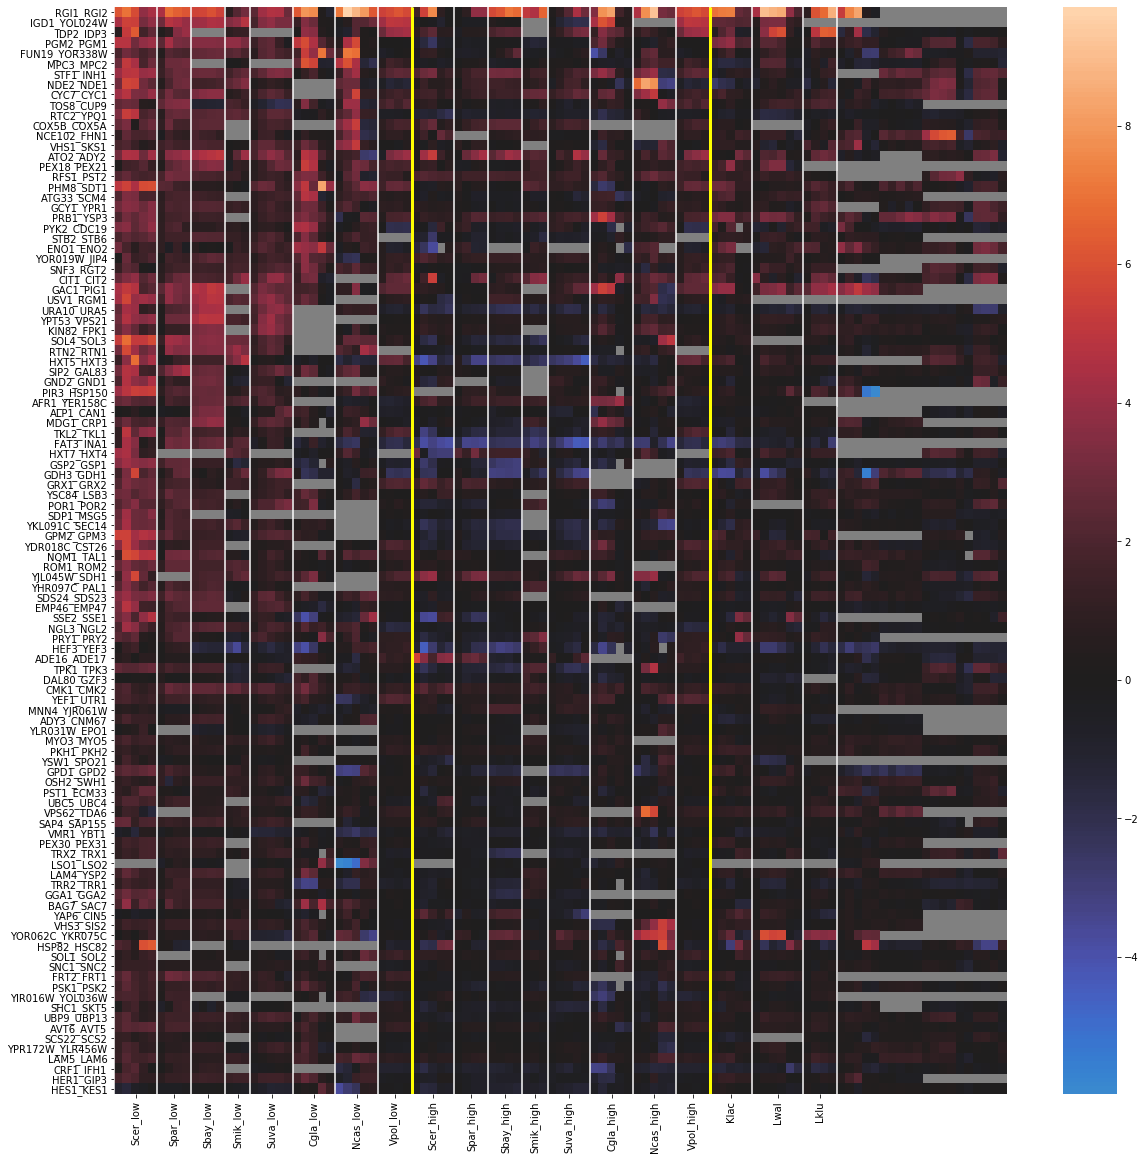

In [5]:
#heatmap after filtering and sorting - just top PKA conditions

fig_hmap_exp, ax_hmap_exp = plt.subplots(figsize=(20,20))

#Make subset that only has columns with appropriate conditions:
conds_pka_corr = ['DS/LOG', 'PS/LOG', 'PLAT/LOG',
                    'heat shock_030', 'heat shock_045']

new_columns = []
for column in expression_data_df_sorted.columns: 
    pass_test = False  #only allows columns that are in the data set
    for cond in conds_pka_corr:
        if cond in column: 
            pass_test=True
    if pass_test:
        new_columns.append(column)
        
expression_data_df_pka_corr = expression_data_df_sorted.loc[:,new_columns]    
   

#Make labels for each species, and separate out pre/post WGH and post WGH high/low with yellow lines
N_spec_level = {}

label_order = []
for level in ['low','high']:
    for spec in spec_sets['Post WGH ' + level]:
        label = spec + '_' + level
        N_spec_level[label] = 0
        label_order.append(label)
for spec in spec_sets['Pre WGH']: 
    label = spec
    N_spec_level[label] = 0 
    label_order.append(label)


for column in expression_data_df_pka_corr.columns: 
    spec = column.split('_')[0]
    if spec in set(spec_sets['Post WGH low']):
        level_sep = '_'
        level = column.split('_')[-1]
    elif spec in set(spec_sets['Pre WGH']): 
        level_sep = ''
        level = ''
    else:
        continue
    label = spec + level_sep + level
    N_spec_level[label] = N_spec_level[label] + 1
    
new_ticks = []
sep_lines = [0]
new_tick_labels = []
big_lines = []
tick_tracker = 0
for label in label_order:
    N_tick_dist = N_spec_level[label]
    new_ticks.append(tick_tracker + N_tick_dist/2)
    new_tick_labels.append(label)
    sep_lines.append(tick_tracker + N_tick_dist)
    #new_tick_labels.append('')
    tick_tracker = tick_tracker + N_tick_dist
    if label in {'Vpol_high', 'Vpol_low'}:
        big_lines.append(tick_tracker)



sns.heatmap(expression_data_df_pka_corr, center = 0.0, xticklabels=False, ax = ax_hmap_exp)
ax_hmap_exp.set_facecolor('grey')
ax_hmap_exp.set_xticks(new_ticks)
ax_hmap_exp.set_xticklabels(new_tick_labels, rotation = 90)  #rotation=45, ha='right')
ax_hmap_exp.vlines(sep_lines, ymin = 0, ymax = len(expression_data_df_pka_corr), colors = 'white')
ax_hmap_exp.vlines(big_lines, ymin = 0, ymax = len(expression_data_df_pka_corr), colors = 'yellow',linewidth=3)
ax_hmap_exp.set_rasterized(True)    #Had to do this because .svg took ages on inkscape to work with
#fig_hmap_exp.savefig(os.path.normpath('/home/heineike/scratch/induction_conservation_all.svg'))
#fig_hmap_exp.savefig(figsave_dir + 'LFC_conservation_heatmap.svg')

In [22]:
# spec_sets['Pre WGH'] = ['Klac','Lwal', 'Lklu']
# spec_sets['Outgroup'] = ['Calb','Ylip','Sjap','Spom']
# spec_sets

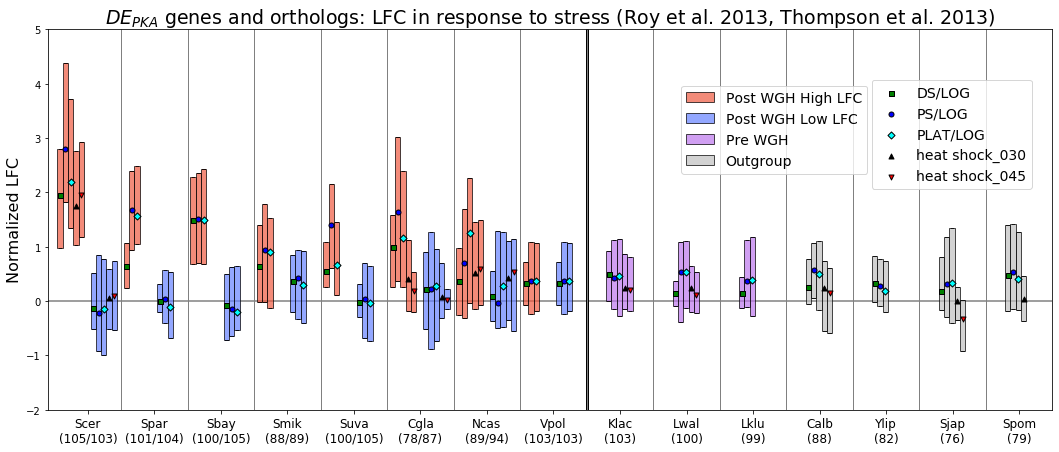

In [7]:
#Plot mean and variance of gene expression for each species 
#add text for total number of orthologs? 

#Make sure to load heat map and species orer/sets above

fig_induction, ax_induction = plt.subplots(figsize=(18,7))
bw = 0.08
margin = 0.04
opacity = 0.8

spec_sets = {'Post WGH low' : ['Scer'] + spec_order_post_WGH, 
             'Post WGH high' : ['Scer'] + spec_order_post_WGH, 
             'Pre WGH' : ['Klac','Lwal', 'Lklu'],
             'Outgroup' : ['Calb','Ylip','Sjap','Spom']
             } 
#a8d6f4
colors = {'low': '#6682ff', 'high':'#ef5a40', 'Pre WGH': '#bd76ed', 'Outgroup':'#bfbfbf'}
legend_label_dict = {'low': 'Post WGH Low LFC', 
                 'high': 'Post WGH High LFC', 
                 'Pre WGH': 'Pre WGH', 
                 'Outgroup': 'Outgroup'}
index = {'low':[],'high':[], 'Pre WGH':[], 'Outgroup':[]}
data_mean = {'low':[],'high':[], 'Pre WGH':[], 'Outgroup':[]}
data_std = {'low':[],'high':[], 'Pre WGH':[], 'Outgroup':[]}
data_N = {'low':{},
          'high':{}, 
          'Pre WGH':{},
          'Outgroup':{}
         }
data = {'low':[],'high':[], 'Pre WGH':[], 'Outgroup': []}
level_space = {'high':0.0, 'low':0.5}
label_order = []
label_ind = []

conds_pka_corr = ['DS/LOG', 'PS/LOG', 'PLAT/LOG','heat shock_030', 'heat shock_045']

conds_pka_corr_markerprops = {'DS/LOG':('s','g'), 'PS/LOG':('o','blue'), 'PLAT/LOG': ('D','cyan'), 'heat shock_030':('^', 'k'), 'heat shock_045':('v','r')}  #9000f0, '#9b00a6', '#a34f00'

median_markers = {cond:[] for cond in conds_pka_corr}

all_conds = set(expression_data_df_pka_corr.columns)


#Post WGH Species
#assumes the same species sets are in both
levels = ['high', 'low']

jj = 0
spacer = bw/2 + margin
for spec in spec_sets['Post WGH high']: 
    for level in levels:
        data_N[level][spec]=np.inf 
    label_ind.append(jj+0.5)
    for kk, cond_base in enumerate(conds_pka_corr): 
        if spec + '_' + cond_base + '_high' in all_conds: 
            for level in levels:
                index_val = spacer + jj+bw*kk +level_space[level]
                index[level].append(index_val)
                column = expression_data_df_pka_corr[spec + '_' + cond_base + '_' + level]
                data[level].append(column[~column.isna()])
                #Add an index/median pair to mark the medians
                median_markers[cond_base].append((index_val, column.median()))
                #data_mean[level].append(column.mean())
                #data_std[level].append(column.std())
                N_spec_cond = sum(~(np.isnan(column)))
                N_spec_old = data_N[level][spec]
                data_N[level][spec] = min(N_spec_old, N_spec_cond)
    label_order.append(spec + '\n(' + str(data_N['high'][spec]) + '/' + str(data_N['low'][spec]) + ')')  
    jj = jj+1

#pre WGH Species
#assumes the same species sets are in both
for spec_set in ['Pre WGH', 'Outgroup']:
    for spec in spec_sets[spec_set]: 
        data_N[spec_set][spec]=np.inf
        label_ind.append(jj+0.5)    
        for kk, cond_base in enumerate(conds_pka_corr): 
            if spec + '_' + cond_base in all_conds: 
                index_val = spacer + 0.25 + jj+bw*kk
                index[spec_set].append(index_val)
                column = expression_data_df_pka_corr[spec + '_' + cond_base]
                data[spec_set].append(column[~column.isna()])
                median_markers[cond_base].append((index_val, column.median()))
                #data_mean['Pre WGH'].append(column.mean())
                #data_std['Pre WGH'].append(column.std())
                N_spec_cond = sum(~(np.isnan(column)))
                N_spec_old = data_N[spec_set][spec]
                data_N[spec_set][spec] = min(N_spec_old, N_spec_cond)   
        label_order.append(spec + '\n(' + str(data_N[spec_set][spec]) + ')')    
        jj = jj+1
    

legend_handles = []
legend_labels = []
for subset_name in ['high', 'low', 'Pre WGH', 'Outgroup']: 
    
    subset_data = data[subset_name]
    
    induction_bp = ax_induction.boxplot(subset_data, patch_artist=True, showfliers=False, 
                                          positions = index[subset_name], 
                                          widths = bw, 
                                          whis = 0.0, 
                                          zorder = 0
                                       )
    jj = 0
    for patch in induction_bp['boxes']:
        patch.set(facecolor=colors[subset_name], alpha = 0.7)  
        if jj == 0: 
            legend_handles.append(patch)
        jj = jj+1
        
    plt.setp(induction_bp['medians'], linewidth = 0.0) # color='black', marker='o', linewidth=2.0)
    
    legend_labels.append(legend_label_dict[subset_name])
    
#     induction_plot = ax_induction.bar(index[subset_name],subset_data, bw,
#                  alpha=opacity,
#                  color=colors[subset_name],
#                  label=legend_labels[subset_name], 
#                  yerr = data_std[subset_name]) 
#                  #bottom = bottom)


ymax = 5.0
ymin = -2.0
ax_induction.vlines([len(spec_sets['Post WGH high'])], ymin = ymin, ymax = ymax, colors = 'k',linewidth=3)
ax_induction.vlines(list(range(len(spec_sets['Post WGH high']) + len(spec_sets['Pre WGH']) + len(spec_sets['Outgroup'])))[1:], ymin=ymin, ymax = ymax, colors = 'gray', linewidth = 1)
ax_induction.set_xticklabels(label_order, fontdict={'fontsize':12})
ax_induction.set_xlim(0, len(spec_sets['Post WGH high']) + len(spec_sets['Pre WGH']) + len(spec_sets['Outgroup']))
ax_induction.set_xticks(label_ind)
ax_induction.set_ylim(ymin,ymax)
ax_induction.set_xlim(-0.1, len(label_ind))
ax_induction.plot((-0.1,len(label_ind)),(0,0), color='grey',zorder=-1)
ax_induction.set_ylabel('Normalized LFC', fontdict={'fontsize':16})
ax_induction.set_title('$DE_{PKA}$ genes and orthologs: LFC in response to stress (Roy et al. 2013, Thompson et al. 2013)',fontdict={'fontsize':19})
leg1 = ax_induction.legend(legend_handles, legend_labels, prop={'size':14}, loc = (0.63,0.62) )

# Plot medians with chosen markers

for cond in conds_pka_corr:
    markers_df = pd.DataFrame(median_markers[cond])
    marker, color = conds_pka_corr_markerprops[cond]
    ax_induction.scatter(markers_df[0],markers_df[1],marker=marker, color=color, edgecolor='k',zorder=1, s=25, label = cond)

leg2 = ax_induction.legend(loc = (0.82,0.58), prop={'size':14})

ax_induction.add_artist(leg1)

fig_induction.savefig(figsave_dir + 'induction_conservation_summary.svg')

Figure [Induction conservation_summary]: Boxplots showing median and variation of relative expression of genes orthologous to DE_PKA for different stress conditions.  Where there are three bars, the conditions are 'DS/LOG',  'PS/LOG', and 'PLAT/LOG' from ref [Thompson et al 2013] and where there are five bars, the conditions are those three conditions plus 'heat shock_030' and 'heat shock_045' from [Roy et al 2013].  The thick grey line separates data for post-WGH species (left) from data for pre-WGH species (right).  Blue indicates orthologs of the low induction paralogs from DE_PKA (based on the Yeast Gene Order Browser [Byrne and Wolfe 2005] and red indicates orthologs of the high induction paralogs from DE_PKA.  Purple indicates the shared ortholog in the pre-WGH species. Dhan LL and Plat only.  Spom missing heat shock 45 min   

### Start with Differential expression for other species and look at conservation in Pre-WGH species. 

In [ ]:
#DEpka for S.Cer compared to DEstress
#DEstress for different species
#Plot against orthologs in Pre-WGH species

## Load and Normalize Raw Expression data 
<a id='raw_exp_load_norm'></a>

In [64]:
# #Build platform dicts, raw exp data sets and expression datasets

# id_source_data_inds = {'Klac': 'GSE22198', 'Scer': 'GSE22204', 
#                         'Cgla':'GSE22194', 'Ncas' : 'GSE22200', 
#                         'Sbay' : 'GSE22205', 'Smik': 'GSE22201', 
#                         'Lwal': 'GSE22199', 'Spar': 'GSE22193', 
#                         'Lklu': 'GSE22202', 'Dhan': 'GSE22191', 
#                         'Calb': 'GSE22197', 'Ylip': 'GSE22192'}

# spec_list =   list(id_source_data_inds.keys()) + ['Vpol','Sjap','Spom', 'Suva'] 
# yeast_esr_exp.make_data_tables(spec_list)

In [4]:
# #S.Cer

# spec = 'Scer'

# #Load expression data
# fname = data_processing_dir +  os.path.normpath('regev_data/raw_exp/' + spec + '_raw_exp.csv')
# raw_exp_tsankov = pd.read_csv(fname, index_col='orf_name')

# # #Take mean of all data that has more than one spot per orf
# # #Also only select out column of mean expression across replicates
# # grouped = raw_exp_tsankov.groupby('orf_name')
# # raw_exp_tsankov_mean = grouped.mean().loc[:,'Mean']

# for level in ['low','high']: 
#     raw_exp_tsankov_mean_level = raw_exp_tsankov['med_qnorm'].reindex(list(ohnologs_goi_rlog['sc_genename_' + level]))
#     ohnologs_goi_rlog[spec + '_raw_exp_tsankov_' + level] = list(raw_exp_tsankov_mean_level)

    
# #K.Lac
# spec = 'Klac'

# fname = data_processing_dir + os.path.normpath('regev_data/raw_exp/' + spec + '_raw_exp.csv')
# raw_exp_tsankov = pd.read_csv(fname, index_col = 'orf_name')

# #Take mean of all data that has more than one spot per orf
# #Also only select out column of mean expression across replicates

# #add data to dataframe
# raw_exp_tsankov_mean_goi = raw_exp_tsankov['med_qnorm'].reindex(list(ohnologs_goi_rlog['kl_genename']))
# ohnologs_goi_rlog[spec + '_raw_exp_tsankov_YGOB'] = list(raw_exp_tsankov_mean_goi)


In [5]:
#Plot.ly plot of rlog vs tsankov data
# colors = {'low': 'blue', 'high': 'red'}

# hover_text = []
# #might be nice to add kl LFC to this
# for ind, row in ohnologs_goi_rlog.iterrows():
#     hover_text.append(('Low Paralog: {SC_common_name_low}<br>  LFC: {LFC_low:.2f}<br>  -log10(pval): {pval_low:.2f}<br>' +
#                        'High Paralog: {SC_common_name_high}<br>  LFC: {LFC_high:.2f}<br>  -log10(pval): {pval_high:.2f}<br>' +
#                        'KL genename: {kl_genename}').format(
#                         SC_common_name_low = row['SC_common_name_low'],
#                         LFC_low = row['log2FoldChange_low'],
#                         pval_low = -np.log10(row['pvalue_low']),
#                         SC_common_name_high = row['SC_common_name_high'],
#                         LFC_high = row['log2FoldChange_high'],
#                         pval_high = -np.log10(row['pvalue_high']),
#                         kl_genename = row['kl_genename'])
#                       )
# data = []
# corr_coef = {}
# for level in ['low','high']:
#     xdata = ohnologs_goi_rlog['AS_WT_cont_mean_' + level]
#     ydata = ohnologs_goi_rlog['Scer_raw_exp_tsankov_' + level]
    
#     trace = pygo.Scatter(
#                 x = xdata, 
#                 y = ydata,
#                 text = hover_text,
#                 mode = 'markers',
#                 marker = {'opacity': 0.9,  
#                           'color': colors[level],
#                           'size': 10}, 
#                 name = 'SCer ' + level + ' induction paralogs'
#             )

#     data.append(trace)
    
#     #Remove NA and get correlation coefficient
#     xy_data = pd.DataFrame()
#     xy_data['xdata']=xdata
#     xy_data['ydata']=ydata
#     xy_data_nanrm = xy_data[((~xy_data['xdata'].isna()) & (~xy_data['ydata'].isna()) )]
#     corr_coef['Scer_'+level] = np.corrcoef(xy_data_nanrm.T)[0][1]
    
    
    
# xdata = ohnologs_goi_rlog['AS_WT_cont_mean_kl']
# ydata = ohnologs_goi_rlog['Klac_raw_exp_tsankov_YGOB']
# trace = pygo.Scatter(
#                 x = xdata , 
#                 y = ydata ,
#                 text = hover_text,
#                 mode = 'markers',
#                 marker = {'opacity': 0.9,  
#                           'color': 'green',
#                           'size': 10}, 
#                 name = 'KLac orthologs'
#             )

# data.append(trace)

# #Remove NA and get correlation coefficient
# xy_data = pd.DataFrame()
# xy_data['xdata']=xdata
# xy_data['ydata']=ydata
# xy_data_nanrm = xy_data[((~xy_data['xdata'].isna()) & (~xy_data['ydata'].isna()) )]
# corr_coef['Klac'] = np.corrcoef(xy_data_nanrm.T)[0][1]

# annotation_text = 'Correlation Coeff <br>'
# for gene_set, corr in corr_coef.items():
#     annotation_text = annotation_text + '{} : {:.2f} <br>'.format(gene_set,corr)

# layout = pygo.Layout(
#     xaxis= {
#         #"range":[-20, 20],
#         "title": 'rlog'
#     },
#     yaxis= {
#         #"range":[-10, 10],
#         "title": 'LFC mRNA / gDNA'
#     },
#     annotations=[
#         dict(
#             x=13,
#             y=-5,
#             xref='x',
#             yref='y',
#             text=annotation_text,
#             showarrow=False
#         )
#     ]
# )


# fig = pygo.Figure(data=data, layout = layout)
# py.iplot(fig, filename= 'rlog_vs_tsankov')

Supp Figure [rlog vs tsankov] The raw expression data from Tsankov et al [ref ??] is correlated with our rlog data.  rlog data for our differentially expressed paralogs in PKA(AS) cells grown for 45 min with DMSO are shown on the x axis.  Data from microarrays in which mRNA in cells in exponential growth phase in ??? media were competitively hybridized against genomic DNA.  NA values are removed.  

{'whiskers': [<matplotlib.lines.Line2D at 0x12a5093b948>,
 'caps': [<matplotlib.lines.Line2D at 0x12a521677c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x12a521734c8>,
 'medians': [<matplotlib.lines.Line2D at 0x12a5217cf88>,
 'fliers': [<matplotlib.lines.Line2D at 0x12a52182f88>,
 'means': []}

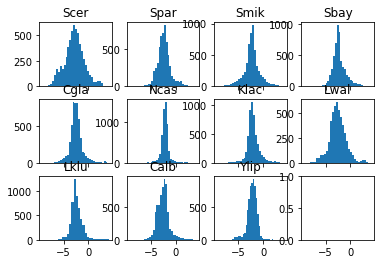

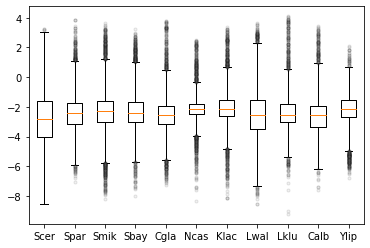

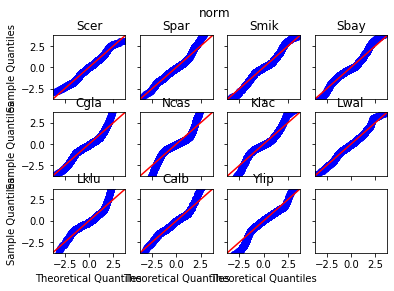

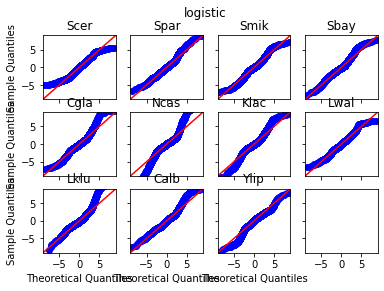

In [2]:
#Load all the data and check the distribution

fig_hist, axarr_hist = plt.subplots(3,4, sharex = True)

fig_boxplot, ax_boxplot = plt.subplots()

figs_qq = {}
axarr_qq = {}
dist_dict = dist_dict = {'norm': stats.norm , 'logistic': stats.logistic}

for dist_name in dist_dict.keys():
    figs_qq[dist_name], axarr_qq[dist_name] = plt.subplots(3,4, sharex = True, sharey = True)
    figs_qq[dist_name].suptitle(dist_name)
                                                           
spec_order_post_WGH = ['Scer','Spar','Smik','Sbay', 'Cgla', 'Ncas']
spec_order_pre_WGH = ['Klac','Lwal','Lklu', 'Calb', 'Ylip'] #Removed Dhan

raw_exp_tsankov_all = {}

boxplot_data = []

for jj, spec in enumerate(spec_order_post_WGH+spec_order_pre_WGH) : 
    #Load expression data
    fname = data_processing_dir + os.sep + os.path.normpath('regev_data/raw_exp/' + spec + '_raw_exp.csv')
    raw_exp_tsankov = pd.read_csv(fname, index_col = 'orf_name')
    raw_exp_tsankov_all[spec] = raw_exp_tsankov['med_qnorm']
    boxplot_data.append(raw_exp_tsankov_all[spec])
    ax_hist = axarr_hist.flatten()[jj]
    ax_hist.hist(raw_exp_tsankov_all[spec], bins=30)
    ax_hist.set_title(spec)
    
    
    for dist_name, dist in dist_dict.items(): 
        ax_qq = axarr_qq[dist_name].flatten()[jj]
        sm.qqplot(raw_exp_tsankov_all[spec], dist = dist, fit = True, line = '45', ax = ax_qq )
        ax_qq.set_title(spec)
    
        ax_qq.set_ylabel('')
        ax_qq.set_xlabel('')
        if jj in [0,4,8]:
            ax_qq.set_ylabel('Sample Quantiles')
        if jj in [8,9,10,11]: 
            ax_qq.set_xlabel('Theoretical Quantiles')

flierprops = dict(marker='o', markerfacecolor='grey', markersize=3,
                  linestyle='none', alpha = 0.1)
ax_boxplot.boxplot(boxplot_data, whis=2.0, labels = spec_order_post_WGH+spec_order_pre_WGH, flierprops=flierprops)    



The distributions of expression between the different species seems different.  Some are more normal than others (SCer, LWal)  and some look more logistic than others  (SPar, SBay, Dhan, YLip).  As a rough comparison, I will just assume a standard normal distribution and scale by mean and variance.  In particular S.Cer seems to have a much wider variance - I am imagining that the microarray for S.Cer had a lot more probes for lower expressing genes - and maybe the probes for the other species were constrained to those that were highest expressing?   

{'whiskers': [<matplotlib.lines.Line2D at 0x12a50336e08>,
 'caps': [<matplotlib.lines.Line2D at 0x12a50302048>,
 'boxes': [<matplotlib.lines.Line2D at 0x12a50336d48>,
 'medians': [<matplotlib.lines.Line2D at 0x12a50302248>,
 'fliers': [<matplotlib.lines.Line2D at 0x12a5084b308>,
 'means': []}

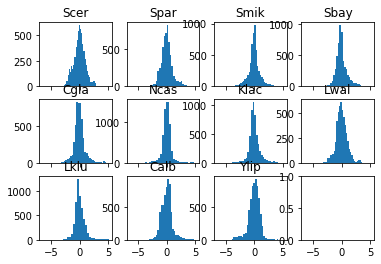

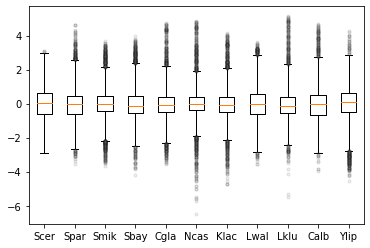

In [3]:
#Normalize all the raw expression data by mean and std (although we know they are not all normal)
#Note: the raw data value is already the median of the quantile normalized replicates per tsankov methods. 


fig_hist, axarr_hist = plt.subplots(3,4, sharex = True)

fig_boxplot, ax_boxplot = plt.subplots()


raw_exp_tsankov_all_norm = {}

boxplot_data = []
for jj, spec in enumerate(spec_order_post_WGH+spec_order_pre_WGH) : 
    std = raw_exp_tsankov_all[spec].std()
    mu = raw_exp_tsankov_all[spec].mean()
    raw_exp_tsankov_all_norm[spec] = (raw_exp_tsankov_all[spec]-mu)/std

    boxplot_data.append(raw_exp_tsankov_all_norm[spec])
    ax_hist = axarr_hist.flatten()[jj]
    ax_hist.hist(raw_exp_tsankov_all_norm[spec], bins=30)
    ax_hist.set_title(spec)

flierprops = dict(marker='o', markerfacecolor='grey', markersize=3,
                  linestyle='none', alpha = 0.1)
ax_boxplot.boxplot(boxplot_data, whis=2.0, labels = spec_order_post_WGH+spec_order_pre_WGH, flierprops=flierprops)    


In [30]:
# # Save normalized tsankov data (only need to do this once)
# for spec, data in raw_exp_tsankov_all_norm.items(): 
#     fname_array_data = data_processing_dir + os.path.normpath('regev_data/raw_exp/' + spec + '_raw_exp_norm.csv')
#     data.to_csv(fname_array_data)

### Check correlation between raw expression and rlog for S.Cer and K.Lac
<a id='correlation_check_raw'></a>

In [3]:
#load average rlog data
rlog_data_mean_var = {}
for spec in ['SC', 'KL']:
    rlog_data_mean_var[spec] = pd.read_csv(data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/20181017_rlog_mean_' + spec + '.csv' ),index_col=0)

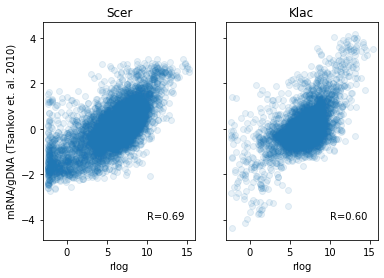

In [4]:
fig_sckl_raw_all, ax_sckl_raw_all = plt.subplots(1,2, sharey=True)

spec_SCKL = {'Scer':'SC', 'Klac': 'KL'}


for jj, spec in enumerate(['Scer', 'Klac']):
    fname_raw_exp_data = data_processing_dir + os.path.normpath('regev_data/raw_exp/' + spec + '_raw_exp_norm.csv')
    raw_exp_data = pd.read_csv(fname_raw_exp_data, header=None, index_col=0)


    raw_exp_rlog = raw_exp_data.merge(rlog_data_mean_var[spec_SCKL[spec]].loc[:,['AS_WT_cont_mean']], how='inner', left_index = True, right_index=True)

    raw_exp_rlog.rename(columns={1:'Tsankov', 'AS_WT_cont_mean': 'rlog'}, inplace=True)
    
    raw_exp_rlog_nanrm = raw_exp_rlog[((~raw_exp_rlog.isna()) & (~raw_exp_rlog.isna()) )]
    corr_coef = np.corrcoef(raw_exp_rlog_nanrm.T)[0][1]    
    
    ax = ax_sckl_raw_all[jj]
    ax.scatter(raw_exp_rlog['rlog'], raw_exp_rlog['Tsankov'], alpha = 0.1)
    ax.set_title(spec)
    ax.set_xlim([-3,16])
    ax.set_xlabel('rlog')
    if jj == 0: 
        ax.set_ylabel('mRNA/gDNA (Tsankov et. al. 2010)')
    ax.text(10,-4, 'R={:.2f}'.format(corr_coef))
    
    
    
fig_sckl_raw_all.savefig(figsave_dir + 'rlog_vs_tsankov_all.svg')


### Look at raw expression for GOIs only

<a id=depka_exp></a>

In [2]:
# # #Load GOI ohnolog data

# # fname = data_processing_dir + os.sep + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/gois_20181205.pkl')

# # with open(fname, 'rb') as file:
# #     [ohnologs_goi,ohnologs_expression_sorted,goi_criteria] = pickle.load(file)

# # ohnologs_goi.set_index('Ancestor', inplace=True)
# # ohnologs_expression_sorted.set_index('Ancestor', inplace=True)
# # ohnologs_goi.rename(columns={'sc_genename_' + level: 'genename_'+level for level in ['low','high']},inplace=True)



# #Load GOI ohnolog data

# fname = data_processing_dir + os.sep + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/gois_20181205.pkl')

# with open(fname, 'rb') as file:
#     [ohnologs_goi,ohnologs_expression_sorted,goi_criteria] = pickle.load(file)

# ohnologs_goi.set_index('Ancestor', inplace=True)
# ohnologs_expression_sorted.set_index('Ancestor', inplace=True)
    
    
# #Load kl_sc_PKA data
# fname_cross_spec_comparison = data_processing_dir + os.path.normpath("kl_sc_PKA_as_m24_r1g1_20181017/cross_species_compare_ASminus_ASplus_YPD_20181204.csv")
# kl_sc_PKA_data = pd.read_csv(fname_cross_spec_comparison, index_col=0)

# #Merge LFC data from KL with rest of ohnolog data
# ohnologs_goi_kl_data = ohnologs_goi.merge(kl_sc_PKA_data.loc[:,
#                     ['N SCer Orthologs', 'kl_genename', 'sc_genename', 'baseMean_KL',
#                     'log2FoldChange_KL', 'lfcSE_KL', 'stat_KL', 'pvalue_KL', 'padj_KL']],
#                     how='left', left_on = 'sc_genename_high', right_on = 'sc_genename')


# #Load KL ortholog data
# kl_orthologs = pd.read_pickle(data_processing_dir + "ortholog_files_YGOB/kl_orthologs.pkl")

# #load average rlog data
# rlog_data_mean_var = {}
# for spec in ['SC', 'KL']:
#     rlog_data_mean_var[spec] = pd.read_csv(data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/20181017_rlog_mean_' + spec + '.csv' ),index_col=0)

# #Rename KL rlog data columns: 
# new_kl_columns = [column + '_kl' for column in rlog_data_mean_var['KL'].columns]
# rlog_data_mean_var['KL'].columns = new_kl_columns

# #Merge k.lac rlog data with ohnolog_gois
# ohnologs_goi_klorth = ohnologs_goi.merge(kl_orthologs, how='left', left_on='sc_genename_low',right_on='sc_genename')
# ohnologs_goi_rlog = ohnologs_goi_klorth.merge(rlog_data_mean_var['KL'], how = 'left', left_on='kl_genename', right_index = True)
    

In [5]:
#Load GOI ohnolog data

#fname = data_processing_dir + os.sep + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/gois_20181205.pkl')

# with open(fname, 'rb') as file:
#     [ohnologs_goi,ohnologs_expression_sorted,goi_criteria] = pickle.load(file)

# ohnologs_goi.set_index('Ancestor', inplace=True)
# ohnologs_expression_sorted.set_index('Ancestor', inplace=True)
# ohnologs_goi.rename(columns={'sc_genename_' + level: 'genename_'+level for level in ['low','high']},inplace=True)


ohnologs_dePKA = pd.read_csv(data_processing_dir + os.path.normpath("kl_sc_PKA_as_m24_r1g1_20181017/20200617_ohnologs_dePKA.csv"), index_col=0)
# ohnologs_goi.set_index('Ancestor', inplace=True)
ohnologs_expression_sorted = pd.read_csv(data_processing_dir + os.path.normpath("kl_sc_PKA_as_m24_r1g1_20181017/20200607_ohnologs_expression_sorted.csv"), index_col=0)
# ohnologs_expression_sorted.set_index('Ancestor', inplace=True)

ohnologs_goi = ohnologs_dePKA.rename(columns={'sc_genename_' + level: 'genename_'+level for level in ['low','high']})



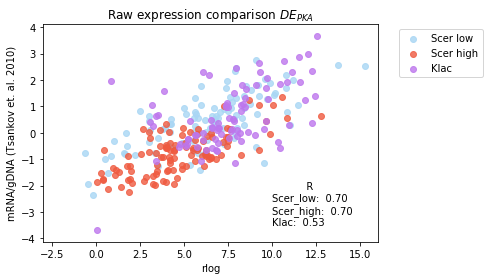

In [9]:
## Look at correlation between tsankov data and DEpka genes in S.Cer and K.Lac

#Add SCer prefix to genename columns
ohnologs_goi['Scer_genename_low'] = ohnologs_goi['genename_low']
ohnologs_goi['Scer_genename_high'] = ohnologs_goi['genename_high']

#Add KLac_genename column
orth_dir = data_processing_dir + 'ortholog_files_YGOB' + os.sep
scer_klac_lookup = yeast_esr_exp.read_orth_lookup_table('Scer', 'Klac', orth_dir)
ohnologs_goi['Klac_genename'] = [scer_klac_lookup[gene][0] for gene in ohnologs_goi['Scer_genename_low']]



fig_sckl_raw_goi, ax_sckl_raw_goi = plt.subplots()

orth_set_dict = {'Scer low': ('Scer','SC','_low','#a8d6f4'),  #(spec, rlog spec, level suffix, color) 
            'Scer high': ('Scer','SC','_high','#ef5a40'),
            'Klac': ('Klac','KL','','#bd76ed'),
           }

corr_coefs = {}
for jj, orth_set in enumerate(['Scer low', 'Scer high', 'Klac']):
    spec = orth_set_dict[orth_set][0]
    level_suff = orth_set_dict[orth_set][2]
    rlog_spec = orth_set_dict[orth_set][1]
    
    fname_raw_exp_data = data_processing_dir + os.path.normpath('regev_data/raw_exp/' + spec + '_raw_exp_norm.csv')
    raw_exp_data = pd.read_csv(fname_raw_exp_data, header=None, index_col=0)
    
    #picks out goi that are not mapped to none in ortholog mapping for depka
    goi_spec = [gene for gene in ohnologs_goi[spec + '_genename' + level_suff] if gene != 'NONE']
    rlog_data = rlog_data_mean_var[rlog_spec].loc[goi_spec,['AS_WT_cont_mean']] 
    
    raw_exp_rlog = raw_exp_data.merge(rlog_data, how='inner', left_index=True, right_index = True)

    raw_exp_rlog.rename(columns={1: 'Tsankov', 'AS_WT_cont_mean': 'rlog'}, inplace=True)
    
    raw_exp_rlog_nanrm = raw_exp_rlog[((~raw_exp_rlog.isna()) & (~raw_exp_rlog.isna()) )]
    corr_coefs[orth_set] = np.corrcoef(raw_exp_rlog_nanrm.T)[0][1]    
    
    ax_sckl_raw_goi.scatter(raw_exp_rlog['rlog'], raw_exp_rlog['Tsankov'], alpha = 0.8, color = orth_set_dict[orth_set][3], label=orth_set)

    
ax_sckl_raw_goi.set_title('Raw expression comparison $DE_{PKA}$')
ax_sckl_raw_goi.set_xlim([-3,16])
ax_sckl_raw_goi.set_xlabel('rlog')
ax_sckl_raw_goi.set_ylabel('mRNA/gDNA (Tsankov et. al. 2010)')
ax_sckl_raw_goi.legend(loc='upper left', bbox_to_anchor=(1.05,1.0))
ax_sckl_raw_goi.text(10,-3.5, 
                     '           R\nScer_low:  {0:.2f}\nScer_high:  {1:.2f}\nKlac:  {2:.2f}'.format(*[corr_coefs[orth_set] for orth_set in ['Scer low', 'Scer high', 'Klac']])
                    )
    
    
    
fig_sckl_raw_goi.savefig(figsave_dir + 'rlog_vs_tsankov_goi.svg')

In [10]:
# given genes of interest load raw expression data 

seed_spec = 'Scer'
sort_column = 'log2FoldChange'

#Post WGH data (minus seed spec)
spec_order_post_WGH = ['Spar','Smik','Sbay', 'Cgla', 'Ncas']
spec_order_pre_WGH = ['Klac','Lwal','Lklu','Calb', 'Ylip']

#Smik missing mapping from ygob names to Regev lab orthogroups.  C.Gla mapping for Sec14 seems better with orthogroups than YGOB
#Going to start with orthogroup mapping from Regev lab for all of them. 
#K.Lac had a major discrepancy with annotation in regev lab data.   


ohnologs_goi_array = yeast_esr_exp.load_tsankov_data_gois(ohnologs_goi, sort_column, seed_spec, spec_order_post_WGH, spec_order_pre_WGH)

#Add SC_common_name_high, low and high_low columns to an ohnologs_file
#SC_common_name lookup function requires genename_low/high columns
orth_dir = data_processing_dir + 'orthologs_regev'
for level in ['low', 'high']: 
    ohnologs_goi_array['genename_' + level] = ohnologs_goi_array[seed_spec + '_genename_' + level]
ohnologs_goi_array = yeast_esr_exp.SC_common_name_columns_ohnologs(ohnologs_goi_array, seed_spec, orth_dir)



YBR056W-A has no data in tsankov experiment for Scer
YJL159W has no data in tsankov experiment for Scer
YGR169C-A has no data in tsankov experiment for Scer
YCR075W-A has no data in tsankov experiment for Scer
YJR005C-A has no data in tsankov experiment for Scer
YBR056W-A is not in orthogroup index Spar
YBR056W-A is not in orthogroup index Sbay
YBR056W-A is not in orthogroup index Cgla
CAGL0D02640g has no entry in Tsankov dataset for Cgla. Ortholog of YHR092C
CAGL0K05813g has no entry in Tsankov dataset for Cgla. Ortholog of YDR513W
Neither of the orthologs for YDR513W have an entry in Tsankov dataset
CAGL0C01325g has no entry in Tsankov dataset for Cgla. Ortholog of YNL052W
Neither of the orthologs for YNL052W have an entry in Tsankov dataset
CAGL0D02640g has no entry in Tsankov dataset for Cgla. Ortholog of YDR342C
CAGL0K05813g has no entry in Tsankov dataset for Cgla. Ortholog of YCL035C
Neither of the orthologs for YCL035C have an entry in Tsankov dataset
CAGL0C01325g has no entry 

In [11]:
columns_to_view = ['SC_common_name_high', 'SC_common_name_low','Scer_raw_exp_tsankov_low',
       'Scer_raw_exp_tsankov_high', 'Klac_raw_exp_tsankov',
       'Spar_raw_exp_tsankov_low', 'Spar_raw_exp_tsankov_high',
       'Smik_raw_exp_tsankov_low', 'Smik_raw_exp_tsankov_high',
       'Sbay_raw_exp_tsankov_low', 'Sbay_raw_exp_tsankov_high',
       'Cgla_raw_exp_tsankov_low', 'Cgla_raw_exp_tsankov_high',
       'Ncas_raw_exp_tsankov_low', 'Ncas_raw_exp_tsankov_high',
       'Lwal_raw_exp_tsankov',
       'Lklu_raw_exp_tsankov', 'Calb_raw_exp_tsankov',
       'Ylip_raw_exp_tsankov']  #,'AS_WT_cont_mean_high','AS_WT_cont_mean_low','AS_WT_cont_mean_kl']

In [12]:
ohnologs_goi_array.loc[ohnologs_goi_array['SC_common_name_high']=='PYK2',columns_to_view].T

Ancestor,Anc_7.45
SC_common_name_high,PYK2
SC_common_name_low,CDC19
Scer_raw_exp_tsankov_low,[2.741324246029439]
Scer_raw_exp_tsankov_high,[-0.9144055292712904]
Klac_raw_exp_tsankov,[2.6312935012349428]
Spar_raw_exp_tsankov_low,[4.3284973708700045]
Spar_raw_exp_tsankov_high,[-0.4744905875184239]
Smik_raw_exp_tsankov_low,[3.3451069809009706]
Smik_raw_exp_tsankov_high,[0.5004437484679656]
Sbay_raw_exp_tsankov_low,[3.327958356809796]


In [14]:
#ohnologs_goi_rlog['SC_common_name_high']

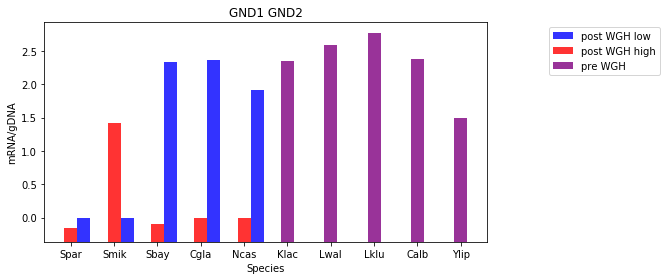

In [15]:
high_gene =  'GND2'#'PGM2'#'YCR075W-A' #'EGO2' #GND2 #GPM2 #'PGM2'
row = ohnologs_goi_array[ohnologs_goi_array['SC_common_name_high']==high_gene]

fig, ax = plt.subplots(figsize = (10,4))
bar_width = 0.30
opacity = 0.8

spec_order_post_WGH = ['Spar','Smik','Sbay', 'Cgla', 'Ncas'] #['Scer','Spar','Smik','Sbay', 'Cgla', 'Ncas']
spec_order_pre_WGH = ['Klac','Lwal','Lklu', 'Calb', 'Ylip'] #['Klac','Lwal','Lklu','Dhan', 'Calb', 'Ylip']


# data to plot

data = {}
index_post_WGH = {}
index_shift = {'high': 0.0, 'low': bar_width}
bar_width_post_WGH = {}
for level in ['high','low']: 
    index_post_WGH_level = []
    data_level = []
    bar_width_post_WGH_level = []
    for jj, spec in enumerate(spec_order_post_WGH): 
        raw_exp_values = row[spec + '_raw_exp_tsankov_' + level].values[0]
        
        if isinstance(raw_exp_values,str): #The value will be a string if there was no expression value
            index_post_WGH_level.append(jj)
            data_level.append(0)
            bar_width_post_WGH_level.append(bar_width)
        elif spec == 'Scer':  #Scer values are floats, not lists
            index_post_WGH_level.append(jj)
            data_level.append(raw_exp_values)
            bar_width_post_WGH_level.append(bar_width)
        else: 
            for kk, raw_exp_value in enumerate(raw_exp_values):
                index_post_WGH_level.append(jj + bar_width*kk/len(raw_exp_values))
                if isinstance(raw_exp_value,str):
                    raw_exp_value=0.0
                data_level.append(raw_exp_value)
                bar_width_post_WGH_level.append(bar_width/len(raw_exp_values))

    data[level] = data_level
    index_post_WGH[level] = np.array(index_post_WGH_level) + index_shift[level]
    bar_width_post_WGH[level] = bar_width_post_WGH_level


index_shift = len(spec_order_post_WGH)
index_pre_WGH = []
data_pre_WGH = []
bar_width_pre_WGH = []
for jj, spec in enumerate(spec_order_pre_WGH): 
    raw_exp_values = row[spec + '_raw_exp_tsankov'].values[0]
    if isinstance(raw_exp_values,str): #The value will be a string if there was no expression value
        index_pre_WGH.append(jj)
        data_pre_WGH.append(0)
        bar_width_pre_WGH.append(bar_width)
    else: 
        for kk, raw_exp_value in enumerate(raw_exp_values):
            index_pre_WGH.append(jj + bar_width*kk/len(raw_exp_values))
            if isinstance(raw_exp_value,str):
                raw_exp_value= np.nan  #0.0
            data_pre_WGH.append(raw_exp_value)
            bar_width_pre_WGH.append(bar_width/len(raw_exp_values))

index_pre_WGH = np.array(index_pre_WGH) + index_shift

#Set bottom of bar to be the lowest number in all the data

bottom = min(data['low']+data['high']+data_pre_WGH)-0.2

rects_low = plt.bar(index_post_WGH['low'], np.array(data['low'])-bottom, bar_width_post_WGH['low'],
                 alpha=opacity,
                 color='blue',
                 label='post WGH low', 
                 bottom = bottom)
 
rects_high = plt.bar(index_post_WGH['high'], np.array(data['high'])-bottom, bar_width_post_WGH['high'],
                 alpha=opacity,
                 color='red',
                 label='post WGH high', 
                 bottom = bottom)

rects_pre_WGH = plt.bar(index_pre_WGH, np.array(data_pre_WGH)-bottom, bar_width_pre_WGH,
                 alpha=opacity,
                 color='purple',
                 label='pre WGH', 
                 bottom = bottom)
 
plt.xlabel('Species')
plt.ylabel('mRNA/gDNA')
plt.title(row['SC_common_name_low'].values[0] + ' ' + row['SC_common_name_high'].values[0])
plt.xticks(np.arange(len(spec_order_post_WGH)+len(spec_order_pre_WGH)), spec_order_post_WGH + spec_order_pre_WGH)
plt.legend(bbox_to_anchor=(1.4,1.0))
 
plt.tight_layout()
plt.show()

In [16]:
#Go through each of my GOIs and make a vector.
#If there are no orthologs, set the value to np.Nan
#If there is an unexpected duplicate gene set the value to the mean expression between the two

spec_order_post_WGH = ['Spar','Smik','Sbay', 'Cgla', 'Ncas']
spec_order_pre_WGH = ['Klac','Lwal','Lklu', 'Calb', 'Ylip']

spec_sets = {'Post WGH low' : ['Scer'] + spec_order_post_WGH, 
             'Post WGH high' : ['Scer'] + spec_order_post_WGH, 
             'Pre WGH' : spec_order_pre_WGH} 

raw_expression_data_df = yeast_esr_exp.tsankov_ohnolog_expression_data_SSD_combine(ohnologs_goi_array, spec_sets, combine_method = 'mean')
  


In [17]:
#Save raw_expression_data
raw_expression_data_df.to_csv(os.path.normpath(data_processing_dir + 'regev_data/20200620_raw_expression_data.csv'))


### Load raw_expression_data_df to make heatmap and barplot

<a id='exp_plots'></a>


In [2]:

#Load raw_expression_data_df
raw_expression_data_df = pd.read_csv(os.path.normpath(data_processing_dir + 'regev_data/20200620_raw_expression_data.csv'),index_col=0)


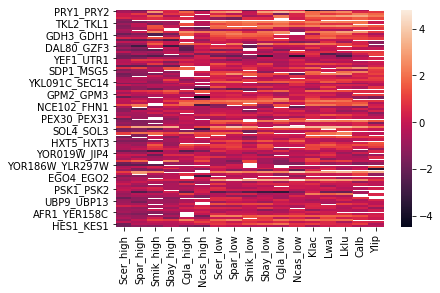

In [21]:
#heatmap with no filters: 
fig_hmap_raw, ax_hmap_raw = plt.subplots()
sns.heatmap(raw_expression_data_df, ax=ax_hmap_raw)


In [3]:
#This species order applies for conservation images. 
spec_order_post_WGH = ['Spar','Sbay','Smik','Suva', 'Cgla', 'Ncas','Vpol']
spec_order_pre_WGH = ['Klac','Lwal','Lklu', 'Calb', 'Ylip','Sjap','Spom']

spec_sets = {'Post WGH low' : ['Scer'] + spec_order_post_WGH, 
             'Post WGH high' : ['Scer'] + spec_order_post_WGH, 
             'Pre WGH' : ['Klac','Lwal', 'Lklu'],
             'Outgroup' : ['Calb','Ylip','Sjap','Spom']
             } 
# spec_sets = {'Post WGH low' : ['Scer'] + spec_order_post_WGH, 
#              'Post WGH high' : ['Scer'] + spec_order_post_WGH, 
#              'Pre WGH' : spec_order_pre_WGH} 

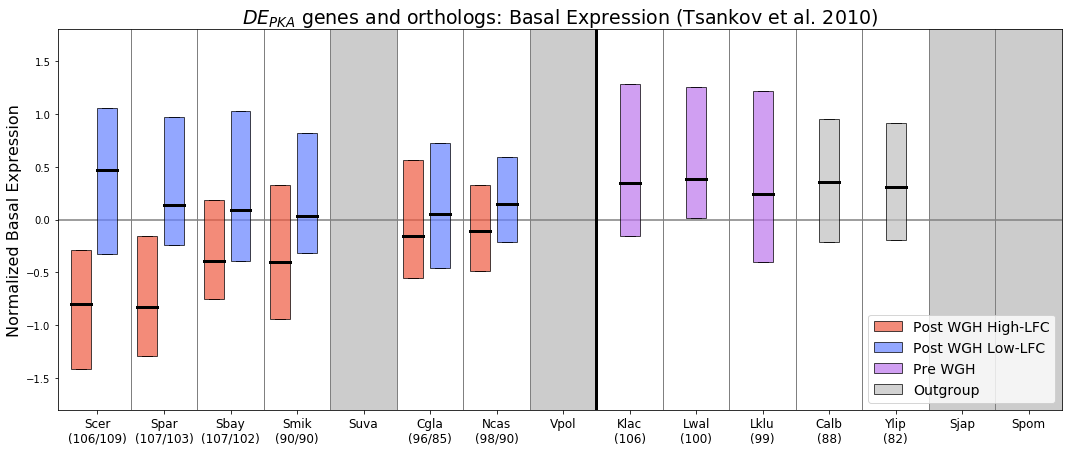

In [4]:
#Plot mean and variance of raw expressionfor each species 
#add text for total number of orthologs? 

fig_raw_exp_summary, ax_raw_exp_summary = plt.subplots(figsize=(18,7))
bw = 0.3
margin = 0.1
spacer = bw/2 + margin
opacity = 0.8

seed_spec = 'Scer'
# spec_order_post_WGH = ['Spar','Smik','Sbay', 'Cgla', 'Ncas']
# spec_order_pre_WGH = ['Klac','Lwal','Lklu', 'Calb', 'Ylip']

# spec_sets = {'Post WGH low' : [seed_spec] + spec_order_post_WGH, 
#              'Post WGH high' : [seed_spec] + spec_order_post_WGH, 
#              'Pre WGH' : spec_order_pre_WGH} 

# spec_order_post_WGH = ['Spar','Sbay','Smik','Suva', 'Cgla', 'Ncas','Vpol']
# spec_order_pre_WGH = ['Klac','Lwal','Lklu', 'Calb', 'Ylip','Sjap','Spom']

# spec_sets = {'Post WGH low' : [seed_spec] + spec_order_post_WGH, 
#              'Post WGH high' : [seed_spec] + spec_order_post_WGH, 
#              'Pre WGH' : spec_order_pre_WGH} 


colors = {'low': '#6682ff', 'high':'#ef5a40', 'Pre WGH': '#bd76ed', 'Outgroup':'#bfbfbf'}
legend_label_dict = {'low': 'Post WGH Low-LFC', 
                 'high': 'Post WGH High-LFC', 
                 'Pre WGH': 'Pre WGH', 
                 'Outgroup': 'Outgroup'}
index = {'low':[],'high':[], 'Pre WGH':[], 'Outgroup':[]}
data_N = {'low':{},
          'high':{}, 
          'Pre WGH':{},
          'Outgroup':{}
         }
data = {'low':[],'high':[], 'Pre WGH':[], 'Outgroup': []}
level_space = {'high':0.0, 'low': 0.5-margin}
label_order = []
label_ind = []

ymax = 1.8
ymin = -1.8
patches = []

#all_conds = set(expression_data_df_pka_corr.columns)


#Post WGH Species
#assumes the same species sets are in both
jj = 0
for spec in spec_sets['Post WGH high']: 
    for level in ['low','high']:
        data_N[level][spec]=np.inf 
    
    label_ind.append(jj+0.5)    
    
    try:
        for level in ['low', 'high']:
            column = raw_expression_data_df[spec + '_' + level]
            index[level].append(spacer + jj + level_space[level])
            data[level].append(column[~column.isna()])
            #data_mean[level].append(column.mean())
            #data_std[level].append(column.std())
            N_spec_cond = sum(~(np.isnan(column)))
            N_spec_old = data_N[level][spec]
            data_N[level][spec] = min(N_spec_old, N_spec_cond)

        label_order.append(spec + '\n(' + str(data_N['low'][spec]) + '/' + str(data_N['high'][spec]) + ')')    
    except KeyError:
        missing_data_rect = Rectangle((jj,ymin),1,ymax-ymin,color='grey', alpha=0.4)
        patches.append(missing_data_rect)
        label_order.append(spec)
        
    jj = jj+1

#pre WGH Species
for spec_set in ['Pre WGH', 'Outgroup']:
    for spec in spec_sets[spec_set]: 
        label_ind.append(jj+0.5)
        try:         
            column = raw_expression_data_df[spec]
            index[spec_set].append(jj+spacer+0.25)
            data[spec_set].append(column[~column.isna()])
            #data_mean['Pre WGH'].append(column.mean())
            #data_std['Pre WGH'].append(column.std())
            data_N[spec_set][spec] = sum(~(np.isnan(column)))
            label_order.append(spec + '\n(' + str(data_N[spec_set][spec]) + ')') 
        except KeyError:
            label_order.append(spec)
            missing_data_rect = Rectangle((jj,ymin),1,ymax-ymin,color='grey', alpha=0.4)
            patches.append(missing_data_rect)
        jj = jj+1


legend_handles = []
legend_labels = []
for subset_name in ['high', 'low','Pre WGH', 'Outgroup']: 
    subset_data = data[subset_name]
    raw_exp_bp = ax_raw_exp_summary.boxplot(subset_data, patch_artist=True, showfliers=False, 
                                          positions = index[subset_name], 
                                          widths = bw, whis = 0.0)
    kk=0
    for patch in raw_exp_bp['boxes']:
        patch.set(facecolor=colors[subset_name], alpha = 0.7)  
        if kk == 0: 
            legend_handles.append(patch)
        kk = kk+1
    
    plt.setp(raw_exp_bp['medians'], color='black', linewidth=3)
    
    legend_labels.append(legend_label_dict[subset_name])



ax_raw_exp_summary.vlines(list(range(len(spec_sets['Post WGH high']) + len(spec_sets['Pre WGH'])+len(spec_sets['Outgroup'])))[1:], ymin=ymin, ymax = ymax, colors = 'gray', linewidth = 1)
ax_raw_exp_summary.vlines([len(spec_sets['Post WGH high'])], ymin = ymin, ymax = ymax, colors = 'k',linewidth=3)
ax_raw_exp_summary.set_xticks(label_ind)
ax_raw_exp_summary.set_xticklabels(label_order, fontdict={'size':12})
ax_raw_exp_summary.set_ylim(ymin,ymax)
ax_raw_exp_summary.set_xlim(-0.1, len(label_ind))
ax_raw_exp_summary.plot((-0.1,len(label_ind)),(0,0), color='grey',zorder=-1)
ax_raw_exp_summary.set_ylabel('Normalized Basal Expression', fontdict={'size': 16})
ax_raw_exp_summary.legend(legend_handles, legend_labels, prop={'size':14})  #bbox_to_anchor = (1.0,1.0), loc='upper left', 
ax_raw_exp_summary.set_title('$DE_{PKA}$ genes and orthologs: Basal Expression (Tsankov et al. 2010)',fontdict={'fontsize':19})


p = PatchCollection(patches,match_original=True)
#p.set_array(np.array(colors))
ax_raw_exp_summary.add_collection(p)


fig_raw_exp_summary.savefig(figsave_dir + 'raw_exp_conservation_summary.svg')

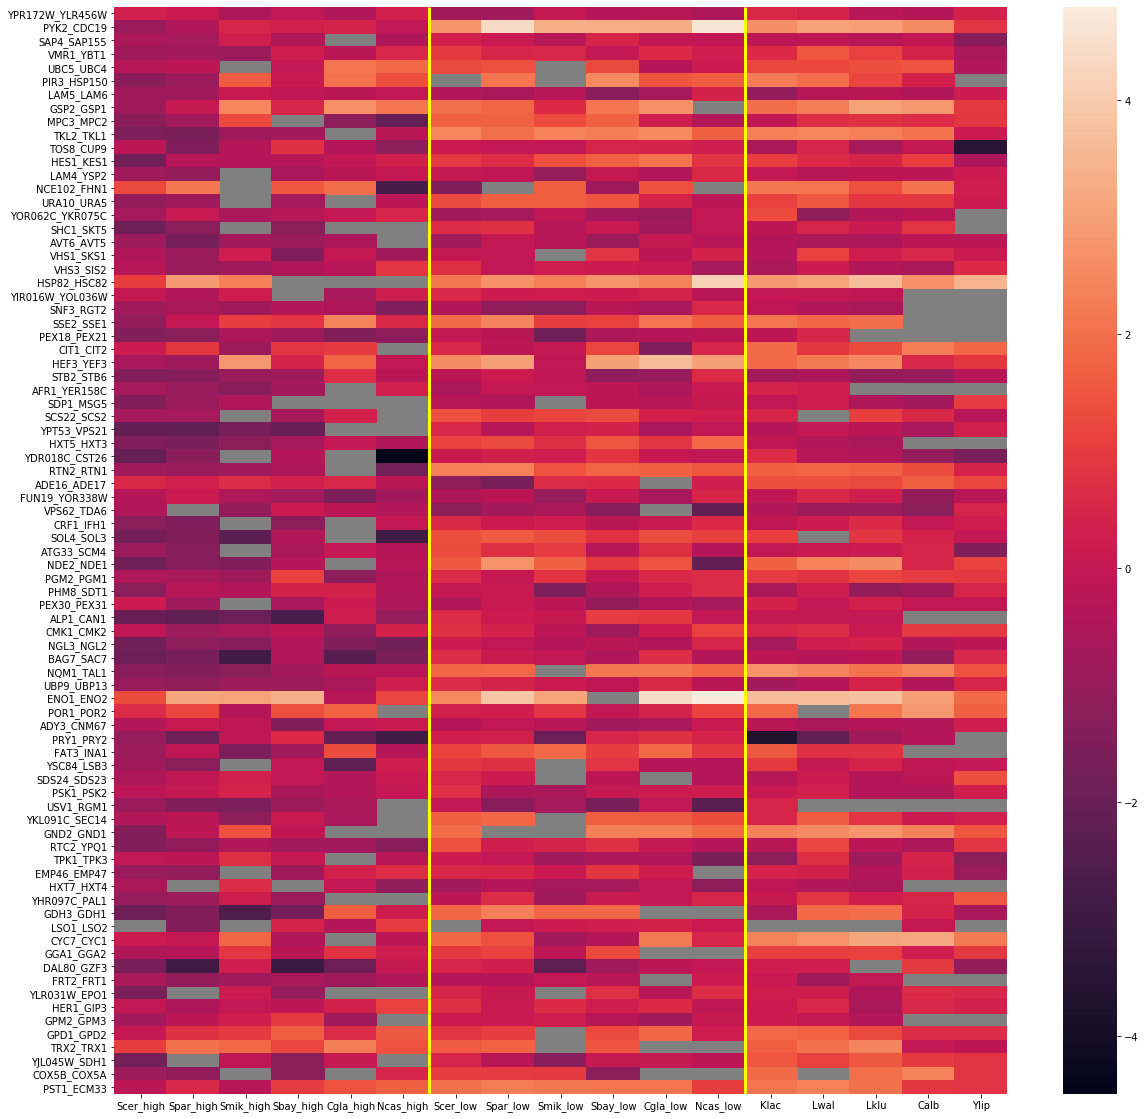

In [33]:
#heatmap using same order as sorted expression data: 

spec_order_post_WGH_tsankov_only = ['Scer','Spar','Smik','Sbay', 'Cgla', 'Ncas']

#Load expression_data_df_sorted 
expression_data_df_sorted = pd.read_csv(os.path.normpath(data_processing_dir + 'regev_data/20191125_expression_data_sorted.csv'),index_col=0)


#heatmap with no filters: 
fig_hmap_raw_sorted, ax_hmap_raw_sorted = plt.subplots(figsize=(20,20))
raw_expression_data_df_sorted = raw_expression_data_df.loc[(set(raw_expression_data_df.index) & set(expression_data_df_sorted.index)),:]
sns.heatmap(raw_expression_data_df_sorted, ax=ax_hmap_raw_sorted)

ax_hmap_raw_sorted.set_facecolor('grey')
# ax_hmap_exp.set_xticks(new_ticks)
# ax_hmap_exp.set_xticklabels(new_tick_labels, rotation = 90)  #rotation=45, ha='right')
#ax_hmap_raw_sorted.vlines(sep_lines, ymin = 0, ymax = len(expression_data_df_pka_corr), colors = 'white')
ax_hmap_raw_sorted.vlines([len(spec_order_post_WGH_tsankov_only), 2*len(spec_order_post_WGH_tsankov_only)],
                          ymin = 0, ymax = len(raw_expression_data_df_sorted), colors = 'yellow',linewidth=3)

ax_hmap_raw_sorted.set_rasterized(True)    #Had to do this because .svg took ages on inkscape to work with
fig_hmap_raw_sorted.savefig(figsave_dir + 'expression_conservation.svg')

In [49]:
# #heatmap prior to clustering, but after filtering wierd species and rows with many NANs

# fig_hmap, ax_hmap = plt.subplots()

# #Filter out S.Cer because its distribution is so different
# #Filter out D.Han because there are so many NANs (probably an indexing problem in the ortholog/expression array set)
# raw_expression_data_df_spec_filter = raw_expression_data_df.drop(columns = ['Scer_low', 'Scer_high', 'Dhan'])

# #filter out a row if it has Ndrop or more missing orthologs
# inds_to_drop = []
# Ndrop = 5
# for ind, row in enumerate(raw_expression_data_df_spec_filter.values):
#      if sum(np.isnan(row)) >= Ndrop:
#         inds_to_drop.append(ind)
        
# rows_to_drop = raw_expression_data_df_spec_filter.index[inds_to_drop]
# print('Dropped the following Paralog Pairs because there were more than ' + str(Ndrop) + ' orthologs missing.')
# print(rows_to_drop)
# raw_expression_data_df_row_filter = raw_expression_data_df_spec_filter.drop(index=rows_to_drop)


# #sns.heatmap(raw_expression_data_df_row_filter)

In [50]:
# #Performs heirarchical clustering on filtered data.  Redraws histogram with clusters organized: 

# dm = spd.pdist(expression_data_df_row_filter.values, metric = yeast_esr_exp.correlation_nan_filt)
# row_cluster = sch.linkage(dm, method='average', optimal_ordering=True)    #might also try 'centroid', 'median', and 'ward'

# row_ind_reorder = sch.leaves_list(row_cluster)

# old_rows = expression_data_df_row_filter.index.tolist()
# new_rows = [old_rows[ind] for ind in row_ind_reorder]

# expression_data_df_reorder = expression_data_df_row_filter.reindex(new_rows)


# fig_hmfilt, ax_hmfilt = plt.subplots()
# sns.heatmap(expression_data_df_reorder, ax=ax_hmfilt)

# fig_dend, ax_dend = plt.subplots()
# sch.dendrogram(row_cluster, ax=ax_dend)

In [34]:
# flat_clust = sch.fcluster(row_cluster,1.0, criterion='distance')

# fig_clust2, ax_clust2 = plt.subplots(figsize=(10,10))

# #pick data from a given cluster
# cluster_no = 2
# expression_data_clust = expression_data_df_row_filter[flat_clust==cluster_no]

# #sort by average of the low columns
# cols_to_avg = ['Spar_low', 'Smik_low', 'Sbay_low', 'Cgla_low', 'Ncas_low']
# expression_data_clust_subset =  expression_data_clust.loc[:,cols_to_avg]
# expression_data_clust['low_median'] = expression_data_clust_subset.median(axis=1)
# expression_data_clust_sorted = expression_data_clust.sort_values(by='low_median', ascending=False)
# hm = sns.heatmap(expression_data_clust_sorted.drop(columns = 'low_median') , ax=ax_clust2)
# hm.set_xticklabels(hm.get_xticklabels(), rotation = 45)

In [35]:
# flat_clust = sch.fcluster(row_cluster,1.0, criterion='distance')

# fig_clust2, ax_clust2 = plt.subplots(figsize=(10,10))

# #all data that is not in cluster 2
# expression_data_clust = expression_data_df_row_filter[flat_clust != 2]

# #sort by average of the low columns
# cols_to_avg = ['Spar_low', 'Smik_low', 'Sbay_low', 'Cgla_low', 'Ncas_low']
# expression_data_clust_subset =  expression_data_clust.loc[:,cols_to_avg]
# expression_data_clust['low_median'] = expression_data_clust_subset.median(axis=1)
# expression_data_clust_sorted = expression_data_clust.sort_values(by='low_median', ascending=False)
# hm = sns.heatmap(expression_data_clust_sorted.drop(columns = 'low_median') , ax=ax_clust2)
# hm.set_xticklabels(hm.get_xticklabels(), rotation = 45)

In [36]:
# #Heirarchical cluster of genes with columns ordered as above to visualise ESR genes. 

# #First filter out items with mostly NA values. 
# kl_stress_nmpp1_data_filt = kl_stress_nmpp1_data_col_reorder.dropna(thresh=(len(kl_stress_nmpp1_data_col_reorder.columns)-1))

# #Drop out PKA column for clustering
# kl_stress_data = kl_stress_nmpp1_data_filt.drop('KL_PKA(AS)+1NMPP1', axis = 1)

# kl_stress_data_nafill = kl_stress_data.fillna(0.0)
# kl_stress_data_mat = kl_stress_data_nafill.as_matrix()

# #fig3, ax_cm = plt.subplots()
# #ax_cm = sns.clustermap(kl_stress_data_col_reorder_nafill,colcluster = False)
# #ax_cm.ax_heatmap.tick_params(labelleft = 'off')

# row_cluster = sch.linkage(kl_stress_data_mat, method='average')
# row_ind_reorder = sch.leaves_list(row_cluster)

# old_rows = kl_stress_nmpp1_data_filt.index.tolist()
# new_rows = [old_rows[ind] for ind in row_ind_reorder]

# kl_stress_nmpp1_data_filt_reorder = kl_stress_nmpp1_data_filt.reindex(new_rows)

# fig3, ax3 = plt.subplots()
# #ax3= sns.heatmap(kl_stress_nmpp1_data_filt_reorder)
# # ax3 = plt.imshow(kl_stress_nmpp1_data_filt_reorder.as_matrix(), cmap='RdBu', vmin=z_min, vmax=z_max,
# #            extent=[x.min(), x.max(), y.min(), y.max()],
# #            interpolation='nearest', origin='lower')
# ax3 = plt.imshow(-kl_stress_nmpp1_data_filt_reorder.as_matrix(), interpolation="nearest", aspect = 'auto', cmap = 'RdBu',vmin = -6, vmax = 6)
# plt.axis('off')
# plt.savefig('C:\Users\Ben\Google Drive\UCSF\ElSamad_Lab\Lab Meeting\\20161118\KL_genes.png')


In [37]:
# #visualize raw expression data from tsankov et al using order from gene induction conservation plot. 

# fig_hmap_tsankov, ax_hmap_tsankov = plt.subplots(figsize=(10,20))

# # #Filter out S.Cer because its distribution is so different
# # #Filter out D.Han because there are so many NANs (probably an indexing problem in the ortholog/expression array set)
# raw_expression_data_df_spec_filter = raw_expression_data_df.drop(columns = ['Scer_low', 'Scer_high'])  #, 'Dhan'])

# # #filter out a row if it has Ndrop or more missing orthologs
# # inds_to_drop = []
# # Ndrop = 5
# # for ind, row in enumerate(raw_expression_data_df_spec_filter.values):
# #      if sum(np.isnan(row)) >= Ndrop:
# #         inds_to_drop.append(ind)
        
# # rows_to_drop = raw_expression_data_df_spec_filter.index[inds_to_drop]
# # print('Dropped the following Paralog Pairs because there were more than ' + str(Ndrop) + ' orthologs missing.')
# # print(rows_to_drop)
# # raw_expression_data_df_row_filter = raw_expression_data_df_spec_filter.drop(index=rows_to_drop)

# raw_expression_data_df_sorted = raw_expression_data_df_spec_filter.loc[expression_data_df_sorted.index,:]

# sns.heatmap(raw_expression_data_df_sorted, ax=ax_hmap_tsankov)

# ax_hmap_tsankov.set_facecolor('grey')

# big_lines_tsankov = []
# tick_tracker = 0
# for column in raw_expression_data_df_sorted.columns:
#     tick_tracker = tick_tracker + 1
#     if column in {'Ncas_low', 'Ncas_high'}:
#         big_lines_tsankov.append(tick_tracker)
# ax_hmap_tsankov.vlines(big_lines_tsankov, ymin = 0, ymax = len(raw_expression_data_df_sorted), color = 'yellow', linewidth = 3)

# #fig_hmap_tsankov.savefig(os.path.normpath('C:/Users/BMH_work/Google Drive/UCSF/ElSamad_Lab/PKA/Manuscript/raw_exp_goi.svg'))


In [51]:
# #Attempt to cluser expression data

# #Performs heirarchical clustering on filtered data.  Redraws histogram with clusters organized: 

# columns_subset = []
# spec_set_name = 'Post WGH high'
# spec_set = spec_sets[spec_set_name]

# level = levels[spec_set_name]
# if level == '': 
#     level_sep = ''
# else: 
#     level_sep = '_'
# for spec in spec_set: 
#     spec_columns = [spec + '_' + condition + level_sep + level for condition in list(spec_conditions[spec])]
#     columns_subset = columns_subset + spec_columns

# expression_data_df_subset = expression_data_df_row_filter.loc[:,columns_subset]

# dm = spd.pdist(expression_data_df_subset.values, metric = yeast_esr_exp.correlation_nan_filt)
# row_cluster = sch.linkage(dm, method='average', optimal_ordering=True)    #might also try 'centroid', 'median', and 'ward'

# row_ind_reorder = sch.leaves_list(row_cluster)

# old_rows = expression_data_df_row_filter.index.tolist()
# new_rows = [old_rows[ind] for ind in row_ind_reorder]

# expression_data_df_reorder = expression_data_df_row_filter.reindex(new_rows)


# fig_hmfilt, ax_hmfilt = plt.subplots(figsize = (30,40))
# sns.heatmap(expression_data_df_reorder, ax=ax_hmfilt)

# fig_dend, ax_dend = plt.subplots()
# sch.dendrogram(row_cluster, ax=ax_dend)




In [151]:
# # Attempt to cluster induction data
# flat_clust = sch.fcluster(row_cluster,0.8, criterion='distance')

# fig_clust2, ax_clust2 = plt.subplots(figsize=(10,10))

# #pick data from a given cluster
# cluster_no = 3
# expression_data_clust = expression_data_df_row_filter[flat_clust==cluster_no]

# #sort by average of the Scer_columns in the high level

# #sort_columns

# level = 'high'
# level_sep = '_'
# spec = 'Scer'
# cols_to_avg = [spec + '_' + condition + level_sep + level for condition in list(spec_conditions[spec])]

# expression_data_clust_subset =  expression_data_clust.loc[:,cols_to_avg]
# expression_data_clust['high_scer_median'] = expression_data_clust_subset.median(axis=1)
# expression_data_clust_sorted = expression_data_clust.sort_values(by='high_scer_median', ascending=False)
# hm = sns.heatmap(expression_data_clust_sorted.drop(columns = 'high_scer_median') , ax=ax_clust2)
# hm.set_xticklabels(hm.get_xticklabels(), rotation = 45)

In [ ]:

#Smik missing mapping from ygob names to Regev lab orthogroups.  C.Gla mapping for Sec14 seems better with orthogroups than YGOB
#Going to start with orthogroup mapping from Regev lab for all of them. 
#K.Lac had a major discrepancy with annotation in regev lab data.   

#Species that have a column on the pillars file: 'Klac, Lwal, Lklu, Scer, Smik, Cgla, Ncas'
#Should also do one with Pillars orthologs

# Plot for a single gene (example was MPC2/MPC3) 

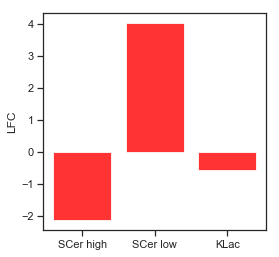

In [49]:
fig, ax = plt.subplots(figsize=(4,4))

sc_kl_mpc23_data = ohnologs_goi_kl_data[ohnologs_goi_kl_data['SC_common_name_low']=='MPC2'].loc[:,['log2FoldChange_low','log2FoldChange_high','log2FoldChange_KL']]

bar_width = 0.8
opacity = 0.8

ax.bar([0,1,2],sc_kl_mpc23_data.values[0], bar_width,
                             alpha=opacity,
                             color='red',
                             label='test') 
#                              #bottom = bottom)

#     if kk==2: 
#         ax.set_xlabel('Species')
ax.set_ylabel('LFC')
#     ax.set_ylim(-4,8)
#     ax.set_title(spec_set_name)
ax.set_xticks([0,1,2])
ax.set_xticklabels(['SCer high', 'SCer low', 'KLac'])

fig.savefig(os.path.normpath('C:/Users/BMH_work/Google Drive/UCSF/ElSamad_Lab/PKA/Manuscript/MPC23_LFC.svg'))


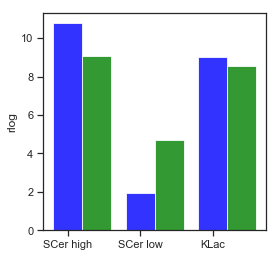

In [48]:
fig, ax = plt.subplots(figsize=(4,4))

bar_width = 0.4
opacity = 0.8
condition_mult = {'cont':0, 'drug': 1}
colors = {'cont': 'blue', 'drug': 'green'}
#Rlog values
sc_kl_mpc23_exp_data = {}
for condition in ['cont', 'drug']: 
    columns_to_view = ['AS_WT_' + condition + '_mean_' + spec_set  for spec_set in ['low', 'high', 'kl']]
    sc_kl_mpc23_exp_data[condition] = ohnologs_goi_rlog[ohnologs_goi_rlog['SC_common_name_low']=='MPC2'].loc[:,columns_to_view]
    
    ax.bar(np.array([0,1,2])+condition_mult[condition]*bar_width,
           sc_kl_mpc23_exp_data[condition].values[0], bar_width,
                 alpha=opacity,
                 color=colors[condition],
                 label=condition) 
    #                              #bottom = bottom)

#     if kk==2: 
#         ax.set_xlabel('Species')
ax.set_ylabel('rlog')
#     ax.set_ylim(-4,8)
#     ax.set_title(spec_set_name)
ax.set_xticks([0,1,2])
ax.set_xticklabels(['SCer high', 'SCer low', 'KLac'])
    
fig.savefig(os.path.normpath('C:/Users/BMH_work/Google Drive/UCSF/ElSamad_Lab/PKA/Manuscript/MPC23_rlog.svg'))


# Identify parameters for DEstress

<a id='destress_venn'></a>

In [16]:
# # Load S.Cer Deseq data
# pkainh_deseq = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_deseq_SC_AS_WT_nmpp1.csv'), index_col=0)

#Load ohnologs_expression_sorted:
#ohnologs_expression_sorted = pd.read_csv(data_processing_dir + os.path.normpath("kl_sc_PKA_as_m24_r1g1_20181017/20190812_ohnologs_expression_sorted.csv"), index_col=0)
ohnologs_expression_sorted_pka = pd.read_csv(data_processing_dir + os.path.normpath("kl_sc_PKA_as_m24_r1g1_20181017/20200607_ohnologs_expression_sorted.csv"), index_col=0)
ohnologs_dePKA = pd.read_csv(data_processing_dir + os.path.normpath("kl_sc_PKA_as_m24_r1g1_20181017/20200617_ohnologs_dePKA.csv"), index_col=0)


# #venn2([set(ohnologs_goi_pka.index),set(ohnologs_goi.index)])
# #venn2([set(ohnologs_expression_sorted_pka.index),set(ohnologs_sorted.index)], set_labels=['pka_inh', 'regev_data'])
# pka_not_regev = set(ohnologs_expression_sorted_pka.index)-set(ohnologs_sorted.index)
# regev_not_pka = set(ohnologs_sorted.index) - set(ohnologs_expression_sorted_pka.index)
# print('There are ' + str(len(pka_not_regev)) + ' genes in my RNA seq data that are not in the regev data. There are ' + 
#       str(len(regev_not_pka)) + ' genes in the regev data that are not in my RNA seq data')



100 differentially expressed genes identified
33 ohnolog pairs in regev set not in my set removed from regev set 
 7 ohnolog pairs in my set not in regev set removed from my set 
 4 ohnolog pairs in dePKA not in regev set removed from dePKA
The following pairs in dePKA were removed from the analysis
          SC_common_name_low SC_common_name_high
Ancestor                                        
Anc_6.348               EGO2                EGO4
Anc_3.267          YBR056W-A           YDR034W-B
Anc_1.188             HSP150                PIR3
Anc_5.173               LSO2                LSO1


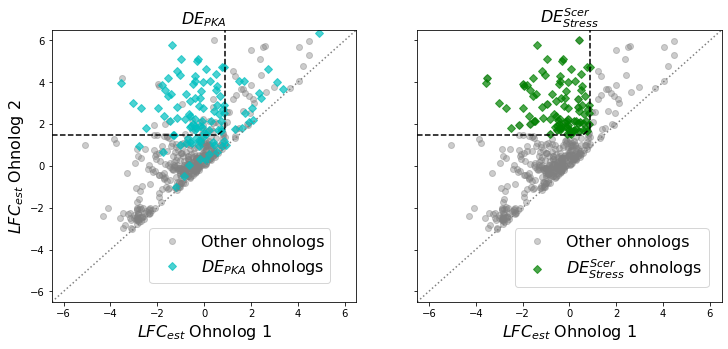

In [175]:
#plot dePKA onto sorted stress data

#This is a dummy condition to just get the full sorted dataset: 

spec = 'Scer'
columns_to_combine = {'PS/LOG', 'PLAT/LOG', 'DS/LOG', 'heat shock_30', 'heat shock_45'}

#Pick differentially expressed paralogs (using average / individual conditions)
min_high_lfc = 1.5  # Minimum LFC for the high activation paralog
lfc_diff = 0.9 # Difference in LFC to call a differentially expressed paralog
max_low_lfc = 0.9 # Maximum LFC that low activation paralog can have.  I get a ~20 more if I use 2.5 as the cutoff

goi_criteria = {'min_high_lfc': min_high_lfc, 'lfc_diff': lfc_diff, 'max_low_lfc' : max_low_lfc}

ohnologs_goi, ohnologs_sorted, goi_criteria = yeast_esr_exp.de_stress_gois(spec, columns_to_combine, goi_criteria)

#trims ohnologs sorted and ohnologs_sorted_pka to include only ohnolog pairs that are in both datasets

# pka_not_regev = set(ohnologs_expression_sorted_pka.index)-set(ohnologs_sorted.index)
# regev_not_pka = set(ohnologs_sorted.index) - set(ohnologs_expression_sorted_pka.index) 
  

ohnologs_sorted_trimmed = ohnologs_sorted.loc[(set(ohnologs_sorted.index)&(set(ohnologs_expression_sorted_pka.index)))]
ohnologs_expression_sorted_pka_trimmed = ohnologs_expression_sorted_pka.loc[(set(ohnologs_sorted.index)&(set(ohnologs_expression_sorted_pka.index)))]
ohnologs_dePKA_trimmed = ohnologs_dePKA.loc[(set(ohnologs_sorted.index)&(set(ohnologs_dePKA.index)))]
ohnologs_goi_trimmed = ohnologs_goi.loc[(set(ohnologs_sorted_trimmed.index)&(set(ohnologs_goi.index)))]

print("{} ohnolog pairs in regev set not in my set removed from regev set \n {} ohnolog pairs in my set not in regev set removed from my set \n {} ohnolog pairs in dePKA not in regev set removed from dePKA".format(len(ohnologs_sorted)-len(ohnologs_sorted_trimmed),
len(ohnologs_expression_sorted_pka)-len(ohnologs_expression_sorted_pka_trimmed),
len(ohnologs_dePKA) - len(ohnologs_dePKA_trimmed)))

#To inspect removed genes: 
pka_rem = ohnologs_dePKA.loc[set(ohnologs_dePKA.index)-set(ohnologs_dePKA_trimmed.index)].loc[:,['SC_common_name_low','SC_common_name_high']]
print("The following pairs in dePKA were removed from the analysis")
print(pka_rem)
#ohnologs_expression_sorted_pka.loc[set(ohnologs_expression_sorted_pka.index)-set(ohnologs_expression_sorted_pka_trimmed.index)]



fig, axarr = plt.subplots(1,2,figsize=(12,5), sharey=True)

xmax = 6.5
xmin = -xmax
ymax = xmax
ymin = xmin


#(highlight_set, subset, color)
highlight_sets = [('$DE_{PKA}$',ohnologs_sorted_trimmed.loc[ohnologs_dePKA_trimmed.index], 'c'),  
                  ('$DE_{Stress}^{Scer}$',ohnologs_goi_trimmed, 'g')]


for jj, (highlight_set_name, highlight_set, color) in enumerate(highlight_sets): 
    ax = axarr[jj]

    # label : (subset, marker, color, alpha, zorder)
    subsets = {'Other': (ohnologs_sorted_trimmed.loc[set(ohnologs_sorted_trimmed.index)-set(ohnologs_dePKA_trimmed.index)], 'grey',0.4, 'o', 0),
               highlight_set_name: (highlight_set, color,0.7,'D',1)
              }

    for label, (subset, color, alpha, marker, zorder) in subsets.items():
        ax.plot(subset['PKAest_low'], subset['PKAest_high'], label = label + ' ohnologs', color=color,  alpha = alpha, marker=marker, linestyle = '', zorder = zorder)

    #Lines that define my genes of interest
    #(x1, y1), (x2,y2)
    #line_ext = 0.5
    lines = {'Min LFC' : [(xmin, min_high_lfc), (min_high_lfc-lfc_diff,min_high_lfc)],
             'LFC_diff': [(min_high_lfc-lfc_diff,min_high_lfc),(max_low_lfc, max_low_lfc+lfc_diff)],
             'Max Low LFC' : [(max_low_lfc, max_low_lfc+lfc_diff),(max_low_lfc, ymax)]
    #          'Rep_boundary_horiz_max': [(xmin,max_lfc_rep), (max_lfc_rep,max_lfc_rep)],
    #          'Rep_boundary_vert_max': [(max_lfc_rep,ymin), (max_lfc_rep,max_lfc_rep)],
    #          'Rep_boundary_horiz_min': [(xmin,min_lfc_rep), (min_lfc_rep,min_lfc_rep)],
    #          'Rep_boundary_vert_min': [(min_lfc_rep,ymin), (min_lfc_rep,min_lfc_rep)]
            }


    for line_name, ((x1,y1),(x2,y2)) in lines.items():
        x = np.array([x1,x2])
        y = np.array([y1,y2])
        ax.plot(x,y,'--', color='black')

    #plot y=x
    ax.plot([xmin,xmax],[ymin,ymax], ':' , color='gray')

#    patches = []

#     #DEPKA patch
#     x=[xmin, xmin, weak_act, weak_act]
#     y=[ymax, strong_act, strong_act, ymax]
#     xy = zip(x,y)
#     polygon = Polygon(list(xy), closed=True, color = "#4d8cf2", alpha=0.2)
#     patches.append(polygon)
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    ax.set_xlabel('$LFC_{est}$ Ohnolog 1',fontdict={'size':16})
    if jj==0: 
        ax.set_ylabel('$LFC_{est}$ Ohnolog 2',fontdict={'size':16})
    ax.set_title(highlight_set_name,fontdict={'size':16})
    ax.legend(bbox_to_anchor=(0.32, 0.27), loc=2, borderaxespad=0., fontsize=16)



fig.savefig(figsave_dir + 'DEpka_DEstress_ohnolog_ohnolog.svg')





2.257537864502382e-32

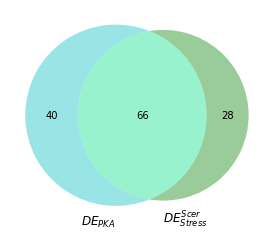

In [176]:
#Plot venn diagram using above parameters: 
fig, ax = plt.subplots()

venn2([set(ohnologs_dePKA_trimmed.index),set(ohnologs_goi_trimmed.index)], set_labels=['$DE_{PKA}$', '$DE_{Stress}^{Scer}$'], set_colors = ('c','g'), ax=ax)
fig.savefig(figsave_dir + 'DEpka_DEstress_overlap.svg')


#Fisher's exact test
DEpka_and_DEstress = len(set(ohnologs_dePKA_trimmed.index) & set(ohnologs_goi_trimmed.index))
DEpka_not_DEstress = len(set(ohnologs_dePKA_trimmed.index) - set(ohnologs_goi_trimmed.index))
DEstress_not_DEpka = len(set(ohnologs_goi_trimmed.index) - set(ohnologs_dePKA_trimmed.index))
orths_in_both_datasets = len(set(ohnologs_sorted.index) & set(ohnologs_expression_sorted_pka.index)) 

cont_matrix = [[DEpka_and_DEstress, DEpka_not_DEstress],[DEstress_not_DEpka, orths_in_both_datasets-(DEpka_and_DEstress+DEpka_not_DEstress+DEstress_not_DEpka)]]
oddsratio, pvalue = stats.fisher_exact(cont_matrix)
pvalue

In [9]:
# #Load GOI ohnolog data

# #fname = data_processing_dir + os.sep + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/gois_20181205.pkl')




# with open(fname, 'rb') as file:
#     [ohnologs_goi_pka,ohnologs_expression_sorted_pka,goi_criteria_pka] = pickle.load(file)
# ohnologs_goi_pka.set_index('Ancestor', inplace=True)
# ohnologs_expression_sorted_pka.set_index('Ancestor', inplace=True)

In [74]:
np.arange(0.9, 2.51, 0.2)

array([0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5])

In [135]:
#criteria to choose destress - looking for good overlap with DEpka, but destress not too big.  

spec = 'Scer'
columns_to_combine = {'PS/LOG', 'PLAT/LOG', 'DS/LOG', 'heat shock_30', 'heat shock_45'}

#Pick differentially expressed paralogs (using average / individual conditions)
lfc_diff = 0.9 # Difference in LFC to call a differentially expressed paralo

min_high_lfc_start = 0.9
min_high_lfc_stop = 2.5
min_high_lfcs = np.arange(min_high_lfc_start, min_high_lfc_stop+0.1, 0.2)
max_low_lfcs = np.linspace(0.5, 1.5, 21)

#iterate through min_high_lfc
cmap= plt.get_cmap('viridis')
de_stress_param_search={}

for min_high_lfc in min_high_lfcs: 
    label = '{:.1f}'.format(min_high_lfc)
    color = cmap((min_high_lfc_stop-min_high_lfc)/(min_high_lfc_stop-min_high_lfc_start))
    
    de_stress_sizes = []
    de_pka_de_stress_overlaps =[]
    for max_low_lfc in max_low_lfcs:
        goi_criteria = {'min_high_lfc': min_high_lfc, 'lfc_diff': lfc_diff, 'max_low_lfc' : max_low_lfc}
        ohnologs_goi, ohnologs_sorted, goi_criteria = yeast_esr_exp.de_stress_gois(spec, columns_to_combine, goi_criteria)

        ohnologs_goi_trimmed = ohnologs_goi.loc[(set(ohnologs_sorted_trimmed.index)&(set(ohnologs_goi.index)))]
        de_stress_sizes.append(len(ohnologs_goi_trimmed))
        de_pka_de_stress_overlaps.append(len((set(ohnologs_dePKA_trimmed.index) & set(ohnologs_goi_trimmed.index))))
    
    de_stress_param_search[label] = (min_high_lfc, color, de_stress_sizes, de_pka_de_stress_overlaps)

    



129 differentially expressed genes identified
132 differentially expressed genes identified
135 differentially expressed genes identified
137 differentially expressed genes identified
138 differentially expressed genes identified
141 differentially expressed genes identified
144 differentially expressed genes identified
145 differentially expressed genes identified
148 differentially expressed genes identified
148 differentially expressed genes identified
150 differentially expressed genes identified
150 differentially expressed genes identified
151 differentially expressed genes identified
151 differentially expressed genes identified
151 differentially expressed genes identified
153 differentially expressed genes identified
153 differentially expressed genes identified
154 differentially expressed genes identified
155 differentially expressed genes identified
155 differentially expressed genes identified
155 differentially expressed genes identified
110 differentially expressed genes

50 differentially expressed genes identified
50 differentially expressed genes identified
52 differentially expressed genes identified
52 differentially expressed genes identified
53 differentially expressed genes identified
54 differentially expressed genes identified
54 differentially expressed genes identified
54 differentially expressed genes identified


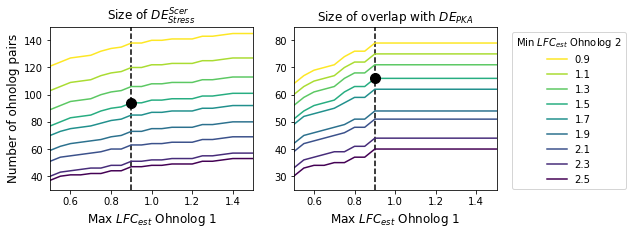

In [177]:
fig, axarr = plt.subplots(1,2, figsize=(8,3))

chosen_min_high_lfc = 1.5  # Minimum LFC for the high activation paralog
#lfc_diff = 0.9 # Difference in LFC to call a differentially expressed paralog
chosen_max_low_lfc = 0.9 # Maximum LFC that low activation paralog can have.  I get a ~20 more if I use 2.5 as the cutoff


for label, (min_high_lfc, color, de_stress_sizes, de_pka_de_stress_overlaps) in de_stress_param_search.items():
    plot_data = [de_stress_sizes,
                 de_pka_de_stress_overlaps]
    
    
    for jj, data in enumerate(plot_data):
        ax=axarr[jj]

        ax.plot(max_low_lfcs, data, color = color, label = label)
        



plot_titles = [('Size of $DE_{Stress}^{Scer}$', (30,150)), 
               ('Size of overlap with $DE_{PKA}$', (25, 85))]
for jj, (title, (ymin, ymax)) in enumerate(plot_titles): 
    ax = axarr[jj]
    ax.set_title(title)
    ax.set_xlabel('Max $LFC_{est}$ Ohnolog 1', fontdict={'size':12})
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(max_low_lfcs[0], max_low_lfcs[-1])
    
    #plot vertical line for max_low_lfc
    ax.vlines(chosen_max_low_lfc, ymin, ymax, linestyles = '--')
    
    #plot intersection on each plot with min_norm_lfc
    intersection = de_stress_param_search['{:.1f}'.format(chosen_min_high_lfc)][jj+2][int(np.argwhere(max_low_lfcs==chosen_max_low_lfc))]
    ax.plot(chosen_max_low_lfc, intersection, marker = 'o', markersize = 10, color = 'black')
    
    
    if jj==0: 
        ax.set_ylabel('Number of ohnolog pairs', fontdict={'size':12})
    

    if jj==1: 
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Min $LFC_{est}$ Ohnolog 2')

fig.savefig(figsave_dir + 'DEstress_param_choice.svg', bbox_inches='tight')


In [151]:
# Plot N of overlapping genes, and the overall size of DEstress as the parameter is varied

min_high_lfc = 1.3  # Minimum LFC for the high activation paralog
lfc_diff = 0.9 # Difference in LFC to call a differentially expressed paralog
max_low_lfc = 0.9 # Maximum LFC that low activation paralog can have.  I get a ~20 more if I use 2.5 as the cutoff



goi_criteria = {'min_high_lfc': min_high_lfc, 'lfc_diff': lfc_diff, 'max_low_lfc' : max_low_lfc}

ohnologs_goi, ohnologs_sorted, goi_criteria = yeast_esr_exp.de_stress_gois(spec, columns_to_combine, goi_criteria)

#ohnologs sorted should be static, but I am getting it from this parameter dependent function so this
#doesn't really need to be in a loop. 
pka_not_regev = set(ohnologs_expression_sorted_pka.index)-set(ohnologs_sorted.index)
regev_not_pka = set(ohnologs_sorted.index) - set(ohnologs_expression_sorted_pka.index) 
  
ohnologs_dePKA_trimmed = ohnologs_dePKA.loc[(set(ohnologs_dePKA.index) - pka_not_regev),:]
print('Trimmed ' + str(len(ohnologs_dePKA)-len(ohnologs_dePKA_trimmed)) + ' ohnolog pairs from pka goi')

ohnologs_goi_trimmed = ohnologs_goi.loc[(set(ohnologs_goi.index) - regev_not_pka),:]
print('Trimmed ' + str(len(ohnologs_goi)-len(ohnologs_goi_trimmed)) + ' ohnolog pairs from regev goi')

size_deStress_trimmed = len(ohnologs_goi_trimmed)
size_overlap = len((set(ohnologs_dePKA_trimmed.index) & set(ohnologs_goi_trimmed.index)))
#venn2([set(ohnologs_goi_pka_trimmed.index),set(ohnologs_goi_trimmed.index)], set_labels=['$DE_{PKA}$', '$DE_{stress}$'], set_colors = ('c','g'), ax=ax)

print("{} {} {}".format(len(ohnologs_dePKA_trimmed), size_overlap, size_deStress_trimmed)) 
    


114 differentially expressed genes identified
Trimmed 4 ohnolog pairs from pka goi
Trimmed 8 ohnolog pairs from regev goi
106 71 106


In [152]:
# spec = 'Scer'
# columns_to_combine = {'PS/LOG', 'PLAT/LOG', 'DS/LOG', 'heat shock_30', 'heat shock_45'}

# #Pick differentially expressed paralogs (using average / individual conditions)
# min_high_lfc = 1.8  # Minimum LFC for the high activation paralog
# lfc_diff = 1.8 # Difference in LFC to call a differentially expressed paralog
# max_low_lfc = 1.6 # Maximum LFC that low activation paralog can have.  I get a ~20 more if I use 2.5 as the cutoff

# goi_criteria = {'min_high_lfc': min_high_lfc, 'lfc_diff': lfc_diff, 'max_low_lfc' : max_low_lfc}

# ohnologs_goi, ohnologs_sorted, goi_criteria = yeast_esr_exp.de_stress_gois(spec, columns_to_combine, goi_criteria)



# #plt.scatter(ohnologs_sorted['PKAest_low'], ohnologs_sorted['PKAest_high'])


# # #Save list and all sorted ohnolog dataframe as well
# # fname = data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/gois_' + spec + '_PKAest_20190123.pkl')

# # with open(fname, 'wb') as file:
# #     pickle.dump([ohnologs_goi,ohnologs_sorted,goi_criteria], file)
                                          
# # ohnologs_goi

old text: Differentially expressed ohnologs were chosen according to four criteria: 
    1) The minimum fold change for the activated paralog was greater than high_min = 2.0. 
    2) The maximum fold change of the low paralog was less than low_max= 1.5. 
    3) There was a difference of at least diff_min= 2.0 in LFC between the high and low paralog

In [179]:
# #venn2([set(ohnologs_goi_pka.index),set(ohnologs_goi.index)])
# #venn2([set(ohnologs_expression_sorted_pka.index),set(ohnologs_sorted.index)], set_labels=['pka_inh', 'regev_data'])
# pka_not_regev = set(ohnologs_expression_sorted_pka.index)-set(ohnologs_sorted.index)
# regev_not_pka = set(ohnologs_sorted.index) - set(ohnologs_expression_sorted_pka.index)
# print('There are ' + str(len(pka_not_regev)) + ' genes in my RNA seq data that are not in the regev data. There are ' + 
#       str(len(regev_not_pka)) + ' genes in the regev data that are not in my RNA seq data')

In [178]:
# #Trim out data that isn't present in both datasets.  
# ohnologs_goi_pka_trimmed = ohnologs_goi_pka.loc[(set(ohnologs_goi_pka.index) - pka_not_regev),:]
# print('Trimmed ' + str(len(ohnologs_goi_pka)-len(ohnologs_goi_pka_trimmed)) + ' ohnolog pairs from pka goi')

# ohnologs_goi_trimmed = ohnologs_goi.loc[(set(ohnologs_goi.index) - regev_not_pka),:]
# print('Trimmed ' + str(len(ohnologs_goi)-len(ohnologs_goi_trimmed)) + ' ohnolog pairs from regev goi')

# fig, ax = plt.subplots()

# venn2([set(ohnologs_goi_pka_trimmed.index),set(ohnologs_goi_trimmed.index)], set_labels=['$DE_{PKA}$', '$DE_{stress}$'], set_colors = ('c','g'), ax=ax)
# fig.savefig(figsave_dir + 'DEpka_DEstress_overlap.svg')

In [181]:
# DEpka_and_DEstress = len(set(ohnologs_goi_pka_trimmed.index) & set(ohnologs_goi_trimmed.index))
# DEpka_not_DEstress = len(set(ohnologs_goi_pka_trimmed.index) - set(ohnologs_goi_trimmed.index))
# DEstress_not_DEpka = len(set(ohnologs_goi_trimmed.index) - set(ohnologs_goi_pka_trimmed.index))
# orths_in_both_datasets = len(set(ohnologs_sorted.index) & set(ohnologs_expression_sorted_pka.index)) 

# cont_matrix = [[DEpka_and_DEstress, DEpka_not_DEstress],[DEstress_not_DEpka, orths_in_both_datasets-(DEpka_and_DEstress+DEpka_not_DEstress+DEstress_not_DEpka)]]
# oddsratio, pvalue = stats.fisher_exact(cont_matrix)
# pvalue

In [182]:
# #superimpose goi from regev data onto lfc data in S.Cer

# #Separate into different groups: 

# spec = 'Scer'

# plot_subsets = {'all': ohnologs_expression_sorted_pka, 
#                 'DEpka': ohnologs_expression_sorted_pka.loc[ohnologs_goi_pka_trimmed.index,:],
#                 'DEstress_' + spec: ohnologs_expression_sorted_pka.loc[ohnologs_goi_trimmed.index,:]}


# params =  {'all': {'color':'grey', 'alpha': 0.3},
#            'DEpka': {'color':'red', 'alpha':0.4},
#            'DEstress_' + spec: {'color':'blue', 'alpha':0.4}
#           }
            


# data = []


                                 
# for subset_name, subset in plot_subsets.items():
                                 
#     trace = pygo.Scatter(
#                 x = subset['log2FoldChange_low'], #-np.log10(deseq_data['padj_pkainh']), #
#                 y = subset['log2FoldChange_high'] ,
#                 text = subset['SC_common_name_high'] + ' ' + subset.index,
#                 mode = 'markers',
#                 marker = {'opacity': params[subset_name]['alpha'],
#                           'color' : params[subset_name]['color'],
#                           #'colorscale' : 'Jet',
#                           #'showscale' : False}  #
#                          },
#                 name = subset_name
                
#                 )
        
#     data.append(trace)


# layout = pygo.Layout(
#     xaxis= {
#         #"range":[-2, 20],
#         "title":'LFC_low'
#     },
#     yaxis= {
#         #"range":[-2, 20],
#         "title":'LFC_high'
#     }
# )


# fig = pygo.Figure(data=data, layout = layout)
# py.iplot(fig, filename='PKA_vs_condition_DEstress_' + spec)

## Look from perspective of a number of specs

<a id='DEpka_spec_define'></a>

100 differentially expressed genes identified
Species is Smik, translating gene names from YGOB to regev
Smik_4.273 has no match in regev dataset
Smik_4.460 has no match in regev dataset
Smik_4.469 has no match in regev dataset
Smik_16.197 has no match in regev dataset
Smik_4.514 has no match in regev dataset
Smik_2.28 has no match in regev dataset
Smik_8.127 has no match in regev dataset
Smik_2.33 has no match in regev dataset
Smik_4.647 has no match in regev dataset
Smik_4.655 has multiple matches in regev dataset: 
['smik352-g1.1', 'smik600-g1.1']
Smik_4.688 has multiple matches in regev dataset: 
['smik202-g5.1', 'smik1292-g2.1']
Smik_2.43 has multiple matches in regev dataset: 
['smik620-g28.1', 'smik132-g21.1', 'smik1032-g20.1', 'smik1119-g2.1', 'smik1163-g1.1', 'smik1163-g1.1']
Smik_4.724 has no match in regev dataset
Smik_4.727 has no match in regev dataset
Smik_4.730 has no match in regev dataset
Smik_8.67 has no match in regev dataset
Smik_2.45 has multiple matches in regev d

problems with smik269-g7.1 and smik269-g7.1
problems with smik136-g2.1 and smik136-g2.1
problems with smik663-g16.1 and smik663-g16.1
problems with smik322-g7.1 and smik322-g7.1
problems with smik834-g18.1 and smik834-g18.1
problems with smik702-g21.1 and smik702-g21.1
problems with smik249-g3.1 and smik249-g3.1
problems with smik757-g1.1 and smik757-g1.1
problems with smik935-g9.1 and smik935-g9.1
problems with smik191-g2.1 and smik191-g2.1
problems with smik74-g4.1 and smik74-g4.1
47 differentially expressed genes identified
83 differentially expressed genes identified
Species is Ncas, translating gene names from YGOB to regev
NCAS0A14610 has multiple matches in regev dataset: 
['Scas672.8', 'Scas496.4']
NCAS0F02810 has no match in regev dataset
NCAS0A14560 has no match in regev dataset
NCAS0A11870 has multiple matches in regev dataset: 
['Scas632.10', 'Scas714.19']
NCAS0A11890 has multiple matches in regev dataset: 
['Scas632.12', 'Scas714.24']
NCAS0A12170 has multiple matches in re

problems with Scas673.6 and Scas673.6
problems with Scas622.7 and Scas622.7
problems with Scas574.5 and Scas574.5
problems with Scas686.17 and Scas686.17
problems with Scas601.3 and Scas601.3
69 differentially expressed genes identified
62 differentially expressed genes identified


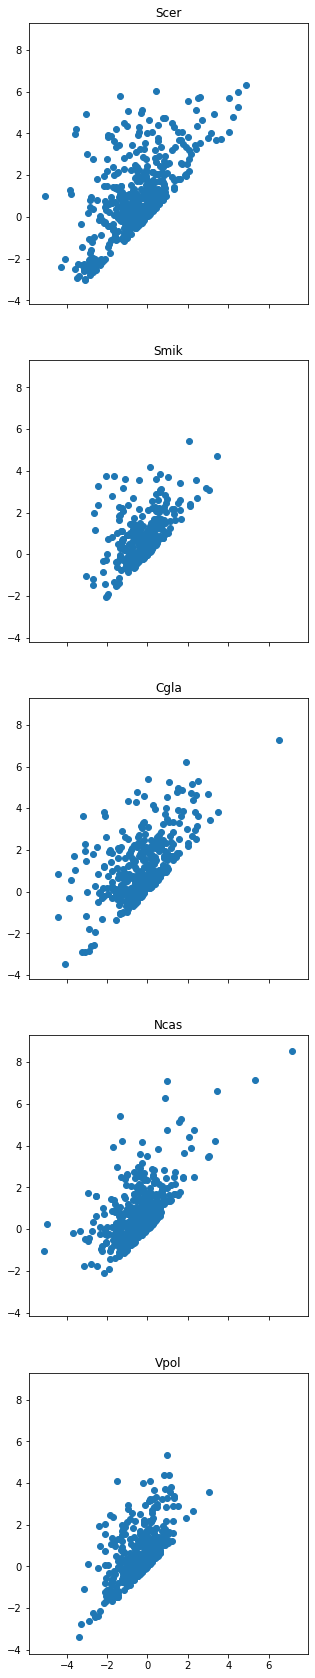

In [184]:
# seed_spec = 'Scer'
specs = ['Scer', 'Smik', 'Cgla', 'Ncas', 'Vpol']

fig, axarr = plt.subplots(5,1, sharex = True, sharey = True, figsize = (5, 30))
fig.subplots_adjust(hspace = 0.2)

#Identify DEstress genes
columns_to_combine = {'PS/LOG', 'PLAT/LOG', 'DS/LOG', 'heat shock_30', 'heat shock_45'}

#Pick differentially expressed paralogs (using average / individual conditions)
min_high_lfc = 1.5 #1.8  # Minimum LFC for the high activation paralog
lfc_diff = 0.9 #1.8 # Difference in LFC to call a differentially expressed paralog
max_low_lfc = 0.9 #1.6 # Maximum LFC that low activation paralog can have.  I get a ~20 more if I use 2.5 as the cutoff

goi_criteria = {'min_high_lfc': min_high_lfc, 'lfc_diff': lfc_diff, 'max_low_lfc' : max_low_lfc}

ohnologs_goi= {}
ohnologs_sorted = {}

for jj, seed_spec in enumerate(specs):
    ax = axarr[jj]
    ohnologs_goi_spec, ohnologs_sorted_spec, goi_criteria_spec = yeast_esr_exp.de_stress_gois(seed_spec, columns_to_combine, goi_criteria)

    ax.scatter(ohnologs_sorted_spec['PKAest_low'], ohnologs_sorted_spec['PKAest_high'])
    ax.set_title(seed_spec)
    
    ohnologs_goi[seed_spec] = ohnologs_goi_spec
    ohnologs_sorted[seed_spec] = ohnologs_sorted_spec
    
    #Save list and all sorted ohnolog dataframe as well
    fname = data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/gois_' + seed_spec + '_PKAest_20190624.pkl')

    with open(fname, 'wb') as file:
        pickle.dump([ohnologs_goi_spec,ohnologs_sorted_spec,goi_criteria_spec], file)

#Should figure out how to just read this data.  

### Venn Diagrams to determine overlap of ohnolog sets
<a id='DEpka_spec_overlap'></a>

In [ ]:
#Overlap for different species DE stress sets. 

NameError: name 'FisherExact' is not defined

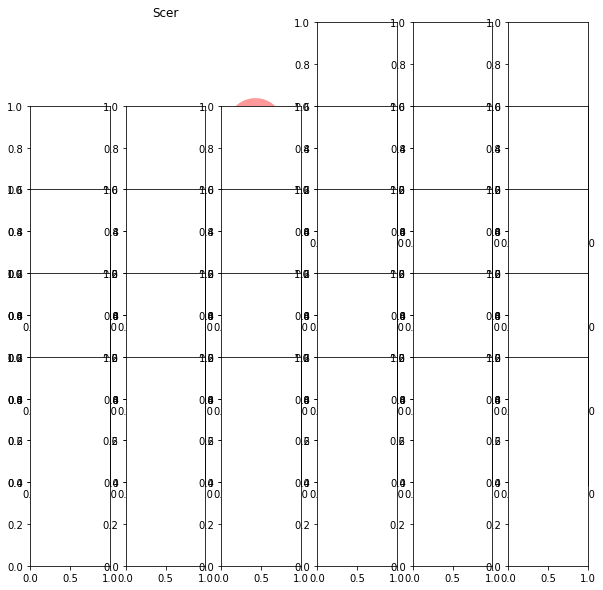

In [185]:
fig, axarr = plt.subplots(len(specs),len(specs)+1, figsize=(10,10))
fig.subplots_adjust(hspace = -0.6)
for jj, spec_jj in enumerate(specs):
    #print(spec_jj)
    for kk, spec_kk in enumerate(specs):
        #print(spec_kk)
        ax = axarr[jj,kk+1]
        if jj==kk: 
            ax.text(0.5, 0.5, str(len(ohnologs_goi[spec_jj])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
            ax.set_axis_off()
            #             ax.scatter(ohnologs_sorted[spec_jj]['PKAest_low'], ohnologs_sorted[spec_jj]['PKAest_high'], alpha =0.4)
#             #ax.set_title(spec_jj)
#             ax.set_xlim([-6,8])
#             ax.set_ylim([-6,8])
        else: 
            venn2([set(ohnologs_goi[spec_jj].index),set(ohnologs_goi[spec_kk].index)], set_labels=['',''], set_colors = ('r','g'), ax=ax)
            
            #Calculate and print pvalue
            #Fisher's exact test that overlap of DEstress set is different from overlap of all ohnologs
#             spec_jj = 'Scer'
#             spec_kk = 'Vpol'

            all_ohnologs_spec_kk_only = len(set(ohnologs_sorted[spec_kk].index) - set(ohnologs_sorted[spec_jj].index))
            all_ohnologs_spec_jj_only = len(set(ohnologs_sorted[spec_jj].index) - set(ohnologs_sorted[spec_kk].index))
            all_ohnologs_both = len(set(ohnologs_sorted[spec_jj].index) & set(ohnologs_sorted[spec_kk].index))

            DE_stress_kk_only = len(set(ohnologs_goi[spec_kk].index) - set(ohnologs_goi[spec_jj].index))
            DE_stress_jj_only = len(set(ohnologs_goi[spec_jj].index) - set(ohnologs_goi[spec_kk].index))
            DE_stress_both = len(set(ohnologs_goi[spec_kk].index) & set(ohnologs_goi[spec_jj].index))

            #Note there is some overlap between the rows, but I don't think that it necessitates changing the table.
            cont_table = [[all_ohnologs_spec_jj_only,
              all_ohnologs_spec_kk_only,
              all_ohnologs_both],
             [DE_stress_jj_only,
              DE_stress_kk_only,
              DE_stress_both]
            ]
            #print(cont_table)
            pval = FisherExact.fisher_exact(cont_table)
            ax.text(0.5, 0, '{:1.1e}'.format(pval), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        
        
        
        if jj ==0: 
            ax.set_title(spec_kk)
        if kk==0:
            ax = axarr[jj,kk]
            ax.text(0.5, 0.5, spec_jj, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
            ax.set_axis_off()
        
#fig.savefig(figsave_dir + 'DEstress_species_overlap.svg')





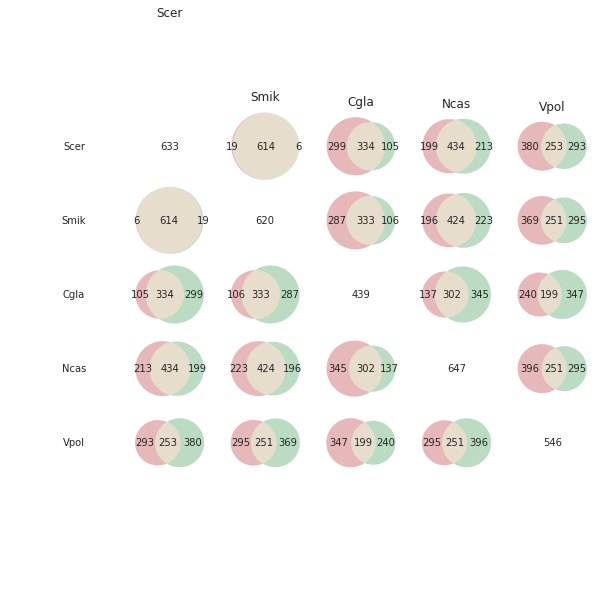

In [65]:
#Overlap of ohnologs (all from YGOB)
fig, axarr = plt.subplots(len(specs),len(specs)+1, figsize=(10,10))
fig.subplots_adjust(hspace = -0.7)
for jj, spec_jj in enumerate(specs):
    ohnologs_jj = yeast_esr_exp.get_WGH_pairs_by_spec(spec_jj)
    for kk, spec_kk in enumerate(specs):
        ax = axarr[jj,kk+1]
        if jj==kk: 
            ax.text(0.5, 0.5, str(len(ohnologs_jj)), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
            ax.set_axis_off()
            #             ax.scatter(ohnologs_sorted[spec_jj]['PKAest_low'], ohnologs_sorted[spec_jj]['PKAest_high'], alpha =0.4)
#             #ax.set_title(spec_jj)
#             ax.set_xlim([-6,8])
#             ax.set_ylim([-6,8])
        else: 
            ohnologs_kk = yeast_esr_exp.get_WGH_pairs_by_spec(spec_kk)
            venn2([set(ohnologs_jj.index),set(ohnologs_kk.index)], set_labels=['',''], set_colors=('r','g'), ax=ax)
        if jj ==0: 
            ax.set_title(spec_kk)
        if kk==0:
            ax = axarr[jj,kk]
            ax.text(0.5, 0.5, spec_jj, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
            ax.set_axis_off()
        
fig.savefig(figsave_dir + 'species_overlap_all.svg')

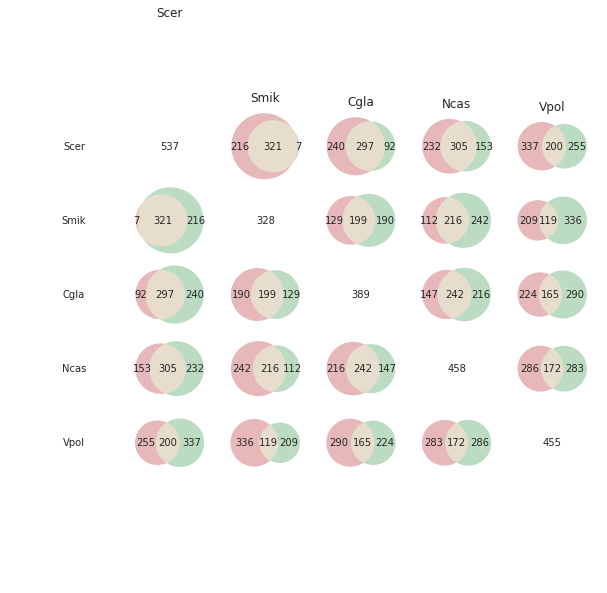

In [116]:
#Overlap of ohnologs (with data from regev lab)
fig, axarr = plt.subplots(len(specs),len(specs)+1, figsize=(10,10))
fig.subplots_adjust(hspace = -0.7)
for jj, spec_jj in enumerate(specs):
    for kk, spec_kk in enumerate(specs):
        ax = axarr[jj,kk+1]
        if jj==kk: 
            ax.text(0.5, 0.5, str(len(ohnologs_sorted[spec_jj])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
            ax.set_axis_off()
            #             ax.scatter(ohnologs_sorted[spec_jj]['PKAest_low'], ohnologs_sorted[spec_jj]['PKAest_high'], alpha =0.4)
#             #ax.set_title(spec_jj)
#             ax.set_xlim([-6,8])
#             ax.set_ylim([-6,8])
        else: 
            venn2([set(ohnologs_sorted[spec_jj].index),set(ohnologs_sorted[spec_kk].index)], set_labels = ['',''], ax=ax)
        if jj ==0: 
            ax.set_title(spec_kk)
        if kk==0:
            ax = axarr[jj,kk]
            ax.text(0.5, 0.5, spec_jj, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
            ax.set_axis_off()
        
fig.savefig(figsave_dir + 'species_overlap_regev.svg')

In [117]:
#what are the seven that overlap for Vpol
ohnologs_goi_scer_vpol = ohnologs_goi_scer.loc[set(ohnologs_goi_vpol.index)&set(ohnologs_goi_scer.index), ['genename_low', 'genename_high']]
for level in ['low','high']: 
    ohnologs_goi_scer_vpol['SC_common_name_' + level] = yeast_esr_exp.SC_common_name_lookup(ohnologs_goi_scer_vpol['genename_'+level])

ohnologs_goi_scer_vpol.loc[:,['SC_common_name_low','SC_common_name_high']]

,SC_common_name_low,SC_common_name_high
anc,,
Anc_3.372,TKL1,TKL2
Anc_5.396,HXT3,HXT5
Anc_2.445,PGM1,PGM2
Anc_2.418,ADE16,ADE17
Anc_2.113,YHR131C,YNL144C
Anc_7.69,FRT1,FRT2
Anc_3.244,CST26,YDR018C


### Expression changes

<a id='conservation_LFC_perspectives'></a>

In [105]:

#Map Regev data onto dataframe

seed_spec = 'Vpol'
sort_columns = 'PKAest'

orth_dir_YGOB = os.path.normpath(data_processing_dir + 'ortholog_files_YGOB') + os.sep
orth_dir_regev = os.path.normpath(data_processing_dir + 'ortholog_files_regev') + os.sep

orth_dir_dict = {'Vpol':orth_dir_YGOB, 'Ncas': orth_dir_regev, 'Scer':orth_dir_YGOB}


spec_order_post_WGH_dict = {'Vpol': ['Ncas','Cgla','Smik','Scer'],
                            'Ncas': ['Cgla', 'Smik','Scer', 'Vpol'], 
                            'Scer': ['Smik', 'Cgla', 'Ncas','Vpol']}

# removed Spar - not in pillars and very close to S.Cer, 
#Suva doesn't have much data, Sbay is a hybrid so a bit strange

spec_order_pre_WGH_dict = {'Vpol': ['Klac','Lwal','Lklu','Calb', 'Ylip','Sjap','Spom'], 
                           'Ncas': ['Klac','Lwal','Lklu','Calb', 'Ylip','Sjap','Spom'] , 
                           'Scer': ['Klac','Lwal','Lklu','Calb', 'Ylip','Sjap','Spom'] } 

#Order that we view the species (minus seed_spec)
spec_order_post_WGH = spec_order_post_WGH_dict[seed_spec] 
spec_order_pre_WGH = spec_order_pre_WGH_dict[seed_spec]   
#removed Dhan, something seems to be wrong with the indices.  

ohnologs_goi_array, spec_conditions = yeast_esr_exp.load_regev_data_gois(ohnologs_goi[seed_spec], sort_column, seed_spec, spec_order_post_WGH, spec_order_pre_WGH)

#Add SC_common_name_high, low and high_low columns to an ohnologs_file
#SC_common_name lookup function requires genename_low/high columns
for level in ['low', 'high']: 
    ohnologs_goi_array['genename_' + level] = ohnologs_goi_array[seed_spec + '_genename_' + level]



ohnologs_goi_array = yeast_esr_exp.SC_common_name_columns_ohnologs(ohnologs_goi_array, seed_spec, orth_dir_dict[seed_spec])

# ohnologs_goi.reset_index(inplace=True)
# ohnologs_goi.set_index('SC_common_name_high_low', inplace=True)


Kpol_1036.28 has NONE listed in ortholog file for Ncas
Kpol_1062.12 has NONE listed in ortholog file for Ncas
Kpol_1028.90 has NONE listed in ortholog file for Ncas
Kpol_359.12 has NONE listed in ortholog file for Ncas
Kpol_1002.123 has NONE listed in ortholog file for Ncas
Kpol_1064.4 has NONE listed in ortholog file for Ncas
Kpol_1018.36 has NONE listed in ortholog file for Ncas
Kpol_182.4 has NONE listed in ortholog file for Ncas
Kpol_303.6 has NONE listed in ortholog file for Ncas
Kpol_1032.4 has NONE listed in ortholog file for Ncas
Kpol_1025.22 has NONE listed in ortholog file for Ncas
Kpol_1023.98 has NONE listed in ortholog file for Ncas
Kpol_479.17 has NONE listed in ortholog file for Ncas
Kpol_1023.61 has NONE listed in ortholog file for Ncas
Kpol_1037.61 has NONE listed in ortholog file for Ncas
Kpol_448.7 has NONE listed in ortholog file for Ncas
Kpol_1036.95 has NONE listed in ortholog file for Ncas
Kpol_1048.72 has NONE listed in ortholog file for Ncas
Kpol_1018.167 has N

Kpol_1036.28 has NONE listed in ortholog file for Smik
Kpol_1062.12 has NONE listed in ortholog file for Smik
Kpol_1064.4 has NONE listed in ortholog file for Smik
Kpol_1018.36 has NONE listed in ortholog file for Smik
Kpol_397.7 has NONE listed in ortholog file for Smik
Kpol_530.17 has NONE listed in ortholog file for Smik
Kpol_1035.6 has NONE listed in ortholog file for Smik
Kpol_1041.26 has NONE listed in ortholog file for Smik
Kpol_182.4 has NONE listed in ortholog file for Smik
Kpol_1020.28 has NONE listed in ortholog file for Smik
Kpol_303.6 has NONE listed in ortholog file for Smik
Kpol_1032.4 has NONE listed in ortholog file for Smik
Kpol_1025.22 has NONE listed in ortholog file for Smik
Kpol_1026.22 has NONE listed in ortholog file for Smik
Kpol_401.4 has NONE listed in ortholog file for Smik
Kpol_1062.24 has NONE listed in ortholog file for Smik
Kpol_440.4 has NONE listed in ortholog file for Smik
Kpol_1023.98 has NONE listed in ortholog file for Smik
Kpol_479.17 has NONE lis

Kpol_1062.12 has NONE listed in ortholog file for Spom
Kpol_1028.90 has NONE listed in ortholog file for Spom
Kpol_295.5 has NONE listed in ortholog file for Spom
Kpol_359.12 has NONE listed in ortholog file for Spom
Kpol_365.10 has NONE listed in ortholog file for Spom
Kpol_1027.16 has NONE listed in ortholog file for Spom
Kpol_1061.1 has NONE listed in ortholog file for Spom
Kpol_1002.123 has NONE listed in ortholog file for Spom
Kpol_367.5 has NONE listed in ortholog file for Spom
Kpol_1031.26 has NONE listed in ortholog file for Spom
Kpol_530.17 has NONE listed in ortholog file for Spom
Kpol_1033.62 has NONE listed in ortholog file for Spom
Kpol_1041.26 has NONE listed in ortholog file for Spom
Kpol_1040.9 has NONE listed in ortholog file for Spom
Kpol_513.17 has NONE listed in ortholog file for Spom
Kpol_400.2 has NONE listed in ortholog file for Spom
Kpol_182.4 has NONE listed in ortholog file for Spom
Kpol_1020.28 has NONE listed in ortholog file for Spom
Kpol_367.10 has NONE li

In [106]:
#Go through each of my GOIs and replace lists with single value for each item. 
#This is mainly to combine any values for genes that had a small scale duplication. 

# spec_order_post_WGH = ['Spar','Sbay','Smik','Suva', 'Cgla', 'Ncas','Vpol']
# spec_order_pre_WGH = ['Klac','Lwal','Lklu','Dhan', 'Calb', 'Ylip','Sjap','Spom']

spec_sets = {'Post WGH low' : [seed_spec] + spec_order_post_WGH, 
             'Post WGH high' : [seed_spec] + spec_order_post_WGH, 
             'Pre WGH' : spec_order_pre_WGH} 

expression_data_df = yeast_esr_exp.regev_ohnolog_expression_data_SSD_combine(ohnologs_goi_array,  spec_sets, spec_conditions, combine_method = 'mean')


In [ ]:
# Could sort but I don't think it is necessary unless I'm showing a heatmap

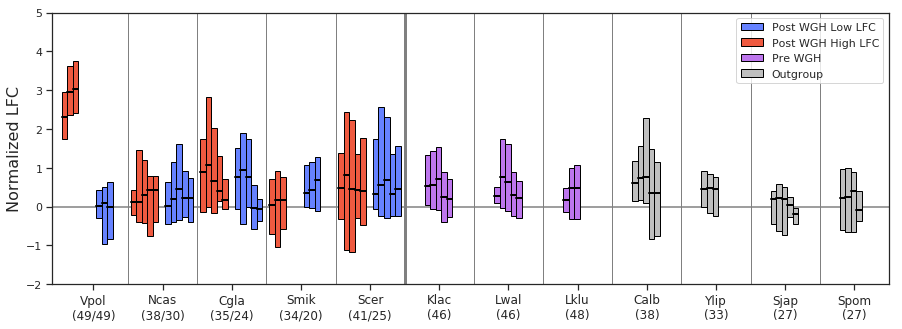

In [107]:
#Plot All
#Plot mean and variance of gene expression for each species 
#add text for total number of orthologs? 

fig_induction, ax_induction = plt.subplots(figsize=(15,5))
bw = 0.08
margin = 0.04
opacity = 0.8


# spec_sets = {'Post WGH low' : [seed_spec] + spec_order_post_WGH, 
#              'Post WGH high' : [seed_spec] + spec_order_post_WGH, 
#              'Pre WGH' : spec_order_pre_WGH}

spec_sets = {'Post WGH low' : [seed_spec] + spec_order_post_WGH, 
             'Post WGH high' : [seed_spec] + spec_order_post_WGH, 
             'Pre WGH' : ['Klac','Lwal', 'Lklu'],
             'Outgroup' : ['Calb','Ylip','Sjap','Spom']
             } 
#a8d6f4
colors = {'low': '#6682ff', 'high':'#ef5a40', 'Pre WGH': '#bd76ed', 'Outgroup':'#bfbfbf'}
legend_label_dict = {'low': 'Post WGH Low LFC', 
                 'high': 'Post WGH High LFC', 
                 'Pre WGH': 'Pre WGH', 
                 'Outgroup': 'Outgroup'}
index = {'low':[],'high':[], 'Pre WGH':[], 'Outgroup':[]}
data_mean = {'low':[],'high':[], 'Pre WGH':[], 'Outgroup':[]}
data_std = {'low':[],'high':[], 'Pre WGH':[], 'Outgroup':[]}
data_N = {'low':{},
          'high':{}, 
          'Pre WGH':{},
          'Outgroup':{}
         }
data = {'low':[],'high':[], 'Pre WGH':[], 'Outgroup': []}
level_space = {'high':0.0, 'low':0.5}
label_order = []
label_ind = []

# colors = {'low': '#a8d6f4', 'high':'#ef5a40', 'Pre WGH': '#bd76ed'}
# legend_label_dict = {'low': 'Post WGH low-induction', 
#                  'high': 'Post WGH high-induction', 
#                  'Pre WGH': 'Pre WGH'}
# index = {'low':[],'high':[], 'Pre WGH':[]}
# data_mean = {'low':[],'high':[], 'Pre WGH':[]}
# data_std = {'low':[],'high':[], 'Pre WGH':[]}
# data_N = {'low':{},
#           'high':{}, 
#           'Pre WGH':{}}
# data = {'low':[],'high':[], 'Pre WGH':[]}
# level_space = {'low':0.0, 'high':0.5}
# label_order = []
# label_ind = []

conds_pka_corr = ['DS/LOG', 'PS/LOG', 'PLAT/LOG','heat shock_030', 'heat shock_045']



all_conds = set(expression_data_df.columns)


#Post WGH Species
#assumes the same species sets are in both
jj = 0
spacer = bw/2 + margin
for spec in spec_sets['Post WGH high']: 
    for level in ['low','high']:
        data_N[level][spec]=np.inf 
    label_ind.append(jj+0.5)
    for kk, cond_base in enumerate(conds_pka_corr): 
        if spec + '_' + cond_base + '_high' in all_conds: 
            for level in ['low', 'high']:
                index[level].append(spacer + jj+bw*kk +level_space[level])
                column = expression_data_df[spec + '_' + cond_base + '_' + level]
                data[level].append(column[~column.isna()])
                #data_mean[level].append(column.mean())
                #data_std[level].append(column.std())
                N_spec_cond = sum(~(np.isnan(column)))
                N_spec_old = data_N[level][spec]
                data_N[level][spec] = min(N_spec_old, N_spec_cond)
    label_order.append(spec + '\n(' + str(data_N['low'][spec]) + '/' + str(data_N['high'][spec]) + ')')  
    jj = jj+1

#pre WGH Species
#assumes the same species sets are in both
for spec_set in ['Pre WGH', 'Outgroup']:
    for spec in spec_sets[spec_set]: 
        data_N[spec_set][spec]=np.inf
        label_ind.append(jj+0.5)    
        for kk, cond_base in enumerate(conds_pka_corr): 
            if spec + '_' + cond_base in all_conds: 
                index[spec_set].append(spacer + 0.25 + jj+bw*kk)
                column = expression_data_df[spec + '_' + cond_base]
                data[spec_set].append(column[~column.isna()])
                #data_mean['Pre WGH'].append(column.mean())
                #data_std['Pre WGH'].append(column.std())
                N_spec_cond = sum(~(np.isnan(column)))
                N_spec_old = data_N[spec_set][spec]
                data_N[spec_set][spec] = min(N_spec_old, N_spec_cond)   
        label_order.append(spec + '\n(' + str(data_N[spec_set][spec]) + ')')    
        jj = jj+1
    

legend_handles = []
legend_labels = []
for subset_name in ['low', 'high', 'Pre WGH', 'Outgroup']: 
    
    subset_data = data[subset_name]
    
    induction_bp = ax_induction.boxplot(subset_data, patch_artist=True, showfliers=False, 
                                          positions = index[subset_name], 
                                          widths = bw, 
                                          whis = 0.0
                                       )
    jj = 0
    for patch in induction_bp['boxes']:
        patch.set(facecolor=colors[subset_name])  
        if jj == 0: 
            legend_handles.append(patch)
        jj = jj+1
        
    plt.setp(induction_bp['medians'], color='black', linewidth=2.0)
    
    legend_labels.append(legend_label_dict[subset_name])
    
#     induction_plot = ax_induction.bar(index[subset_name],subset_data, bw,
#                  alpha=opacity,
#                  color=colors[subset_name],
#                  label=legend_labels[subset_name], 
#                  yerr = data_std[subset_name]) 
#                  #bottom = bottom)

ymax = 5.0
ymin = -2.0
ax_induction.vlines([len(spec_sets['Post WGH high'])], ymin = ymin, ymax = ymax, colors = 'gray',linewidth=3)
ax_induction.vlines(list(range(len(spec_sets['Post WGH high']) + len(spec_sets['Pre WGH'])+len(spec_sets['Outgroup'])))[1:], ymin=ymin, ymax = ymax, colors = 'gray', linewidth = 1)
ax_induction.set_xticklabels(label_order, fontdict={'size': 12})
ax_induction.set_xlim(0, len(spec_sets['Post WGH high']) + len(spec_sets['Pre WGH'])+len(spec_sets['Outgroup']))
ax_induction.set_xticks(label_ind)
ax_induction.set_ylim(ymin,ymax)
ax_induction.set_xlim(-0.1, len(label_ind))
ax_induction.plot((-0.1,len(label_ind)),(0,0), color='grey')
ax_induction.set_ylabel('Normalized LFC', fontdict={'size': 16})
ax_induction.legend(legend_handles, legend_labels )

fig_induction.savefig(figsave_dir + 'conservation_induction_' + seed_spec + '.svg')

### Look at raw expression from a number of specs 

<a id='conservation_raw_exp_perspectives'></a>


In [123]:
# given genes of interest load raw expression data 
# need to have ohnologs_goi loaded

seed_spec = 'Scer'
sort_column = 'PKAest'


spec_order_post_WGH_dict = {'Ncas': ['Cgla', 'Smik','Spar','Scer'], 
                            'Scer': ['Spar','Smik', 'Cgla', 'Ncas']}

spec_order_pre_WGH_dict = {'Ncas': ['Klac','Lwal','Lklu','Calb', 'Ylip'], 
                           'Scer': ['Klac','Lwal','Lklu','Calb', 'Ylip']} 

spec_order_post_WGH =  spec_order_post_WGH_dict[seed_spec]
#Suva doesn't have much data, Sbay is a hybrid so a bit strange
spec_order_pre_WGH = spec_order_pre_WGH_dict[seed_spec]

#C.Gla mapping for Sec14 seems better with orthogroups than YGOB

ohnologs_goi_array = yeast_esr_exp.load_tsankov_data_gois(ohnologs_goi[seed_spec], sort_column, seed_spec, spec_order_post_WGH, spec_order_pre_WGH)

#Add SC_common_name_high, low and high_low columns to an ohnologs_file
#SC_common_name lookup function requires genename_low/high columns
for level in ['low', 'high']: 
    ohnologs_goi_array['genename_' + level] = ohnologs_goi_array[seed_spec + '_genename_' + level]
ohnologs_goi_array = yeast_esr_exp.SC_common_name_columns_ohnologs(ohnologs_goi_array, seed_spec, orth_dir_dict[seed_spec])


CAGL0D02640g has no entry in Tsankov dataset for Cgla. Ortholog of YHR092C
CAGL0D02640g has no entry in Tsankov dataset for Cgla. Ortholog of YHR094C
CAGL0D02640g has no entry in Tsankov dataset for Cgla. Ortholog of YGL104C
CAGL0D02640g has no entry in Tsankov dataset for Cgla. Ortholog of YDR342C
CAGL0D02640g has no entry in Tsankov dataset for Cgla. Ortholog of YHR096C
YHR108W is not in orthogroup index Ncas
YFL048C is not in orthogroup index Ncas
YOL024W is not in orthogroup index Ncas
YLR371W is not in orthogroup index Ncas
YLR293C is not in orthogroup index Ncas
YIR037W is not in orthogroup index Ncas
YOR375C is not in orthogroup index Ncas
YER119C is not in orthogroup index Ncas
YHR097C is not in orthogroup index Ncas
YPL200W is not in orthogroup index Ncas
YGR256W is not in orthogroup index Ncas
YNL055C is not in orthogroup index Ncas
YIL113W is not in orthogroup index Ncas
YMR085W is not in orthogroup index Ncas
YKL091C is not in orthogroup index Ncas
YML087C is not in orthogr

In [124]:
#Go through each of my GOIs and make a vector.
#If there are no orthologs, set the value to np.Nan
#If there is an unexpected duplicate gene set the value to the mean expression between the two

# spec_order_post_WGH = ['Spar','Smik','Sbay', 'Cgla', 'Ncas']
# spec_order_pre_WGH = ['Klac','Lwal','Lklu','Dhan', 'Calb', 'Ylip']

spec_sets = {'Post WGH low' : [seed_spec] + spec_order_post_WGH, 
             'Post WGH high' : [seed_spec] + spec_order_post_WGH, 
             'Pre WGH' : spec_order_pre_WGH} 

raw_expression_data_df = yeast_esr_exp.tsankov_ohnolog_expression_data_SSD_combine(ohnologs_goi_array, spec_sets, combine_method = 'mean')
  


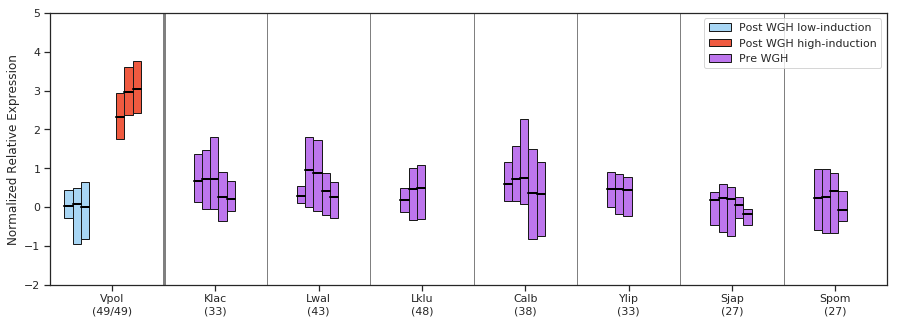

In [231]:
#Plot mean and variance of gene expression for each species 
#add text for total number of orthologs? 

fig_induction, ax_induction = plt.subplots(figsize=(15,5))
bw = 0.08
margin = 0.04
opacity = 0.8

spec_sets = {'Post WGH low' : ['Vpol'] , 
             'Post WGH high' : ['Vpol'] , 
             'Pre WGH' : spec_order_pre_WGH} 

colors = {'low': '#a8d6f4', 'high':'#ef5a40', 'Pre WGH': '#bd76ed'}
legend_label_dict = {'low': 'Post WGH low-induction', 
                 'high': 'Post WGH high-induction', 
                 'Pre WGH': 'Pre WGH'}
index = {'low':[],'high':[], 'Pre WGH':[]}
data_mean = {'low':[],'high':[], 'Pre WGH':[]}
data_std = {'low':[],'high':[], 'Pre WGH':[]}
data_N = {'low':{},
          'high':{}, 
          'Pre WGH':{}}
data = {'low':[],'high':[], 'Pre WGH':[]}
level_space = {'low':0.0, 'high':0.5}
label_order = []
label_ind = []

conds_pka_corr = ['DS/LOG', 'PS/LOG', 'PLAT/LOG','heat shock_030', 'heat shock_045']



all_conds = set(expression_data_df.columns)


#Post WGH Species
#assumes the same species sets are in both
jj = 0
spacer = bw/2 + margin
for spec in spec_sets['Post WGH high']: 
    for level in ['low','high']:
        data_N[level][spec]=np.inf 
    label_ind.append(jj+0.5)
    for kk, cond_base in enumerate(conds_pka_corr): 
        if spec + '_' + cond_base + '_high' in all_conds: 
            for level in ['low', 'high']:
                index[level].append(spacer + jj+bw*kk +level_space[level])
                column = expression_data_df[spec + '_' + cond_base + '_' + level]
                data[level].append(column[~column.isna()])
                #data_mean[level].append(column.mean())
                #data_std[level].append(column.std())
                N_spec_cond = sum(~(np.isnan(column)))
                N_spec_old = data_N[level][spec]
                data_N[level][spec] = min(N_spec_old, N_spec_cond)
    label_order.append(spec + '\n(' + str(data_N['low'][spec]) + '/' + str(data_N['high'][spec]) + ')')  
    jj = jj+1

#pre WGH Species
#assumes the same species sets are in both
for spec in spec_sets['Pre WGH']: 
    data_N['Pre WGH'][spec]=np.inf
    label_ind.append(jj+0.5)    
    for kk, cond_base in enumerate(conds_pka_corr): 
        if spec + '_' + cond_base in all_conds: 
            index['Pre WGH'].append(spacer + 0.25 + jj+bw*kk)
            column = expression_data_df[spec + '_' + cond_base]
            data['Pre WGH'].append(column[~column.isna()])
            #data_mean['Pre WGH'].append(column.mean())
            #data_std['Pre WGH'].append(column.std())
            N_spec_cond = sum(~(np.isnan(column)))
            N_spec_old = data_N['Pre WGH'][spec]
            data_N['Pre WGH'][spec] = min(N_spec_old, N_spec_cond)   
    label_order.append(spec + '\n(' + str(data_N['Pre WGH'][spec]) + ')')    
    jj = jj+1
    

legend_handles = []
legend_labels = []
for subset_name in ['low', 'high', 'Pre WGH']: 
    
    subset_data = data[subset_name]
    
    induction_bp = ax_induction.boxplot(subset_data, patch_artist=True, showfliers=False, 
                                          positions = index[subset_name], 
                                          widths = bw, 
                                          whis = 0.0
                                       )
    jj = 0
    for patch in induction_bp['boxes']:
        patch.set(facecolor=colors[subset_name])  
        if jj == 0: 
            legend_handles.append(patch)
        jj = jj+1
        
    plt.setp(induction_bp['medians'], color='black', linewidth=2.0)
    
    legend_labels.append(legend_label_dict[subset_name])
    
#     induction_plot = ax_induction.bar(index[subset_name],subset_data, bw,
#                  alpha=opacity,
#                  color=colors[subset_name],
#                  label=legend_labels[subset_name], 
#                  yerr = data_std[subset_name]) 
#                  #bottom = bottom)

ymax = 5.0
ymin = -2.0
ax_induction.vlines([len(spec_sets['Post WGH high'])], ymin = ymin, ymax = ymax, colors = 'gray',linewidth=3)
ax_induction.vlines(list(range(len(spec_sets['Post WGH high']) + len(spec_sets['Pre WGH'])))[1:], ymin=ymin, ymax = ymax, colors = 'gray', linewidth = 1)
ax_induction.set_xticklabels(label_order)
ax_induction.set_xlim(0, len(spec_sets['Post WGH high']) + len(spec_sets['Pre WGH']))
ax_induction.set_xticks(label_ind)
ax_induction.set_ylim(ymin,ymax)
ax_induction.set_xlim(-0.1, len(label_ind))
ax_induction.set_ylabel('Normalized Relative Expression')
ax_induction.legend(legend_handles, legend_labels )

#fig_induction.savefig(os.path.normpath('/home/heineike/scratch/induction_conservation_summary.svg'))

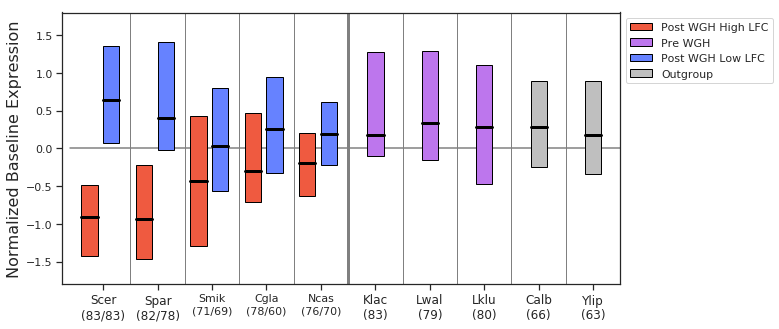

In [125]:
#Colors of Bars
#Labels
#Line

#Plot mean and variance of raw expressionfor each species 
#add text for total number of orthologs? 

fig_raw_exp_summary, ax_raw_exp_summary = plt.subplots(figsize=(10,5))
bw = 0.3
margin = 0.1
spacer = bw/2 + margin
opacity = 0.8

# spec_order_post_WGH = ['Spar','Smik','Sbay', 'Cgla', 'Ncas']
# spec_order_pre_WGH = ['Klac','Lwal','Lklu','Dhan', 'Calb', 'Ylip']


spec_sets = {'Post WGH low' : [seed_spec] + spec_order_post_WGH, 
             'Post WGH high' : [seed_spec] + spec_order_post_WGH, 
             'Pre WGH' : ['Klac','Lwal', 'Lklu'],
             'Outgroup' : ['Calb','Ylip']
             } 
#a8d6f4
colors = {'low': '#6682ff', 'high':'#ef5a40', 'Pre WGH': '#bd76ed', 'Outgroup':'#bfbfbf'}
legend_label_dict = {'low': 'Post WGH Low LFC', 
                 'high': 'Post WGH High LFC', 
                 'Pre WGH': 'Pre WGH', 
                 'Outgroup': 'Outgroup'}
index = {'low':[],'high':[], 'Pre WGH':[], 'Outgroup':[]}
data_N = {'low':{},
          'high':{}, 
          'Pre WGH':{},
          'Outgroup':{}
         }
data = {'low':[],'high':[], 'Pre WGH':[], 'Outgroup': []}
level_space = {'high':0.0, 'low':0.5-margin}
label_order = []
label_ind = []

# spec_sets = {'Post WGH low' : [seed_spec] + spec_order_post_WGH, 
#              'Post WGH high' : [seed_spec] + spec_order_post_WGH, 
#              'Pre WGH' : spec_order_pre_WGH} 

# colors = {'low': '#a8d6f4', 'high':'#ef5a40', 'Pre WGH': '#bd76ed'}
# legend_label_dict = {'low': 'Post WGH low-induction', 
#                  'high': 'Post WGH high-induction', 
#                  'Pre WGH': 'Pre WGH'}
# index = {'low':[],'high':[], 'Pre WGH':[]}
# data_mean = {'low':[],'high':[], 'Pre WGH':[]}
# data_std = {'low':[],'high':[], 'Pre WGH':[]}
# data_N = {'low':{},
#           'high':{}, 
#           'Pre WGH':{}}
# data = {'low':[],'high':[], 'Pre WGH':[]}
# level_space = {'low':0.0, 'high': 0.5-margin}
# label_order = []
# label_ind = []

#all_conds = set(expression_data_df_pka_corr.columns)


#Post WGH Species
#assumes the same species sets are in both
jj = 0
for spec in spec_sets['Post WGH high']: 
    for level in ['low','high']:
        data_N[level][spec]=np.inf 
    
    label_ind.append(jj+0.5)    
    
    for level in ['low', 'high']:
        index[level].append(spacer + jj + level_space[level])
        column = raw_expression_data_df[spec + '_' + level]
        data[level].append(column[~column.isna()])
        #data_mean[level].append(column.mean())
        #data_std[level].append(column.std())
        N_spec_cond = sum(~(np.isnan(column)))
        N_spec_old = data_N[level][spec]
        data_N[level][spec] = min(N_spec_old, N_spec_cond)
    
    label_order.append(spec + '\n(' + str(data_N['low'][spec]) + '/' + str(data_N['high'][spec]) + ')')    
    jj = jj+1

#pre WGH Species
for spec_set in ['Pre WGH', 'Outgroup']:
    for spec in spec_sets[spec_set]: 
        label_ind.append(jj+0.5)


        index[spec_set].append(jj+spacer+0.25)
        column = raw_expression_data_df[spec]
        data[spec_set].append(column[~column.isna()])
        #data_mean['Pre WGH'].append(column.mean())
        #data_std['Pre WGH'].append(column.std())
        data_N[spec_set][spec] = sum(~(np.isnan(column)))
        label_order.append(spec + '\n(' + str(data_N[spec_set][spec]) + ')') 
        jj = jj+1


legend_handles = []
legend_labels = []
for subset_name, subset_data in data.items(): 
    
    raw_exp_bp = ax_raw_exp_summary.boxplot(subset_data, patch_artist=True, showfliers=False, 
                                          positions = index[subset_name], 
                                          widths = bw, whis = 0.0)
    kk=0
    for patch in raw_exp_bp['boxes']:
        patch.set(facecolor=colors[subset_name])  
        if kk == 0: 
            legend_handles.append(patch)
        kk = kk+1
    
    plt.setp(raw_exp_bp['medians'], color='black', linewidth=3)
    
    legend_labels.append(legend_label_dict[subset_name])


ymax = 1.8
ymin = -1.8
ax_raw_exp_summary.vlines([len(spec_sets['Post WGH high'])], ymin = ymin, ymax = ymax, colors = 'gray',linewidth=3)
ax_raw_exp_summary.vlines(list(range(len(spec_sets['Post WGH high']) + len(spec_sets['Pre WGH'])+len(spec_sets['Outgroup'])))[1:], ymin=ymin, ymax = ymax, colors = 'gray', linewidth = 1)
ax_raw_exp_summary.set_xticklabels(label_order, fontdict = {'size':12})
ax_raw_exp_summary.set_xticks(label_ind)
ax_raw_exp_summary.set_ylim(ymin,ymax)
ax_raw_exp_summary.set_xlim(-0.25, len(label_ind))
ax_raw_exp_summary.plot((-0.1,len(label_ind)),(0,0), color='grey')
ax_raw_exp_summary.set_ylabel('Normalized Baseline Expression', fontdict = {'size':16})
ax_raw_exp_summary.legend(legend_handles, legend_labels, bbox_to_anchor = (1.0,1.0), loc='upper left' )

fig_raw_exp_summary.savefig(figsave_dir + 'conservation_raw_exp_' + seed_spec + '.svg')

## Conservation for genes that are activated by PKA inhibition in K.Lactis

<a id='conservation_klac_pka_targets'></a>

In [11]:
#Identify KL targets

target_sets_dict = {}
for spec in ['SC', 'KL']:
    fname = data_processing_dir + os.sep + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/20181203_r1g1_m24_pka_targets_' + spec + '.pkl')
  
    with open(fname, 'rb') as file:
        target_sets_dict[spec] = pickle.load(file)

kl_pkainh_act = target_sets_dict['KL'][0]['pkainh_act']
        
#Find all orthologs in different species

#Display data

In [10]:
# given genes of interest load raw expression data 
# need to have ohnologs_goi loaded

# seed_spec = 'Scer'
sort_column = 'PKAest'


spec_order_post_WGH_dict = {'Ncas': ['Cgla', 'Smik','Spar','Scer'], 
                            'Scer': ['Spar','Smik', 'Cgla', 'Ncas'], 
                            'Klac': ['Scer', 'Spar', 'Smik', 'Cgla','Ncas']}

spec_order_pre_WGH_dict = {'Ncas': ['Klac','Lwal','Lklu','Calb', 'Ylip'], 
                           'Scer': ['Klac','Lwal','Lklu','Calb', 'Ylip'], 
                           'Klac': ['Lwal','Lklu','Calb', 'Ylip']} 

#Order that we view the species (minus seed_spec)
spec_order_post_WGH = spec_order_post_WGH_dict[seed_spec] 
spec_order_pre_WGH = spec_order_pre_WGH_dict[seed_spec]   

ohnologs_goi_array, spec_conditions = yeast_esr_exp.load_regev_data_gois_preWGH(ohnologs_goi, sort_column, seed_spec, spec_order_post_WGH, spec_order_pre_WGH)

#Add SC_common_name_high, low and high_low columns to an ohnologs_file
#SC_common_name lookup function requires genename_low/high columns
for level in ['low', 'high']: 
    ohnologs_goi_array['genename_' + level] = ohnologs_goi_array[seed_spec + '_genename_' + level]



ohnologs_goi_array = yeast_esr_exp.SC_common_name_columns_ohnologs(ohnologs_goi_array, seed_spec, orth_dir_dict[seed_spec])


{'EBG00000981576',
 'EBG00000981603',
 'EBG00000981682',
 'EBG00000981753',
 'EBG00000981757',
 'EBG00000981840',
 'EBG00000981852',
 'EBG00000981933',
 'EBG00000981954',
 'EBG00000982055',
 'EBG00000982140',
 'EBG00000982146',
 'EBG00000982174',
 'EBG00000982177',
 'EBG00000982195',
 'EBG00000982198',
 'EBG00000982237',
 'EBG00000982249',
 'EBG00000982260',
 'EBG00000982277',
 'EBG00000982282',
 'EBG00000982290',
 'EBG00000982298',
 'EBG00000982313',
 'KLLA0A00154g',
 'KLLA0A00176g',
 'KLLA0A00220g',
 'KLLA0A00264g',
 'KLLA0A00506g',
 'KLLA0A00660g',
 'KLLA0A01221g',
 'KLLA0A01408g',
 'KLLA0A02013g',
 'KLLA0A02387g',
 'KLLA0A02629g',
 'KLLA0A02695g',
 'KLLA0A02717g',
 'KLLA0A03223g',
 'KLLA0A03289g',
 'KLLA0A03333g',
 'KLLA0A03960g',
 'KLLA0A04081g',
 'KLLA0A04125g',
 'KLLA0A04906g',
 'KLLA0A05005g',
 'KLLA0A05346g',
 'KLLA0A05819g',
 'KLLA0A05852g',
 'KLLA0A06072r',
 'KLLA0A06127g',
 'KLLA0A06996g',
 'KLLA0A07271g',
 'KLLA0A07557g',
 'KLLA0A08206g',
 'KLLA0A09229g',
 'KLLA0A09977g',


In [19]:
len(goi)

426

In [18]:
self_spec = 'Klac'
goi = kl_pkainh_act
orth_dir_regev = data_processing_dir + 'ortholog_files_regev' + os.sep 
self_YGOB_regev = yeast_esr_exp.read_orth_lookup_table(self_spec + '_YGOB', self_spec + '_regev', orth_dir_regev)

goi_regev = []
goi_subset = []
for gene_YGOB in goi: 
    if gene_YGOB in self_YGOB_regev.keys():
        genes_regev = self_YGOB_regev[gene_YGOB]
        if genes_regev != ['NONE']:
            if len(genes_regev)==1:
                goi_regev.append(genes_regev[0])
                goi_subset.append(gene_YGOB)
            else: 
                print(gene_YGOB + ' maps to more than one gene in regev data: ' + ' '.join(genes_regev) )
        else: 
            print(gene_YGOB + ' maps to NONE in regev data')
    else: 
        print(gene_YGOB + ' has no mapping in regev data')



EBG00000982282 has no mapping in regev data
KLLA0D19929gmaps to NONE in regev data
EBG00000981757 has no mapping in regev data
KLLA0E23343gmaps to NONE in regev data
EBG00000981576 has no mapping in regev data
EBG00000982198 has no mapping in regev data
KLLA0D02662r has no mapping in regev data
KLLA0B13123gmaps to NONE in regev data
KLLA0E25015gmaps to NONE in regev data
EBG00000982195 has no mapping in regev data
KLLA0A06072r has no mapping in regev data
EBG00000982140 has no mapping in regev data
EBG00000982277 has no mapping in regev data
EBG00000981852 has no mapping in regev data
EBG00000981933 has no mapping in regev data
KLLA0E24949gmaps to NONE in regev data
KLLA0E00749gmaps to more than one gene in regev data: KLLA0E00682g KLLA0D18304g KLLA0A00616g
KLLA0A05852gmaps to NONE in regev data
EBG00000981840 has no mapping in regev data
KLLA0F07348gmaps to NONE in regev data
KLLA0C14916gmaps to NONE in regev data
KLLA0E23783gmaps to NONE in regev data
KLLA0D15576gmaps to NONE in rege

368

In [37]:
###error previously in conditions to combine set!!!!

self_spec = 'Klac'
goi = kl_pkainh_act

conditions_to_combine = {'PS/LOG', 'PLAT/LOG', 'DS/LOG', 'heat shock_030', 'heat shock_045'}


#def load_regev_data_gois_preWGH(ohnologs_goi, sort_column, self_spec, spec_order_post_WGH, spec_order_pre_WGH):
#Load data for all species for a given set of gois from a preWGH species
#ohnologs_goi is indexed by YGOB ancestor, and has genename_low and genename_high referring to the level 
#of expression in the sort_column (e.g. log2FoldChange or PKAest)

#load data for self species

#For Klac convert to regev names: 

orth_dir_regev = data_processing_dir + 'ortholog_files_regev' + os.sep 
orth_dir_YGOB = data_processing_dir + 'ortholog_files_YGOB' + os.sep 

if self_spec=='Klac':
    goi_regev = []
    goi_subset = []
    for gene_YGOB in goi: 
        if gene_YGOB in self_YGOB_regev.keys():
            genes_regev = self_YGOB_regev[gene_YGOB]
            if genes_regev != ['NONE']:
                if len(genes_regev)==1:
                    goi_regev.append(genes_regev[0])
                    goi_subset.append(gene_YGOB)
                else: 
                    print(gene_YGOB + ' maps to more than one gene in regev data: ' + ' '.join(genes_regev) )
            else: 
                print(gene_YGOB + ' maps to NONE in regev data')
        else: 
            print(gene_YGOB + ' has no mapping in regev data')

fname_array_data = os.path.normpath(data_processing_dir + 'regev_data/' + self_spec + '_growth_stress_norm.csv')  
spec_data = pd.read_csv(fname_array_data, index_col=0)
conditions = spec_data.columns
spec_conditions = {self_spec: conditions}



condition_data_dict = {condition: [] for condition in conditions}
for gene in goi_regev:
    for condition in conditions:
        cond_data = []
        try: 
            cond_data.append(spec_data.loc[gene,condition])
        except KeyError:
            cond_data.append(np.nan)
            print('Mismatch between goi index and expression data index ' + self_spec + ' : ' + gene + ' ' + condition)
        condition_data_dict[condition].append(cond_data)

goi_array = pd.DataFrame(index=goi_subset)

for condition in conditions:
    if condition in conditions_to_combine: 
        goi_array[self_spec + '_' + condition] = condition_data_dict[condition]

# post-WGH
# break down by track


for spec in spec_order_post_WGH: 

    #load ortholog mapping broken down by track
    orth_lookup = read_orth_lookup_table(self_spec, spec, orth_dir)

#     #load data
#     fname_array_data = os.path.normpath(data_processing_dir + 'regev_data/' + spec + '_growth_stress_norm.csv')  
#     spec_data = pd.read_csv(fname_array_data, index_col=0)
#     conditions = spec_data.columns
#     spec_conditions[spec] = conditions

#     for level in ['low','high']: 
#         N_orth_list = []
#         orth_name_list = []
#         condition_data_dict = {condition: [] for condition in conditions}
#         for gene in ohnologs_goi_array[self_spec + '_genename_' + level ]:
#             try: 
#                 if orth_lookup[gene][0]=='NONE':
#                     N_orth_list.append(0)
#                     orth_name_list.append('NONE_in_orthogroups')
#                     for condition in conditions: 
#                         condition_data_dict[condition].append(np.nan)
#                     print(gene + ' has NONE listed in ortholog file for ' + spec)
#                 else: 
#                     orth_names = orth_lookup[gene]
#                     N_orth_list.append(len(orth_names))
#                     orth_name_list.append(orth_names)
#                     for condition in conditions:
#                         cond_data = []
#                         for spec_gene in orth_names: 
#                             try: 
#                                 cond_data.append(spec_data.loc[spec_gene,condition])
#                             except KeyError:
#                                 cond_data.append(np.nan)
#                                 print('Mismatch between ortholog file and expression data index ' + spec + ' : ' + spec_gene + ' ' + condition)
#                         condition_data_dict[condition].append(cond_data)
#             except KeyError:
#                 N_orth_list.append(0)
#                 orth_name_list.append('NONE_not_in_orthogroups')
#                 for condition in conditions: 
#                     condition_data_dict[condition].append(np.nan)
#                 print(gene + ' not present in orthogroup file for ' + spec)

#         ohnologs_goi_array[spec + '_N_' + level] = N_orth_list
#         ohnologs_goi_array[spec + '_genename_' + level] = orth_name_list
#         for condition in conditions: 
#             ohnologs_goi_array[spec + '_' + condition + '_' + level] = condition_data_dict[condition]


        
        
#ohnologs_goi_array.rename(columns = {'genename_'+level : self_spec+'_genename_'+level for level in ['low','high']}, inplace=True)


EBG00000982282 has no mapping in regev data
KLLA0D19929g maps to NONE in regev data
EBG00000981757 has no mapping in regev data
KLLA0E23343g maps to NONE in regev data
EBG00000981576 has no mapping in regev data
EBG00000982198 has no mapping in regev data
KLLA0D02662r has no mapping in regev data
KLLA0B13123g maps to NONE in regev data
KLLA0E25015g maps to NONE in regev data
EBG00000982195 has no mapping in regev data
KLLA0A06072r has no mapping in regev data
EBG00000982140 has no mapping in regev data
EBG00000982277 has no mapping in regev data
EBG00000981852 has no mapping in regev data
EBG00000981933 has no mapping in regev data
KLLA0E24949g maps to NONE in regev data
KLLA0E00749g maps to more than one gene in regev data: KLLA0E00682g KLLA0D18304g KLLA0A00616g
KLLA0A05852g maps to NONE in regev data
EBG00000981840 has no mapping in regev data
KLLA0F07348g maps to NONE in regev data
KLLA0C14916g maps to NONE in regev data
KLLA0E23783g maps to NONE in regev data
KLLA0D15576g maps to N

,Klac_DS/LOG,Klac_PLAT/LOG,Klac_PS/LOG,Klac_heat shock_030,Klac_heat shock_045
KLLA0D09218g,[0.334385673373],[1.21142757263],[0.90358075556],[0.166242378607],[0.992888112787]
KLLA0F19041g,[3.41080625616],[4.64875464038],[4.31938940555],[4.40913650146],[4.13568688223]
KLLA0F00506g,[1.92313975995],[0.811194556657],[1.30520359474],[2.94451102828],[2.75232862965]
KLLA0F00528g,[2.24139886898],[2.5400691049],[2.55344808032],[2.93846099504],[2.82467051647]
KLLA0F22275g,[2.28348566793],[3.70037170363],[3.69068969166],[1.1945118035],[1.26169765537]
KLLA0E10253g,[4.3143824621],[4.86683542129],[4.58619559531],[7.18746528589],[6.89952477997]
KLLA0F22242g,[2.24884625319],[2.89861012999],[2.65399156457],[0.865614877259],[1.31689302704]
KLLA0B09658g,[0.666175754553],[1.34422002175],[0.973240273857],[3.81637209535],[3.57377293344]
KLLA0F08107g,[3.13772310111],[2.30592298139],[3.08030853751],[2.58286103527],[2.9146343023]
KLLA0E19053g,[3.16689426931],[3.02201137955],[3.24338338906],[2.60737238988],[2.55909323334]


# OLD CODE BELOW
From S.Cer perspective, look at Gene expression conservation



In [ ]:
#Might have data errors for YKL104C/YMR085W/YMR084W that is handled differently 
#between YGOB and regev lab paralogs. 

In [183]:
seed_spec = 'Scer'
sort_column = 'PKAest'

#Order that we view the species (minus S.Cer)
spec_order_post_WGH = [] #'Spar','Smik', 'Sbay','Suva','Cgla', 'Ncas','Vpol']
spec_order_pre_WGH = ['Klac','Lwal','Lklu','Dhan', 'Calb', 'Ylip','Sjap','Spom']

ohnologs_goi_array, spec_conditions = yeast_esr_exp.load_regev_data_gois(ohnologs_goi, sort_column, seed_spec, spec_order_post_WGH, spec_order_pre_WGH)

#Add SC_common_name_high, low and high_low columns to an ohnologs_file
#SC_common_name lookup function requires genename_low/high columns
for level in ['low', 'high']: 
    ohnologs_goi_array['genename_' + level] = ohnologs_goi_array[seed_spec + '_genename_' + level]

ortholog_dir = data_processing_dir + "ortholog_files_YGOB" + os.sep
ohnologs_goi_array = yeast_esr_exp.SC_common_name_columns_ohnologs(ohnologs_goi_array, seed_spec, ortholog_dir)

# ohnologs_goi.reset_index(inplace=True)
# ohnologs_goi.set_index('SC_common_name_high_low', inplace=True)


YHR163W has NONE listed in ortholog file for Lwal
YBR020W has NONE listed in ortholog file for Lwal
YIL114C has NONE listed in ortholog file for Lwal
YMR182C has NONE listed in ortholog file for Lwal
YOL024W has NONE listed in ortholog file for Lklu
YMR182C has NONE listed in ortholog file for Lklu
Mismatch between ortholog file and expression data index Dhan : DEHA0E20614g ELL/LOG
Mismatch between ortholog file and expression data index Dhan : DEHA0E20614g LAG/LOG
Mismatch between ortholog file and expression data index Dhan : DEHA0E20614g LL/LOG
Mismatch between ortholog file and expression data index Dhan : DEHA0E20614g LPS/LOG
Mismatch between ortholog file and expression data index Dhan : DEHA0E20614g PLAT/LOG
Mismatch between ortholog file and expression data index Dhan : DEHA0E20614g PS/LOG
Mismatch between ortholog file and expression data index Dhan : DEHA0C01232g ELL/LOG
Mismatch between ortholog file and expression data index Dhan : DEHA0C01232g LAG/LOG
Mismatch between orth

Mismatch between ortholog file and expression data index Dhan : DEHA0G08470g PLAT/LOG
Mismatch between ortholog file and expression data index Dhan : DEHA0G08470g PS/LOG
YMR182C has NONE listed in ortholog file for Dhan
YOR324C has NONE listed in ortholog file for Dhan
YNL309W has NONE listed in ortholog file for Dhan
YOL036W has NONE listed in ortholog file for Dhan
YOR153W has NONE listed in ortholog file for Dhan
Mismatch between ortholog file and expression data index Dhan : DEHA0C13486g ELL/LOG
Mismatch between ortholog file and expression data index Dhan : DEHA0C13486g LAG/LOG
Mismatch between ortholog file and expression data index Dhan : DEHA0C13486g LL/LOG
Mismatch between ortholog file and expression data index Dhan : DEHA0C13486g LPS/LOG
Mismatch between ortholog file and expression data index Dhan : DEHA0C13486g PLAT/LOG
Mismatch between ortholog file and expression data index Dhan : DEHA0C13486g PS/LOG
Mismatch between ortholog file and expression data index Dhan : DEHA0G2

YDR259C has NONE listed in ortholog file for Spom
YOR047C has NONE listed in ortholog file for Spom
YOR371C has NONE listed in ortholog file for Spom
YGL222C has NONE listed in ortholog file for Spom
YOL024W has NONE listed in ortholog file for Spom
YPL177C has NONE listed in ortholog file for Spom
YGR049W has NONE listed in ortholog file for Spom
YHR131C has NONE listed in ortholog file for Spom
YHR146W has NONE listed in ortholog file for Spom
YKR013W has NONE listed in ortholog file for Spom
YLR413W has NONE listed in ortholog file for Spom
YKL072W has NONE listed in ortholog file for Spom
YLR273C has NONE listed in ortholog file for Spom
Mismatch between ortholog file and expression data index Spom : SPAC977.09c DS/LOG
Mismatch between ortholog file and expression data index Spom : SPAC977.09c ELL/LOG
Mismatch between ortholog file and expression data index Spom : SPAC977.09c LAG/LOG
Mismatch between ortholog file and expression data index Spom : SPAC977.09c LL/LOG
Mismatch between

In [46]:
#Go through each of my GOIs and replace lists with single value for each item. 
#This is mainly to combine any values for genes that had a small scale duplication. 

# spec_order_post_WGH = ['Spar','Sbay','Smik','Suva', 'Cgla', 'Ncas','Vpol']
# spec_order_pre_WGH = ['Klac','Lwal','Lklu','Dhan', 'Calb', 'Ylip','Sjap','Spom']

spec_sets = {'Post WGH low' : ['Scer'] + spec_order_post_WGH, 
             'Post WGH high' : ['Scer'] + spec_order_post_WGH, 
             'Pre WGH' : spec_order_pre_WGH} 

expression_data_df = yeast_esr_exp.regev_ohnolog_expression_data_SSD_combine(ohnologs_goi_array,  spec_sets, spec_conditions, combine_method = 'mean')


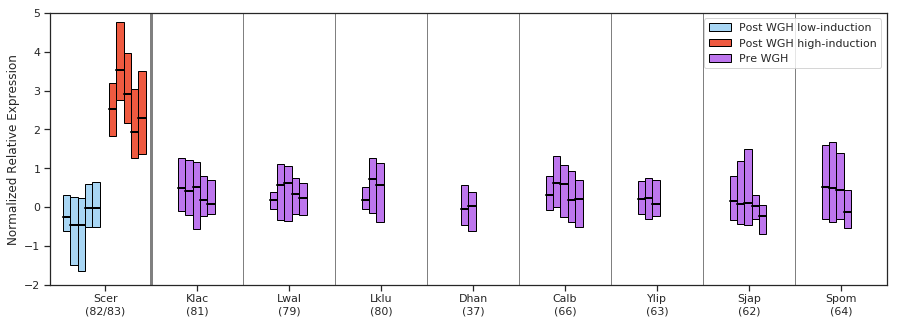

In [47]:
#Plot mean and variance of gene expression for each species 
#add text for total number of orthologs? 

fig_induction, ax_induction = plt.subplots(figsize=(15,5))
bw = 0.08
margin = 0.04
opacity = 0.8

spec_sets = {'Post WGH low' : ['Scer'] , 
             'Post WGH high' : ['Scer'] , 
             'Pre WGH' : spec_order_pre_WGH} 

colors = {'low': '#a8d6f4', 'high':'#ef5a40', 'Pre WGH': '#bd76ed'}
legend_label_dict = {'low': 'Post WGH low-induction', 
                 'high': 'Post WGH high-induction', 
                 'Pre WGH': 'Pre WGH'}
index = {'low':[],'high':[], 'Pre WGH':[]}
data_mean = {'low':[],'high':[], 'Pre WGH':[]}
data_std = {'low':[],'high':[], 'Pre WGH':[]}
data_N = {'low':{},
          'high':{}, 
          'Pre WGH':{}}
data = {'low':[],'high':[], 'Pre WGH':[]}
level_space = {'low':0.0, 'high':0.5}
label_order = []
label_ind = []

conds_pka_corr = ['DS/LOG', 'PS/LOG', 'PLAT/LOG','heat shock_030', 'heat shock_045']



all_conds = set(expression_data_df.columns)


#Post WGH Species
#assumes the same species sets are in both
jj = 0
spacer = bw/2 + margin
for spec in spec_sets['Post WGH high']: 
    for level in ['low','high']:
        data_N[level][spec]=np.inf 
    label_ind.append(jj+0.5)
    for kk, cond_base in enumerate(conds_pka_corr): 
        if spec + '_' + cond_base + '_high' in all_conds: 
            for level in ['low', 'high']:
                index[level].append(spacer + jj+bw*kk +level_space[level])
                column = expression_data_df[spec + '_' + cond_base + '_' + level]
                data[level].append(column[~column.isna()])
                #data_mean[level].append(column.mean())
                #data_std[level].append(column.std())
                N_spec_cond = sum(~(np.isnan(column)))
                N_spec_old = data_N[level][spec]
                data_N[level][spec] = min(N_spec_old, N_spec_cond)
    label_order.append(spec + '\n(' + str(data_N['low'][spec]) + '/' + str(data_N['high'][spec]) + ')')  
    jj = jj+1

#pre WGH Species
#assumes the same species sets are in both
for spec in spec_sets['Pre WGH']: 
    data_N['Pre WGH'][spec]=np.inf
    label_ind.append(jj+0.5)    
    for kk, cond_base in enumerate(conds_pka_corr): 
        if spec + '_' + cond_base in all_conds: 
            index['Pre WGH'].append(spacer + 0.25 + jj+bw*kk)
            column = expression_data_df[spec + '_' + cond_base]
            data['Pre WGH'].append(column[~column.isna()])
            #data_mean['Pre WGH'].append(column.mean())
            #data_std['Pre WGH'].append(column.std())
            N_spec_cond = sum(~(np.isnan(column)))
            N_spec_old = data_N['Pre WGH'][spec]
            data_N['Pre WGH'][spec] = min(N_spec_old, N_spec_cond)   
    label_order.append(spec + '\n(' + str(data_N['Pre WGH'][spec]) + ')')    
    jj = jj+1
    

legend_handles = []
legend_labels = []
for subset_name in ['low', 'high', 'Pre WGH']: 
    
    subset_data = data[subset_name]
    
    induction_bp = ax_induction.boxplot(subset_data, patch_artist=True, showfliers=False, 
                                          positions = index[subset_name], 
                                          widths = bw, 
                                          whis = 0.0
                                       )
    jj = 0
    for patch in induction_bp['boxes']:
        patch.set(facecolor=colors[subset_name])  
        if jj == 0: 
            legend_handles.append(patch)
        jj = jj+1
        
    plt.setp(induction_bp['medians'], color='black', linewidth=2.0)
    
    legend_labels.append(legend_label_dict[subset_name])
    
#     induction_plot = ax_induction.bar(index[subset_name],subset_data, bw,
#                  alpha=opacity,
#                  color=colors[subset_name],
#                  label=legend_labels[subset_name], 
#                  yerr = data_std[subset_name]) 
#                  #bottom = bottom)

ymax = 5.0
ymin = -2.0
ax_induction.vlines([len(spec_sets['Post WGH high'])], ymin = ymin, ymax = ymax, colors = 'gray',linewidth=3)
ax_induction.vlines(list(range(len(spec_sets['Post WGH high']) + len(spec_sets['Pre WGH'])))[1:], ymin=ymin, ymax = ymax, colors = 'gray', linewidth = 1)
ax_induction.set_xticklabels(label_order)
ax_induction.set_xlim(0, len(spec_sets['Post WGH high']) + len(spec_sets['Pre WGH']))
ax_induction.set_xticks(label_ind)
ax_induction.set_ylim(ymin,ymax)
ax_induction.set_xlim(-0.1, len(label_ind))
ax_induction.set_ylabel('Normalized Relative Expression')
ax_induction.legend(legend_handles, legend_labels )

#fig_induction.savefig(os.path.normpath('/home/heineike/scratch/induction_conservation_summary.svg'))

In [33]:
# Organize species conditions by a given vector of all possible conditions
spec_order_post_WGH = [] #['Spar','Sbay','Smik','Suva', 'Cgla', 'Ncas','Vpol']
spec_order_pre_WGH = ['Klac','Lwal','Lklu','Dhan', 'Calb', 'Ylip','Sjap','Spom']

spec_sets = {'Post WGH low' : ['Scer'] + spec_order_post_WGH, 
             'Post WGH high' : ['Scer'] + spec_order_post_WGH, 
             'Pre WGH' : spec_order_pre_WGH} 

#filter out a row if it has Ndrop or more missing values
inds_to_drop = []
Ndrop = 130
for ind, row in enumerate(expression_data_df.values):
    if sum(np.isnan(row)) >= Ndrop:
        inds_to_drop.append(ind)
        
rows_to_drop = expression_data_df.index[inds_to_drop]
print('Dropped the following Paralog Pairs because there were more than ' + str(Ndrop) + ' orthologs missing.')
print(rows_to_drop)
expression_data_df_row_filter = expression_data_df.drop(index=rows_to_drop)

#Sort dataset by how long high expression for a PKA estimate column (PKAest) is retained in the high paralog in post WGH high gene
#Sort out rows by whether the averaged "PKAest" or PKA estimate columns are above a threshold.  
#Sort by the species farthes from original species first (so top row will be most conserved)

columns_to_combine = {'PS/LOG', 'PLAT/LOG', 'DS/LOG', 'heat shock_30', 'heat shock_45'}
    
#threshold for induction using the average of the combined columns that make up the PKA inhibition estimate.  
#All data is normalized already
induced_thresh = 2.5

expression_data_df_sorted = yeast_esr_exp.sort_conservaton_by_col_avg(expression_data_df_row_filter, spec_sets['Post WGH high'], columns_to_combine, induced_thresh )

#Sort conditions by defined order
all_conds = ['LAG/LOG','LL/LOG','ELL/LOG','DS/LOG','EPS/LOG','PS/LOG','LPS/LOG','PLAT/LOG',
     'NaCl_005',
     'NaCl_015',
     'NaCl_030',
     'NaCl_060', 
     'heat shock_005',
     'heat shock_015',
     'heat shock_030',
     'heat shock_045',
     'heat shock_060',
     'hydrogen peroxide_005',
     'hydrogen peroxide_015',
     'hydrogen peroxide_030',
     'hydrogen peroxide_060']

new_col_order = yeast_esr_exp.sort_regev_stress_conditions(all_conds, spec_sets, expression_data_df)

#add back in the new column order and drop out the extra columns that were added
expression_data_df_sorted = expression_data_df_sorted.loc[:,new_col_order]

fname_exp_data_sorted = os.path.normpath(data_processing_dir + 'regev_data/20190130_expression_data_DE_stress_' + seed_spec +'_sorted.csv')
expression_data_df_sorted.to_csv(fname_exp_data_sorted)

Dropped the following Paralog Pairs because there were more than 130 orthologs missing.
Index([], dtype='object')


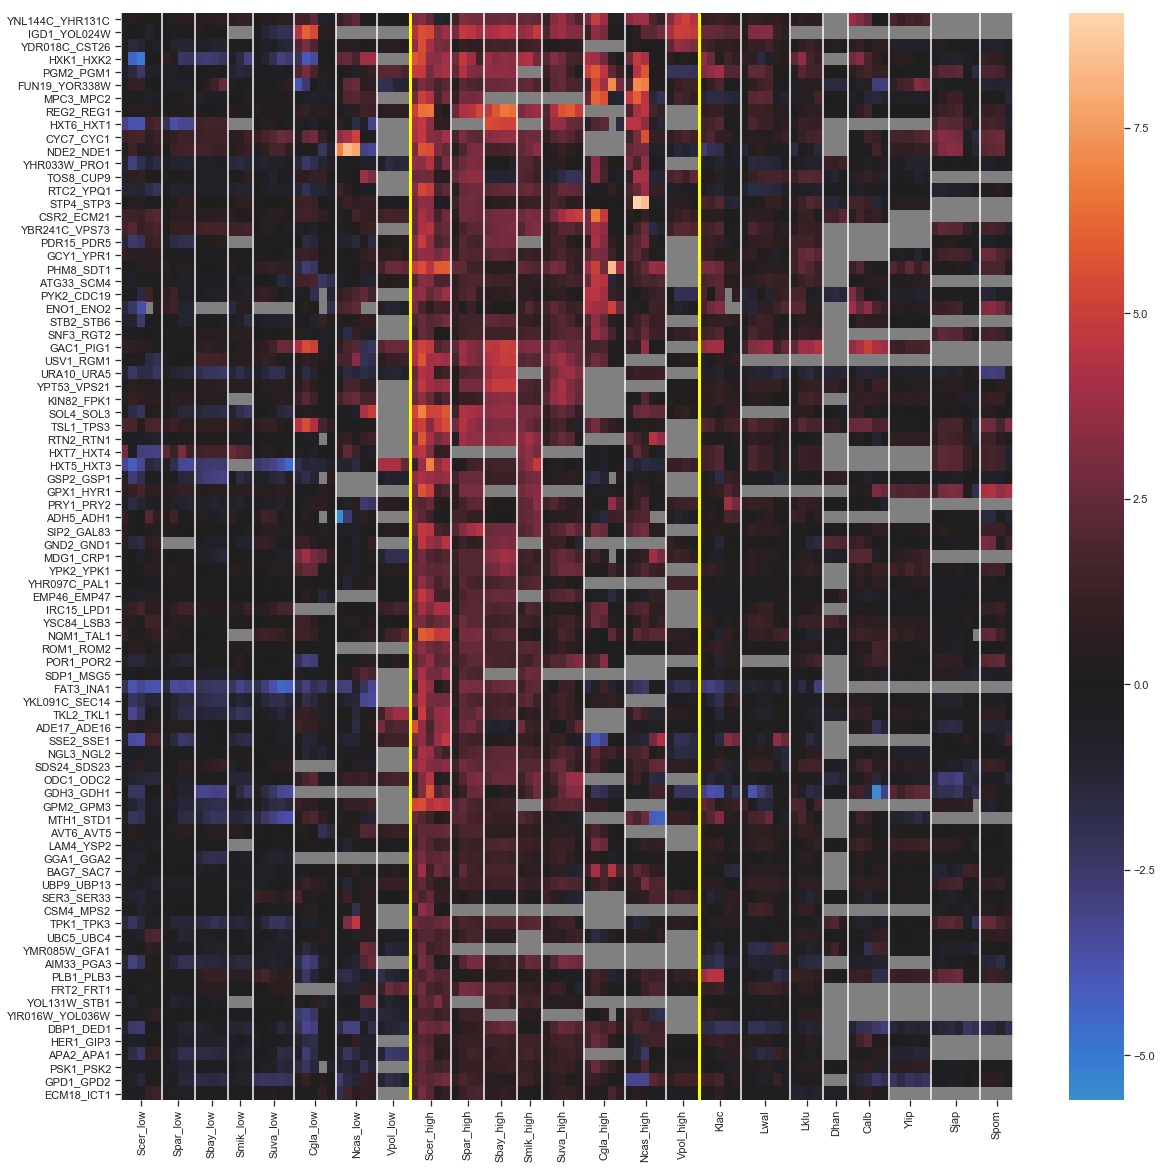

In [52]:
#heatmap after filtering and sorting

fig_hmap_exp, ax_hmap_exp = plt.subplots(figsize=(20,20))

#Make subset that only has columns with appropriate conditions:
conds_pka_corr = ['DS/LOG', 'PS/LOG', 'PLAT/LOG',
                    'heat shock_030', 'heat shock_045']

new_columns = []
for column in expression_data_df_sorted.columns: 
    pass_test = False
    for cond in conds_pka_corr:
        if cond in column: 
            pass_test=True

    if pass_test:
        new_columns.append(column)
        
expression_data_df_pka_corr = expression_data_df_sorted.loc[:,new_columns]    
   

#Make labels for each species, and separate out pre/post WGH and post WGH high/low with yellow lines
N_spec_level = {}

label_order = []
for level in ['low','high']:
    for spec in spec_sets['Post WGH ' + level]:
        label = spec + '_' + level
        N_spec_level[label] = 0
        label_order.append(label)
for spec in spec_sets['Pre WGH']: 
    label = spec
    N_spec_level[label] = 0 
    label_order.append(label)


for column in expression_data_df_pka_corr.columns: 
    spec = column.split('_')[0]
    if spec in set(spec_sets['Post WGH low']):
        level_sep = '_'
        level = column.split('_')[-1]
    else: 
        level_sep = ''
        level = ''
    label = spec + level_sep + level
    N_spec_level[label] = N_spec_level[label] + 1
    
new_ticks = []
sep_lines = [0]
new_tick_labels = []
big_lines = []
tick_tracker = 0
for label in label_order:
    N_tick_dist = N_spec_level[label]
    new_ticks.append(tick_tracker + N_tick_dist/2)
    new_tick_labels.append(label)
    sep_lines.append(tick_tracker + N_tick_dist)
    #new_tick_labels.append('')
    tick_tracker = tick_tracker + N_tick_dist
    if label in {'Vpol_low', 'Vpol_high'}:
        big_lines.append(tick_tracker)



sns.heatmap(expression_data_df_pka_corr, center = 0.0, xticklabels=False, ax = ax_hmap_exp)
ax_hmap_exp.set_facecolor('grey')
ax_hmap_exp.set_xticks(new_ticks)
ax_hmap_exp.set_xticklabels(new_tick_labels, rotation = 90)  #rotation=45, ha='right')
ax_hmap_exp.vlines(sep_lines, ymin = 0, ymax = len(expression_data_df_pka_corr), colors = 'white')
ax_hmap_exp.vlines(big_lines, ymin = 0, ymax = len(expression_data_df_pka_corr), colors = 'yellow',linewidth=3)
ax_hmap_exp.set_rasterized(True)    #Had to do this because .svg took ages on inkscape to work with
fig_hmap_exp.savefig(os.path.normpath('C:/Users/BMH_work/Google Drive/UCSF/ElSamad_Lab/PKA/Manuscript/exp_goi_regev_SC_PKA_est_corr.svg'))

### From Vpol perspective, look at gene expression conservation

In [67]:
#Only need to build once 
# self_spec = 'Vpol'
# spec_order_post_WGH = ['Ncas','Cgla','Suva','Sbay','Smik', 'Scer' ] 
# spec_order_pre_WGH = ['Klac','Lwal','Lklu'] 
# specs_to_build = spec_order_post_WGH+spec_order_pre_WGH
# for spec in specs_to_build: 
#     print(spec)
#     yeast_esr_exp.write_YGOB_orth_lookup_table(self_spec, spec)


I am importing io_library
what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = othera
base directory is C:\Users\BMH_work\github\expression_broad_data
data processing dir is C:\Users\BMH_work\github\expression_broad_data\expression_data\
Ncas
Cgla
Suva
Sbay
Smik
Scer
Klac
Lwal
Lklu


In [218]:
# #yeast_esr_exp.write_YGOB_orth_lookup_table('Lklu', 'Scer')  #only need to build this once

# #Checking to see if there are many missing genes.  Not bad for Lklu
# Lklu_YGOB = yeast_esr_exp.read_orth_lookup_table('Lklu', 'Scer', orth_dir_YGOB)
# Lklu_regev = yeast_esr_exp.read_orth_lookup_table('Lklu', 'Calb', orth_dir)

# YGOB_not_regev = list(set(Lklu_YGOB.keys())-set(Lklu_regev.keys()))
# regev_not_YGOB = list(set(Lklu_regev.keys()) - set(Lklu_YGOB.keys()))

In [ ]:
# Attempted for K.Lac but got two YGOB genes mapping to one regev gene and those co uld map to different Calb genes.  Switch to L.Klu

# via_gene = 'KLLA0E16853g'

# KLLA0E06171g
# KLLA0E06193g

# KLLA0E06171g	orf19.6318	
# KLLA0E06193g	orf19.3945	


# Klac_YGOB = yeast_esr_exp.read_orth_lookup_table('Klac', 'Scer', orth_dir_YGOB)
# Klac_regev = yeast_esr_exp.read_orth_lookup_table('Klac', 'Calb', orth_dir)


# YGOB_not_regev_fname = os.path.normpath(data_processing_dir + 'ortholog_files/Klac_YGOB_not_regev_fname.txt')
# YGOB_not_regev = list(set(Klac_YGOB.keys())-set(Klac_regev.keys()))                                        
# with open(YGOB_not_regev_fname, 'w') as fw:
#     for gene in YGOB_not_regev: 
#         fw.write(gene + '\n')

# regev_not_YGOB_fname = os.path.normpath(data_processing_dir + 'ortholog_files/Klac_regev_not_YGOB_fname.txt')
# regev_not_YGOB = list(set(Klac_regev.keys()) - set(Klac_YGOB.keys()))
# with open(regev_not_YGOB_fname, 'w') as fw:
#     for gene in regev_not_YGOB: 
#         fw.write(gene + '\n')

#  Used these two files to make a mapping
# klac_YGOB_regev_mismatches = pd.read_csv(data_processing_dir + 'ortholog_files/Klac_YGOB_regev_mismatches.csv')


# for self_gene, via_genes in self_via.items():
#     if len(via_genes)>1:
#         print('There are ' + str(len(via_genes)) + ' '+ spec_via + ' genes listed for ' + self_spec + 'gene ' + self_gene)
#         print(via_genes)
#     elif via_genes[0]=='NONE':
#         spec_genes = ['NONE']
#     else: 
#         via_gene = via_genes[0]
#         if via_gene in via_spec.keys():
#             spec_genes = via_spec[via_gene]
#         elif via_gene in set(klac_YGOB_regev_mismatches['YGOB_not_regev']):
#             mismatch_line = klac_YGOB_regev_mismatches[klac_YGOB_regev_mismatches['YGOB_not_regev']==via_gene]['regev_not_YGOB'].values
#             assert len(mismatch_line)==1, via_gene + ' More than one regev gene for given YGOB gene'
#             via_gene_regev = mismatch_line[0]
#             if isinstance(via_gene_regev,float):
#                 assert np.isnan, 'Float but not nan'
#                 spec_genes = ['NONE']
#             else:
#                 assert isinstance(via_gene,str), 'not float or string'
#                 spec_genes = via_spec[via_gene_regev]
#         else:
#             print(via_gene + ' not in ortholog lookup or in mismatch database')
#     print(self_gene + '\t' + '\t'.join(spec_genes) + '\n')

49 differentially expressed genes identified


,genename_low,DS/LOG_low,LAG/LOG_low,LL/LOG_low,LPS/LOG_low,PLAT/LOG_low,PS/LOG_low,PKAest_low,genename_high,DS/LOG_high,LAG/LOG_high,LL/LOG_high,LPS/LOG_high,PLAT/LOG_high,PS/LOG_high,PKAest_high
anc,,,,,,,,,,,,,,,,
Anc_3.220,Kpol_1036.28,0.216455,0.147980,0.211914,0.264115,0.324388,0.314854,0.285232,Kpol_1037.47,1.493646,-0.851604,0.556954,2.996515,2.721746,2.754004,2.323132
Anc_5.442,Kpol_1016.2,-0.175016,-0.210094,-0.052580,-0.283379,-0.015830,-0.359093,-0.183313,Kpol_1062.24,1.922451,0.911018,1.575569,2.211441,2.509457,2.209557,2.213822
Anc_5.456,Kpol_1062.12,-1.928793,1.801264,-1.925296,-2.120849,-1.582345,-2.038415,-1.849851,Kpol_440.4,0.562606,0.165770,0.363626,2.978466,3.955414,2.861539,2.459853
Anc_5.527,Kpol_1004.21,0.917355,0.692556,0.472428,0.769676,0.669245,0.959444,0.848681,Kpol_1023.98,3.472764,0.889661,2.881635,3.937021,3.919069,3.700572,3.697469
Anc_1.484,Kpol_1059.17,0.762202,0.122089,0.345935,0.832904,0.573655,0.875797,0.737218,Kpol_370.7,2.793396,0.629920,1.747345,3.484675,3.370512,3.481566,3.215158
Anc_7.370,Kpol_1030.41,-0.799927,0.134618,-0.490967,-1.352996,-1.429343,-1.623199,-1.284156,Kpol_479.17,1.746744,0.221761,1.023159,2.229221,1.904536,2.309852,1.987044
Anc_7.483,Kpol_1028.90,0.550896,-0.240566,0.113625,1.504040,1.199047,1.431614,1.060519,Kpol_1013.74,3.735282,2.706961,1.595270,5.007082,4.209128,5.230344,4.391585
Anc_1.375,Kpol_295.5,0.928125,0.294930,0.879513,0.608474,0.870068,0.911898,0.903364,Kpol_1069.14,3.208533,0.078436,2.721048,2.844676,2.503285,2.867339,2.859719
Anc_3.410,Kpol_1025.23,-0.469032,-0.275315,-0.304761,-0.340490,-0.603155,-0.793310,-0.621832,Kpol_387.2,2.069102,-0.599024,1.486629,2.517090,2.106264,2.359092,2.178153


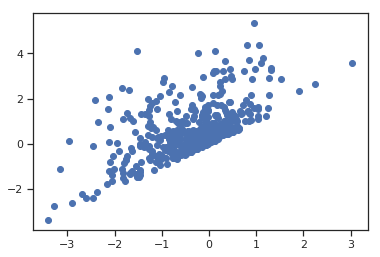

In [233]:
spec = 'Vpol'
columns_to_combine = {'PS/LOG', 'PLAT/LOG', 'DS/LOG', 'heat shock_30', 'heat shock_45'}

#Pick differentially expressed paralogs (using average / individual conditions)
min_high_lfc = 1.8  # Minimum LFC for the high activation paralog
lfc_diff = 1.8 # Difference in LFC to call a differentially expressed paralog
max_low_lfc = 1.6 # Maximum LFC that low activation paralog can have.  I get a ~20 more if I use 2.5 as the cutoff

goi_criteria = {'min_high_lfc': min_high_lfc, 'lfc_diff': lfc_diff, 'max_low_lfc' : max_low_lfc}

ohnologs_goi, ohnologs_sorted, goi_criteria = yeast_esr_exp.de_stress_gois(spec, columns_to_combine, goi_criteria)
    
plt.scatter(ohnologs_sorted['PKAest_low'], ohnologs_sorted['PKAest_high'])


#Save list and all sorted ohnolog dataframe as well
fname = data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/gois_' + spec + '_PKAest_20190123.pkl')

with open(fname, 'wb') as file:
    pickle.dump([ohnologs_goi,ohnologs_sorted,goi_criteria], file)
                                          
ohnologs_goi

In [62]:
seed_spec = 'Vpol'
sort_column = 'PKAest'

#eventually it would be good to add back in other species that weren't in pillars.  

#Order that we view the species (minus seed_spec)
spec_order_post_WGH = ['Cgla', 'Scer'] #, 'Ncas']  #removed Spar because it wasn't in pillars, 
#Removed Ncas, Suva, Sbay, Smik because the YGOB names don't match the Fungal orthogroups names (YGOB seem right)
spec_order_pre_WGH = ['Klac','Lwal','Lklu','Calb', 'Ylip','Sjap','Spom']    #['Klac','Lklu']  #removed Dhan, because there were no matches

ohnologs_goi_array, spec_conditions = yeast_esr_exp.load_regev_data_gois(ohnologs_goi, sort_column, seed_spec, spec_order_post_WGH, spec_order_pre_WGH)

#Add SC_common_name_high, low and high_low columns to an ohnologs_file
#SC_common_name lookup function requires genename_low/high columns
for level in ['low', 'high']: 
    ohnologs_goi_array['genename_' + level] = ohnologs_goi_array[seed_spec + '_genename_' + level]
ohnologs_goi_array = yeast_esr_exp.SC_common_name_columns_ohnologs(ohnologs_goi_array, seed_spec)

# ohnologs_goi.reset_index(inplace=True)
# ohnologs_goi.set_index('SC_common_name_high_low', inplace=True)


Kpol_1036.28 has NONE listed in ortholog file for Cgla
Kpol_1062.12 has NONE listed in ortholog file for Cgla
Kpol_1002.123 has NONE listed in ortholog file for Cgla
Kpol_1064.4 has NONE listed in ortholog file for Cgla
Kpol_1018.36 has NONE listed in ortholog file for Cgla
Kpol_208.4 has NONE listed in ortholog file for Cgla
Mismatch between ortholog file and expression data index Cgla : CAGL0D05318g DS/LOG
Mismatch between ortholog file and expression data index Cgla : CAGL0D05318g ELL/LOG
Mismatch between ortholog file and expression data index Cgla : CAGL0D05318g LAG/LOG
Mismatch between ortholog file and expression data index Cgla : CAGL0D05318g LL/LOG
Mismatch between ortholog file and expression data index Cgla : CAGL0D05318g PLAT/LOG
Mismatch between ortholog file and expression data index Cgla : CAGL0D05318g PS/LOG
Mismatch between ortholog file and expression data index Cgla : CAGL0D05318g NaCl_005
Mismatch between ortholog file and expression data index Cgla : CAGL0D05318g N

Mismatch between ortholog file and expression data index Klac : KLLA0E02355g DS/LOG
Mismatch between ortholog file and expression data index Klac : KLLA0E02355g LAG/LOG
Mismatch between ortholog file and expression data index Klac : KLLA0E02355g LL/LOG
Mismatch between ortholog file and expression data index Klac : KLLA0E02355g PLAT/LOG
Mismatch between ortholog file and expression data index Klac : KLLA0E02355g PS/LOG
Mismatch between ortholog file and expression data index Klac : KLLA0E02355g NaCl_005
Mismatch between ortholog file and expression data index Klac : KLLA0E02355g NaCl_015
Mismatch between ortholog file and expression data index Klac : KLLA0E02355g NaCl_030
Mismatch between ortholog file and expression data index Klac : KLLA0E02355g NaCl_060
Mismatch between ortholog file and expression data index Klac : KLLA0E02355g heat shock_005
Mismatch between ortholog file and expression data index Klac : KLLA0E02355g heat shock_015
Mismatch between ortholog file and expression dat

Kpol_365.10 has NONE listed in ortholog file for Lklu
Kpol_1036.28 has NONE listed in ortholog file for Calb
Kpol_1028.90 has NONE listed in ortholog file for Calb
Kpol_365.10 has NONE listed in ortholog file for Calb
Kpol_1061.1 has NONE listed in ortholog file for Calb
Kpol_1002.123 has NONE listed in ortholog file for Calb
Kpol_1031.26 has NONE listed in ortholog file for Calb
Kpol_530.17 has NONE listed in ortholog file for Calb
Kpol_1040.9 has NONE listed in ortholog file for Calb
Kpol_400.2 has NONE listed in ortholog file for Calb
Kpol_1050.8 has NONE listed in ortholog file for Calb
Kpol_1026.22 has NONE listed in ortholog file for Calb
Kpol_1036.28 has NONE listed in ortholog file for Ylip
Kpol_1062.12 has NONE listed in ortholog file for Ylip
Kpol_1028.90 has NONE listed in ortholog file for Ylip
Kpol_365.10 has NONE listed in ortholog file for Ylip
Kpol_1061.1 has NONE listed in ortholog file for Ylip
Kpol_1002.123 has NONE listed in ortholog file for Ylip
Kpol_367.5 has NON

TypeError: SC_common_name_columns_ohnologs() missing 1 required positional argument: 'orth_dir'

In [235]:
# orth_dir_YGOB = data_processing_dir + 'ortholog_files_YGOB' + os.sep 
# orth_dir_regev = data_processing_dir + 'ortholog_files' + os.sep 
# seed_spec = 'Vpol'
# spec = 'Ncas'

# orth_lookup_YGOB = yeast_esr_exp.read_orth_lookup_table(seed_spec, spec, orth_dir_YGOB)
# orth_lookup_regev = yeast_esr_exp.read_orth_lookup_table(seed_spec, spec, orth_dir_regev)

# orth_lookup_YGOB

In [236]:
#Go through each of my GOIs and replace lists with single value for each item. 
#This is mainly to combine any values for genes that had a small scale duplication. 

# spec_order_post_WGH = ['Spar','Sbay','Smik','Suva', 'Cgla', 'Ncas','Vpol']
# spec_order_pre_WGH = ['Klac','Lwal','Lklu','Dhan', 'Calb', 'Ylip','Sjap','Spom']

spec_sets = {'Post WGH low' : [seed_spec] + spec_order_post_WGH, 
             'Post WGH high' : [seed_spec] + spec_order_post_WGH, 
             'Pre WGH' : spec_order_pre_WGH} 

expression_data_df = yeast_esr_exp.regev_ohnolog_expression_data_SSD_combine(ohnologs_goi_array,  spec_sets, spec_conditions, combine_method = 'mean')


In [229]:
# Organize species conditions by a given vector of all possible conditions

#using same spec_sets as above

#filter out a row if it has Ndrop or more missing values
# inds_to_drop = []
# Ndrop = 130
# for ind, row in enumerate(expression_data_df.values):
#     if sum(np.isnan(row)) >= Ndrop:
#         inds_to_drop.append(ind)
        
# rows_to_drop = expression_data_df.index[inds_to_drop]
# print('Dropped the following Paralog Pairs because there were more than ' + str(Ndrop) + ' orthologs missing.')
# print(rows_to_drop)
# expression_data_df_row_filter = expression_data_df.drop(index=rows_to_drop)

expression_data_df_row_filter = expression_data_df

#Sort dataset by how long high expression for a PKA estimate column (PKAest) is retained in the high paralog in post WGH high gene
#Sort out rows by whether the averaged "PKAest" or PKA estimate columns are above a threshold.  
#Sort by the species farthes from original species first (so top row will be most conserved)

columns_to_combine = {'PS/LOG', 'PLAT/LOG', 'DS/LOG', 'heat shock_30', 'heat shock_45'}
    
#threshold for induction using the average of the combined columns that make up the PKA inhibition estimate.  
#All data is normalized already
induced_thresh = 2.5

expression_data_df_sorted = yeast_esr_exp.sort_conservaton_by_col_avg(expression_data_df_row_filter, spec_sets['Post WGH high'], columns_to_combine, induced_thresh )

#Sort conditions by defined order
all_conds = ['LAG/LOG','LL/LOG','ELL/LOG','DS/LOG','EPS/LOG','PS/LOG','LPS/LOG','PLAT/LOG',
     'NaCl_005',
     'NaCl_015',
     'NaCl_030',
     'NaCl_060', 
     'heat shock_005',
     'heat shock_015',
     'heat shock_030',
     'heat shock_045',
     'heat shock_060',
     'hydrogen peroxide_005',
     'hydrogen peroxide_015',
     'hydrogen peroxide_030',
     'hydrogen peroxide_060']

new_col_order = yeast_esr_exp.sort_regev_stress_conditions(all_conds, spec_sets, expression_data_df)

#add back in the new column order and drop out the extra columns that were added
expression_data_df_sorted = expression_data_df_sorted.loc[:,new_col_order]

# fname_exp_data_sorted = os.path.normpath(data_processing_dir + 'regev_data/20190130_expression_data_DE_stress_' + seed_spec +'_sorted.csv')
# expression_data_df_sorted.to_csv(fname_exp_data_sorted)

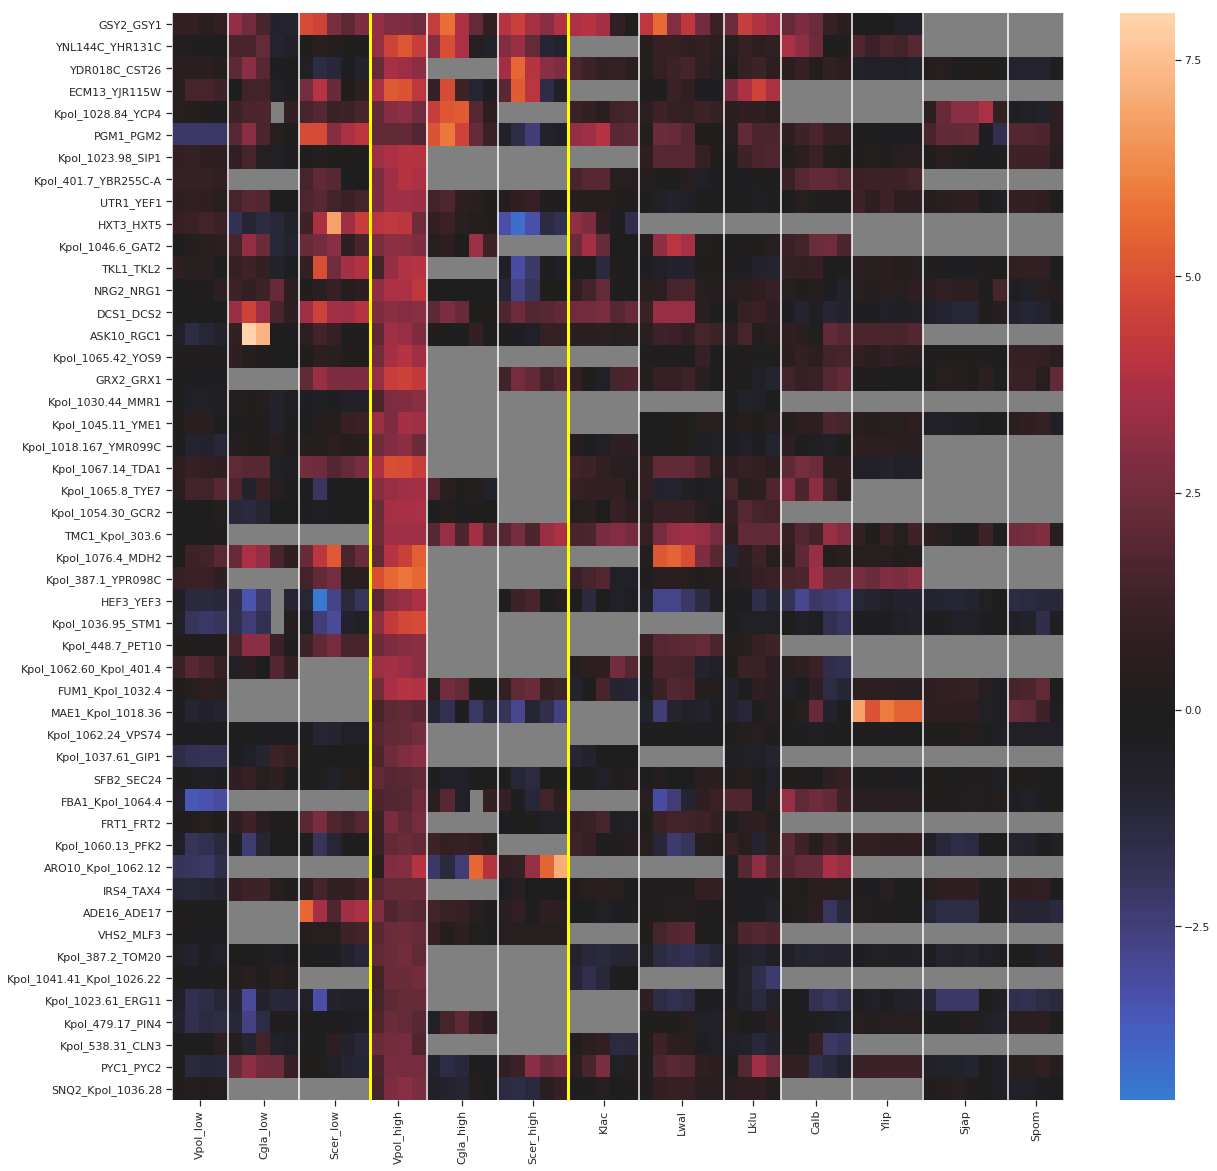

In [237]:
#heatmap after filtering and sorting

fig_hmap_exp, ax_hmap_exp = plt.subplots(figsize=(20,20))

#Make subset that only has columns with appropriate conditions:
conds_pka_corr = ['DS/LOG', 'PS/LOG', 'PLAT/LOG',
                    'heat shock_030', 'heat shock_045']

new_columns = []
for column in expression_data_df_sorted.columns: 
    pass_test = False
    for cond in conds_pka_corr:
        if cond in column: 
            pass_test=True

    if pass_test:
        new_columns.append(column)
        
expression_data_df_pka_corr = expression_data_df_sorted.loc[:,new_columns]    
   

#Make labels for each species, and separate out pre/post WGH and post WGH high/low with yellow lines
N_spec_level = {}

label_order = []
for level in ['low','high']:
    for spec in spec_sets['Post WGH ' + level]:
        label = spec + '_' + level
        N_spec_level[label] = 0
        label_order.append(label)
for spec in spec_sets['Pre WGH']: 
    label = spec
    N_spec_level[label] = 0 
    label_order.append(label)


for column in expression_data_df_pka_corr.columns: 
    spec = column.split('_')[0]
    if spec in set(spec_sets['Post WGH low']):
        level_sep = '_'
        level = column.split('_')[-1]
    else: 
        level_sep = ''
        level = ''
    label = spec + level_sep + level
    N_spec_level[label] = N_spec_level[label] + 1
    
new_ticks = []
sep_lines = [0]
new_tick_labels = []
big_lines = []
tick_tracker = 0
for label in label_order:
    N_tick_dist = N_spec_level[label]
    new_ticks.append(tick_tracker + N_tick_dist/2)
    new_tick_labels.append(label)
    sep_lines.append(tick_tracker + N_tick_dist)
    #new_tick_labels.append('')
    tick_tracker = tick_tracker + N_tick_dist
    if label in {'Scer_low', 'Scer_high'}:
        big_lines.append(tick_tracker)



sns.heatmap(expression_data_df_pka_corr, center = 0.0, xticklabels=False, ax = ax_hmap_exp)
ax_hmap_exp.set_facecolor('grey')
ax_hmap_exp.set_xticks(new_ticks)
ax_hmap_exp.set_xticklabels(new_tick_labels, rotation = 90)  #rotation=45, ha='right')
ax_hmap_exp.vlines(sep_lines, ymin = 0, ymax = len(expression_data_df_pka_corr), colors = 'white')
ax_hmap_exp.vlines(big_lines, ymin = 0, ymax = len(expression_data_df_pka_corr), colors = 'yellow',linewidth=3)
ax_hmap_exp.set_rasterized(True)    #Had to do this because .svg took ages on inkscape to work with
#fig_hmap_exp.savefig(os.path.normpath('C:/Users/BMH_work/Google Drive/UCSF/ElSamad_Lab/PKA/Manuscript/exp_goi_regev_VP_PKA_est_corr.svg'))